In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.api import robust
from statsmodels.api import stats
from scipy import stats
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 14
plt.style.use("fivethirtyeight")

# Data Load

In [3]:
b_0922 = pd.read_csv('balance_adjustments/BALANCE0922.CSV')
b_1022 = pd.read_csv('balance_adjustments/BALANCE1022.CSV')
b_1122 = pd.read_csv('balance_adjustments/BALANCE1122.CSV')
b_1222 = pd.read_csv('balance_adjustments/BALANCE1222.CSV')
b_1322 = pd.read_csv('balance_adjustments/BALANCE1322.CSV')

In [4]:
df_list = [b_0922, b_1022, b_1122, b_1222, b_1322]

In [5]:
data = pd.ExcelFile('Lane File Info.xlsx')
print(data.sheet_names)

['Sheet1']


In [6]:
l_0922 = pd.read_excel('Loads/Loads - PD 09 2022.xlsx', engine = "openpyxl")
l_1022 = pd.read_excel('Loads/Loads - PD 10 2022.xlsx')
l_1122 = pd.read_excel('Loads/Loads - PD 11 2022.xlsx')
l_1222 = pd.read_excel('Loads/Loads - PD 12 2022.xlsx')
l_1322 = pd.read_excel('Loads/Loads - PD 13 2022.xlsx')


C:\Users\Adrian\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\Adrian\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\Adrian\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\Adrian\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\Adrian\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook con

In [7]:
##need to change to .csv
l_0922.to_csv('l_0922.csv', index = False)
l_1022.to_csv('l_1022.csv', index = False)
l_1122.to_csv('l_1122.csv', index = False)
l_1222.to_csv('l_1222.csv', index = False)
l_1322.to_csv('l_1322.csv', index = False)

In [8]:
lane_df = pd.read_excel("Lane File Info.xlsx")
ter_df = pd.read_excel("Terminal List - 20230207.xlsx")
den_df = pd.read_excel("Density for all OB & IB terminals 12 & 13 2022.xlsx")

In [9]:
df_list2 = [lane_df, ter_df, den_df]
df_list3 = [l_0922, l_1022, l_1122, l_1222, l_1322]

# EDA

In [10]:
print ("Rows     : " ,b_0922.shape[0])
print ("Columns  : " ,b_0922.shape[1])
print ("\nFeatures : \n" ,b_0922.columns.tolist())
print ("\nMissing values :  ", b_0922.isnull().sum().values.sum())
print ("\nUnique values :  \n",b_0922.nunique())

print("\nFirst 5 Rows :  \n",b_0922.head())

print("\nLast 5 Rows :  \n",b_0922.tail())
print("\nDuplicated  : ",b_0922.duplicated())

Rows     :  79591
Columns  :  24

Features : 
 ['From', 'To', 'Miles', 'Avg Bal', 'Miles # 1', 'Bal # 1', 'Via # 1', 'Miles # 2', 'Bal # 2', 'Via # 2', 'Miles # 3', 'Bal # 3', 'Via #3 ', 'Miles # 4', 'Bal # 4', 'Via # 4', 'Miles # 5', 'Bal # 5', 'Via # 5', 'Miles # 6', 'Bal # 6', 'Via # 6', 'Miles # 7', 'Bal # 7']

Missing values :   845452

Unique values :  
 From          298
To            302
Miles        3467
Avg Bal      1749
Miles # 1     817
Bal # 1       820
Via # 1       142
Miles # 2     780
Bal # 2       799
Via # 2       136
Miles # 3     839
Bal # 3       742
Via #3        124
Miles # 4     660
Bal # 4       631
Via # 4       115
Miles # 5     493
Bal # 5       450
Via # 5        89
Miles # 6     251
Bal # 6       221
Via # 6         0
Miles # 7       0
Bal # 7         0
dtype: int64

First 5 Rows :  
    From  To  Miles  Avg Bal  Miles # 1  Bal # 1  Via # 1  Miles # 2  Bal # 2  \
0     1   3    101    1.543        NaN      NaN      NaN        NaN      NaN   
1     1   4  

In [11]:
rows = b_0922.shape[0]
cols = b_0922.shape[1]
features = b_0922.columns.tolist()
missing_values = b_0922.isnull().sum().values.sum()
unique_values = b_0922.nunique()
first_five_rows = b_0922.head()
last_five_rows = b_0922.tail()
duplicated = b_0922.duplicated()

# Organize the summary information into a list of tuples
summary = [("Rows", rows),
           ("Columns", cols),
           ("Features", features),
           ("Missing Values", missing_values),
           ("Unique Values", unique_values),
           ("First 5 Rows", str(first_five_rows)),
           ("Last 5 Rows", str(last_five_rows)),
           ("Duplicated", str(duplicated))]

# Output the summary information as a table
print(tabulate(summary, headers=["Description", "Value"], tablefmt="pretty"))

+----------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|  Description   |                                                                                                                                    Value                                                                                                                                     |
+----------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|      Rows      |                                                                                                                

In [12]:
df_list_label = ['b_0922', 'b_1022', 'b_1122', 'b_1222', 'b_1322']
df_list2_label = ['lane_df', 'Ter_df', 'den_df']
df_list3_label = ['l_0922', 'l_1022', 'l_1122', 'l_1222', 'l_1322']

#### Functions to examine all dataframes all at once

In [13]:
def explore_dataframes(df_list, label_list):
    for i, df in enumerate(df_list):
        print(f"\nDataframe: {label_list[i]}")
        print(f"Rows: {df.shape[0]}")
        print(f"Columns: {df.shape[1]}")
        print(f"Columns: {df.columns.tolist()}")
        print ("\nMissing values :  ", df.isnull().sum().values.sum())
        print(f"Missing values:\n{df.isnull().sum()}")
        print(f"Unique values:")
        for column in df.columns:
            print(f"{column}: {df[column].nunique()} unique values")
        print(f"Duplicated rows: {df.duplicated().sum()}")  

In [14]:
def stats_dataframes(df_list, label_list):
    for i, df in enumerate(df_list):
        print(f"\nDataframe: {label_list[i]}")
        print("\nStats: ", df.describe())

In [15]:
explore_dataframes(df_list, df_list_label)


Dataframe: b_0922
Rows: 79591
Columns: 24
Columns: ['From', 'To', 'Miles', 'Avg Bal', 'Miles # 1', 'Bal # 1', 'Via # 1', 'Miles # 2', 'Bal # 2', 'Via # 2', 'Miles # 3', 'Bal # 3', 'Via #3 ', 'Miles # 4', 'Bal # 4', 'Via # 4', 'Miles # 5', 'Bal # 5', 'Via # 5', 'Miles # 6', 'Bal # 6', 'Via # 6', 'Miles # 7', 'Bal # 7']

Missing values :   845452
Missing values:
From             0
To               0
Miles            0
Avg Bal          0
Miles # 1     2646
Bal # 1       2386
Via # 1       2386
Miles # 2     2386
Bal # 2       2386
Via # 2      17532
Miles # 3    17532
Bal # 3      17532
Via #3       40286
Miles # 4    40286
Bal # 4      40286
Via # 4      63615
Miles # 5    63615
Bal # 5      63615
Via # 5      76730
Miles # 6    76730
Bal # 6      76730
Via # 6      79591
Miles # 7    79591
Bal # 7      79591
dtype: int64
Unique values:
From: 298 unique values
To: 302 unique values
Miles: 3467 unique values
Avg Bal: 1749 unique values
Miles # 1: 817 unique values
Bal # 1: 820 unique val

In [16]:
explore_dataframes(df_list2, df_list2_label)


Dataframe: lane_df
Rows: 86391
Columns: 8
Columns: ['Origin Terminal', 'Destination Terminal', 'Load Plan', 'Trailer Route', 'Direct Miles', 'Trailer Route Miles', 'Standard Service Days', 'Balance Adjustment']

Missing values :   3421
Missing values:
Origin Terminal             0
Destination Terminal        0
Load Plan                   0
Trailer Route               0
Direct Miles                0
Trailer Route Miles      3421
Standard Service Days       0
Balance Adjustment          0
dtype: int64
Unique values:
Origin Terminal: 308 unique values
Destination Terminal: 312 unique values
Load Plan: 86391 unique values
Trailer Route: 86391 unique values
Direct Miles: 3886 unique values
Trailer Route Miles: 3931 unique values
Standard Service Days: 10 unique values
Balance Adjustment: 178 unique values
Duplicated rows: 0

Dataframe: Ter_df
Rows: 288
Columns: 13
Columns: ['Terminal #', 'Terminal Alpha', 'Terminal Name', 'Address', 'City ', 'State', 'Zip', 'Region', 'HUB', 'Break', 'Canad

In [17]:
explore_dataframes(df_list3, df_list3_label)


Dataframe: l_0922
Rows: 307791
Columns: 12
Columns: ['                    Activity            date (out)', '                    OB                  TID', '                    Terminal            ID', '                    Manifest            number', 'Destination         terminal            ID', '                    IB                  TID', 'Weight              (this               leg)', 'Power               unit                number', '                    Trailer             number', 'LOADS', '                    Trip                number', 'TTL_CUBE']

Missing values :   0
Missing values:
                    Activity            date (out)    0
                    OB                  TID           0
                    Terminal            ID            0
                    Manifest            number        0
Destination         terminal            ID            0
                    IB                  TID           0
Weight              (this               leg)          0
Power  

# Clean Column Names on intial Datasets

In [18]:
def clean_column_names(dataframes):
    """
    Cleans up column names in multiple dataframes by removing spaces and special characters.
    """
    for df in dataframes:
        df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_').str.replace('/', '_').str.replace('(', '').str.replace(')', '').str.replace(',', '')



In [19]:
import pandas as pd

def special_clean_column_names(dataframes):
    """
    Cleans up column names in multiple dataframes by removing spaces and special characters.
    """
    for df in dataframes:
        df.columns = df.columns.str.strip().str.lower().str.replace(' ', '').str.replace('-', '_').str.replace('/', '_').str.replace('(', '').str.replace(')', '').str.replace(',', '')

In [20]:
#balance data
clean_column_names(df_list)

C:\Users\Adrian\AppData\Local\Temp\ipykernel_32680\1432968199.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_').str.replace('/', '_').str.replace('(', '').str.replace(')', '').str.replace(',', '')
C:\Users\Adrian\AppData\Local\Temp\ipykernel_32680\1432968199.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_').str.replace('/', '_').str.replace('(', '').str.replace(')', '').str.replace(',', '')
C:\Users\Adrian\AppData\Local\Temp\ipykernel_32680\1432968199.py:6: FutureWarning: The default value o

In [21]:
#lane data
clean_column_names(df_list2)

C:\Users\Adrian\AppData\Local\Temp\ipykernel_32680\1432968199.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_').str.replace('/', '_').str.replace('(', '').str.replace(')', '').str.replace(',', '')
C:\Users\Adrian\AppData\Local\Temp\ipykernel_32680\1432968199.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_').str.replace('/', '_').str.replace('(', '').str.replace(')', '').str.replace(',', '')
C:\Users\Adrian\AppData\Local\Temp\ipykernel_32680\1432968199.py:6: FutureWarning: The default value o

In [22]:
# terminal data
special_clean_column_names(df_list3)

C:\Users\Adrian\AppData\Local\Temp\ipykernel_32680\2702318106.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.strip().str.lower().str.replace(' ', '').str.replace('-', '_').str.replace('/', '_').str.replace('(', '').str.replace(')', '').str.replace(',', '')
C:\Users\Adrian\AppData\Local\Temp\ipykernel_32680\2702318106.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.strip().str.lower().str.replace(' ', '').str.replace('-', '_').str.replace('/', '_').str.replace('(', '').str.replace(')', '').str.replace(',', '')
C:\Users\Adrian\AppData\Local\Temp\ipykernel_32680\2702318106.py:8: FutureWarning: The default value of 

In [23]:
Columns =  ['activity_date_out', 'obt_id', 'terminal_id', 'manifest_number', 'destination_terminal_id', 'ibt_id', 'weight_this_leg', 'power_unit_number', 'trailer_number', 'loads', 'trip_number', 'ttl_cube']

In [24]:
import pandas as pd

def rename_dataframes(dataframes):
    """
    Cleans up column names in multiple dataframes by removing spaces and special characters.
    """
    for df in dataframes:
        df.columns = ['activity_date_out', 'obt_id', 'terminal_id', 'manifest_number', 'destination_terminal_id', 'ibt_id', 'weight_this_leg', 'power_unit_number', 'trailer_number', 'loads', 'trip_number', 'ttl_cube']

In [25]:
rename_dataframes(df_list3)

# Joins

In [26]:
lanes = lane_df[['origin_terminal', 'destination_terminal', 'balance_adjustment']]

In [27]:
m_0922 = b_0922[['from', 'to', 'avg_bal', 'miles']] 
m_1022 = b_1022[['from', 'to', 'avg_bal', 'miles']] 
m_1122 = b_1122[['from', 'to', 'avg_bal', 'miles']] 
m_1222 = b_1222[['from', 'to', 'avg_bal', 'miles']]
m_1322 = b_1322[['from', 'to', 'avg_bal', 'miles']]

In [28]:
lanes = lanes.rename(columns={'origin_terminal': 'from', 'destination_terminal': 'to'})

In [29]:
b_lanes = pd.merge(lanes, m_0922, on=['from' ,'to'])
b_lanes = b_lanes.rename(columns={'avg_bal': 'pd_9_avg_bal', 'miles': 'pd_9_miles'})

In [30]:
b_lanes

,from,to,balance_adjustment,pd_9_avg_bal,pd_9_miles
0,1,3,1.30,1.543,101
1,1,4,1.73,1.609,69
2,1,5,0.66,0.500,145
3,1,6,0.78,1.000,325
4,1,7,0.50,0.392,166
...,...,...,...,...,...
79070,391,362,1.01,1.271,668
79071,391,363,0.70,1.010,657
79072,391,364,1.01,1.271,668
79073,391,380,1.26,1.013,2205


In [31]:
b_lanes = pd.merge(b_lanes, m_1022, on=['from' ,'to'])
b_lanes = b_lanes.rename(columns={'avg_bal': 'pd_10_avg_bal', 'miles': 'pd_10_miles'})     

In [32]:
b_lanes = pd.merge(b_lanes, m_1122, on=['from' ,'to'])
b_lanes = b_lanes.rename(columns={'avg_bal': 'pd_11_avg_bal', 'miles': 'pd_11_miles'})    


In [33]:
b_lanes = pd.merge(b_lanes, m_1222, on=['from' ,'to'])
b_lanes = b_lanes.rename(columns={'avg_bal': 'pd_12_avg_bal', 'miles': 'pd_12_miles'})                 


In [34]:
b_lanes = pd.merge(b_lanes, m_1322, on=['from' ,'to'])
b_lanes = b_lanes.rename(columns={'avg_bal': 'pd_13_avg_bal', 'miles': 'pd_13_miles'})    

In [35]:
b_lanes.describe().to_excel('stats.xlsx')

In [36]:
b_lanes.describe()

,from,to,balance_adjustment,pd_9_avg_bal,pd_9_miles,pd_10_avg_bal,pd_10_miles,pd_11_avg_bal,pd_11_miles,pd_12_avg_bal,pd_12_miles,pd_13_avg_bal,pd_13_miles
count,78635.000000,78635.000000,78635.000000,78635.000000,78635.000000,78635.000000,78635.000000,78635.000000,78635.000000,78635.000000,78635.000000,78635.000000,78635.000000
mean,166.720671,167.403561,0.991071,0.887581,1358.851529,0.990392,1454.772201,0.988392,1454.537051,0.985426,1453.984600,0.989287,1452.828346
std,104.051029,103.838441,0.223685,0.321001,802.983063,0.207948,956.975235,0.206578,956.282953,0.228915,955.550266,0.229145,953.530812
min,1.000000,1.000000,0.100000,0.000000,2.000000,0.031000,2.000000,0.031000,2.000000,0.031000,2.000000,0.031000,2.000000
25%,76.000000,76.000000,0.850000,0.746000,730.000000,0.883000,751.000000,0.887000,751.000000,0.861000,750.000000,0.866000,750.500000
50%,159.000000,161.000000,1.000000,0.949000,1183.000000,1.000000,1220.000000,1.000000,1221.000000,1.000000,1222.000000,1.000000,1221.000000
75%,245.000000,247.000000,1.140000,1.077000,1969.000000,1.097000,2072.000000,1.091500,2069.000000,1.106000,2067.000000,1.111000,2068.000000
max,391.000000,391.000000,1.900000,2.000000,4260.000000,2.000000,6384.000000,2.000000,6389.000000,2.000000,6383.000000,2.000000,6384.000000


In [37]:
l_0922_rename = l_0922.rename(columns={'obt_id': 'from', 'destination_terminal_id': 'to'})

In [38]:
l_0922_rename

,activity_date_out,from,terminal_id,manifest_number,to,ibt_id,weight_this_leg,power_unit_number,trailer_number,loads,trip_number,ttl_cube
0,20220821.0,295.0,292.0,15461.0,141.0,141.0,18009.0,/RAIL,ESTU501010,1.0,6155260.0,2518.05
1,20220907.0,87.0,87.0,44018.0,96.0,960.0,7693.0,67656,292828,0.5,6395025.0,1125.44
2,20220908.0,985.0,74.0,88941.0,6.0,24.0,6750.0,67879,295479,0.5,6399549.0,1199.25
3,20220816.0,967.0,291.0,59263.0,192.0,229.0,14465.0,69990,295009,0.5,6090787.0,1417.86
4,20220817.0,138.0,96.0,8039.0,255.0,140.0,11371.0,79088,299647,0.5,6103150.0,957.75
...,...,...,...,...,...,...,...,...,...,...,...,...
307786,20220908.0,92.0,92.0,21509.0,130.0,130.0,15512.0,77790,902039,0.5,6396669.0,986.32
307787,20220816.0,96.0,96.0,7757.0,118.0,118.0,15235.0,67534,512519,1.0,6073468.0,1244.20
307788,20220827.0,60.0,128.0,55531.0,78.0,78.0,17915.0,69543,295453,0.5,6253833.0,1810.86
307789,20220905.0,977.0,96.0,14096.0,15.0,55.0,19024.0,66712,296183,0.5,6358832.0,997.96


In [39]:
b_l_lanes = pd.merge(b_lanes, l_0922_rename, on =['from', 'to'])

In [40]:
b_l_lanes.isna()

,from,to,balance_adjustment,pd_9_avg_bal,pd_9_miles,pd_10_avg_bal,pd_10_miles,pd_11_avg_bal,pd_11_miles,pd_12_avg_bal,...,activity_date_out,terminal_id,manifest_number,ibt_id,weight_this_leg,power_unit_number,trailer_number,loads,trip_number,ttl_cube
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252191,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
252192,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
252193,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
252194,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [41]:
print ("Rows     : " ,b_l_lanes.shape[0])
print ("Columns  : " ,b_l_lanes.shape[1])
print ("\nFeatures : \n" ,b_l_lanes.columns.tolist())
print ("\nMissing values :  ", b_l_lanes.isnull().sum().values.sum())
print ("\nUnique values :  \n",b_l_lanes.nunique())

print("\nFirst 5 Rows :  \n",b_l_lanes.head())

print("\nLast 5 Rows :  \n",b_l_lanes.tail())
print("\nDuplicated  : ",b_l_lanes.duplicated())

Rows     :  252196
Columns  :  23

Features : 
 ['from', 'to', 'balance_adjustment', 'pd_9_avg_bal', 'pd_9_miles', 'pd_10_avg_bal', 'pd_10_miles', 'pd_11_avg_bal', 'pd_11_miles', 'pd_12_avg_bal', 'pd_12_miles', 'pd_13_avg_bal', 'pd_13_miles', 'activity_date_out', 'terminal_id', 'manifest_number', 'ibt_id', 'weight_this_leg', 'power_unit_number', 'trailer_number', 'loads', 'trip_number', 'ttl_cube']

Missing values :   0

Unique values :  
 from                     226
to                       228
balance_adjustment       173
pd_9_avg_bal            1372
pd_9_miles              1765
pd_10_avg_bal           1324
pd_10_miles             1774
pd_11_avg_bal           1353
pd_11_miles             1778
pd_12_avg_bal           1402
pd_12_miles             1771
pd_13_avg_bal           1457
pd_13_miles             1771
activity_date_out         28
terminal_id              226
manifest_number        87867
ibt_id                   315
weight_this_leg        30615
power_unit_number       6327
trail

# end

In [42]:
corr=b_l_lanes.corr()

<AxesSubplot:>

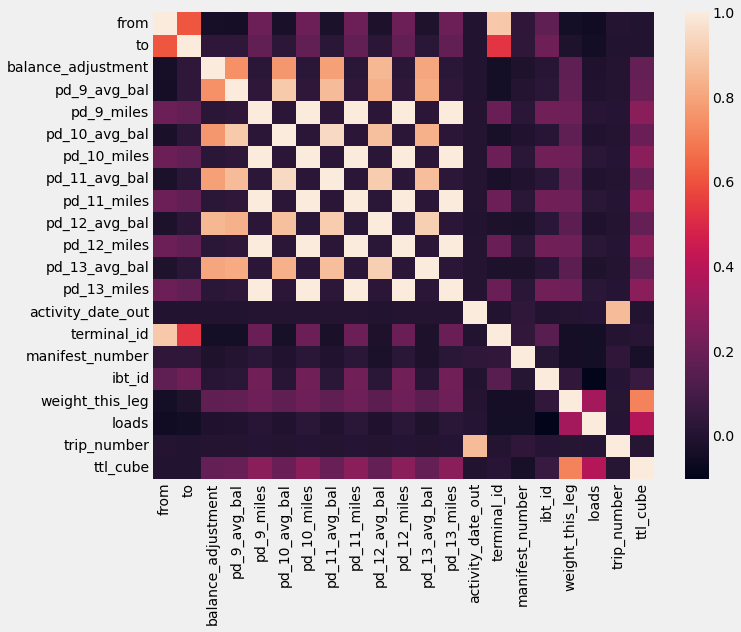

In [43]:
sns.heatmap(corr)

In [44]:
print ("Rows     : " ,b_lanes.shape[0])
print ("Columns  : " ,b_lanes.shape[1])
print ("\nFeatures : \n" ,b_lanes.columns.tolist())
print ("\nMissing values :  ", b_lanes.isnull().sum().values.sum())
print ("\nUnique values :  \n",b_lanes.nunique())

print("\nFirst 5 Rows :  \n",b_lanes.head())

print("\nLast 5 Rows :  \n",b_lanes.tail())
print("\nDuplicated  : ",b_lanes.duplicated())

Rows     :  78635
Columns  :  13

Features : 
 ['from', 'to', 'balance_adjustment', 'pd_9_avg_bal', 'pd_9_miles', 'pd_10_avg_bal', 'pd_10_miles', 'pd_11_avg_bal', 'pd_11_miles', 'pd_12_avg_bal', 'pd_12_miles', 'pd_13_avg_bal', 'pd_13_miles']

Missing values :   0

Unique values :  
 from                   293
to                     293
balance_adjustment     177
pd_9_avg_bal          1749
pd_9_miles            3464
pd_10_avg_bal         1469
pd_10_miles           4113
pd_11_avg_bal         1493
pd_11_miles           4120
pd_12_avg_bal         1544
pd_12_miles           4113
pd_13_avg_bal         1566
pd_13_miles           4064
dtype: int64

First 5 Rows :  
    from  to  balance_adjustment  pd_9_avg_bal  pd_9_miles  pd_10_avg_bal  \
0     1   3                1.30         1.543         101          1.581   
1     1   4                1.73         1.609          69          1.636   
2     1   5                0.66         0.500         145          0.501   
3     1   6                0.

In [45]:
b_lanes.corr()

,from,to,balance_adjustment,pd_9_avg_bal,pd_9_miles,pd_10_avg_bal,pd_10_miles,pd_11_avg_bal,pd_11_miles,pd_12_avg_bal,pd_12_miles,pd_13_avg_bal,pd_13_miles
from,1.000000,-0.036637,-0.210931,-0.250252,0.119680,-0.198638,0.132103,-0.190436,0.131586,-0.192429,0.131321,-0.179491,0.129534
to,-0.036637,1.000000,0.196667,-0.108958,0.138830,0.142504,0.134118,0.113154,0.134312,0.109294,0.136005,0.108440,0.137359
balance_adjustment,-0.210931,0.196667,1.000000,0.506395,-0.030941,0.736297,-0.039716,0.747769,-0.039595,0.809755,-0.039242,0.762666,-0.039123
pd_9_avg_bal,-0.250252,-0.108958,0.506395,1.000000,-0.039137,0.626365,-0.036140,0.603464,-0.037859,0.588377,-0.036778,0.587046,-0.035860
pd_9_miles,0.119680,0.138830,-0.030941,-0.039137,1.000000,-0.018189,0.873493,-0.016088,0.867076,-0.030685,0.864184,-0.010786,0.864968
pd_10_avg_bal,-0.198638,0.142504,0.736297,0.626365,-0.018189,1.000000,-0.069076,0.951419,-0.069078,0.867582,-0.067204,0.830566,-0.066204
pd_10_miles,0.132103,0.134118,-0.039716,-0.036140,0.873493,-0.069076,1.000000,-0.069708,0.994888,-0.073981,0.992433,-0.060531,0.990635
pd_11_avg_bal,-0.190436,0.113154,0.747769,0.603464,-0.016088,0.951419,-0.069708,1.000000,-0.069331,0.899150,-0.067339,0.853777,-0.066374
pd_11_miles,0.131586,0.134312,-0.039595,-0.037859,0.867076,-0.069078,0.994888,-0.069331,1.000000,-0.073753,0.997620,-0.060359,0.995864
pd_12_avg_bal,-0.192429,0.109294,0.809755,0.588377,-0.030685,0.867582,-0.073981,0.899150,-0.073753,1.000000,-0.073538,0.905368,-0.075440


In [46]:
b_lanes.to_csv('b_lanes.csv')

In [47]:
b_lanes_bal_visual = b_lanes[['balance_adjustment', 'pd_9_avg_bal', 'pd_10_avg_bal', 'pd_11_avg_bal', 'pd_12_avg_bal', 'pd_13_avg_bal']]
b_lanes_miles_visual = b_lanes[['pd_9_miles',  'pd_10_miles',  'pd_11_miles', 'pd_12_miles', 'pd_13_miles']]


# STATS

In [48]:
l_0922_sorted=l_0922.sort_index()

In [49]:
l_0922_sorted.describe()

,activity_date_out,obt_id,terminal_id,manifest_number,destination_terminal_id,ibt_id,weight_this_leg,loads,trip_number,ttl_cube
count,3.077910e+05,307791.000000,307791.000000,307791.000000,307791.000000,307791.000000,307791.000000,307791.000000,3.077910e+05,307791.000000
mean,2.022085e+07,243.534376,112.225530,51258.363799,112.207485,243.107505,11240.779727,0.581364,6.240771e+06,971.743537
std,3.863525e+01,313.862025,80.540594,26362.542267,80.628009,313.414938,7929.461542,0.184559,1.114992e+05,641.974981
min,2.022081e+07,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.500000,6.047399e+06,0.000000
25%,2.022082e+07,55.000000,46.000000,31839.500000,46.000000,55.000000,6251.000000,0.500000,6.147538e+06,623.805000
50%,2.022083e+07,109.000000,92.000000,48573.000000,92.000000,109.000000,10809.000000,0.500000,6.242970e+06,989.530000
75%,2.022090e+07,227.000000,165.000000,72999.000000,166.000000,227.000000,15815.500000,0.500000,6.335862e+06,1274.270000
max,2.022091e+07,999.000000,391.000000,99998.000000,841.000000,999.000000,743449.000000,1.000000,6.452428e+06,13814.730000


In [50]:
l_0922_sorted

,activity_date_out,obt_id,terminal_id,manifest_number,destination_terminal_id,ibt_id,weight_this_leg,power_unit_number,trailer_number,loads,trip_number,ttl_cube
0,20220821.0,295.0,292.0,15461.0,141.0,141.0,18009.0,/RAIL,ESTU501010,1.0,6155260.0,2518.05
1,20220907.0,87.0,87.0,44018.0,96.0,960.0,7693.0,67656,292828,0.5,6395025.0,1125.44
2,20220908.0,985.0,74.0,88941.0,6.0,24.0,6750.0,67879,295479,0.5,6399549.0,1199.25
3,20220816.0,967.0,291.0,59263.0,192.0,229.0,14465.0,69990,295009,0.5,6090787.0,1417.86
4,20220817.0,138.0,96.0,8039.0,255.0,140.0,11371.0,79088,299647,0.5,6103150.0,957.75
...,...,...,...,...,...,...,...,...,...,...,...,...
307786,20220908.0,92.0,92.0,21509.0,130.0,130.0,15512.0,77790,902039,0.5,6396669.0,986.32
307787,20220816.0,96.0,96.0,7757.0,118.0,118.0,15235.0,67534,512519,1.0,6073468.0,1244.20
307788,20220827.0,60.0,128.0,55531.0,78.0,78.0,17915.0,69543,295453,0.5,6253833.0,1810.86
307789,20220905.0,977.0,96.0,14096.0,15.0,55.0,19024.0,66712,296183,0.5,6358832.0,997.96


In [51]:
l_1022.describe()

,activity_date_out,obt_id,terminal_id,manifest_number,destination_terminal_id,ibt_id,weight_this_leg,loads,trip_number,ttl_cube
count,3.181960e+05,318196.000000,318196.000000,318196.000000,318196.000000,318196.000000,318196.000000,318196.000000,3.181960e+05,318196.000000
mean,2.022094e+07,244.707611,112.739717,52429.906910,112.822330,245.083618,11452.306569,0.583676,6.632285e+06,988.077588
std,3.684302e+01,314.479560,80.793721,26543.167593,80.903544,314.760879,7874.532239,0.186646,1.154106e+05,637.478301
min,2.022091e+07,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.500000,6.433070e+06,0.000000
25%,2.022092e+07,55.000000,46.000000,32758.000000,46.000000,55.000000,6530.000000,0.500000,6.534354e+06,652.010000
50%,2.022092e+07,111.000000,92.000000,51797.000000,92.000000,111.000000,10959.000000,0.500000,6.634406e+06,996.250000
75%,2.022100e+07,227.000000,165.000000,73413.000000,166.000000,227.000000,16008.000000,0.500000,6.733569e+06,1279.737500
max,2.022101e+07,999.000000,430.000000,99999.000000,391.000000,999.000000,325853.000000,1.000000,6.866297e+06,12961.580000


In [52]:
l_1122.describe()

,activity_date_out,obt_id,terminal_id,manifest_number,destination_terminal_id,ibt_id,weight_this_leg,loads,trip_number,ttl_cube
count,3.171010e+05,317101.000000,317101.000000,317101.000000,317101.000000,317101.000000,317101.000000,317101.000000,3.171010e+05,317101.000000
mean,2.022104e+07,245.033872,112.497198,51888.134856,112.380254,245.043100,11386.010476,0.584456,7.030958e+06,973.227043
std,3.303922e+01,315.132032,80.768816,26969.641529,80.920658,315.141474,7884.550664,0.187337,1.158544e+05,641.409806
min,2.022101e+07,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.500000,6.820507e+06,0.000000
25%,2.022101e+07,54.000000,46.000000,30894.000000,46.000000,55.000000,6352.000000,0.500000,6.932194e+06,624.690000
50%,2.022102e+07,109.000000,92.000000,55259.000000,92.000000,109.000000,10944.000000,0.500000,7.032311e+06,986.550000
75%,2.022103e+07,227.000000,165.000000,72886.000000,166.000000,227.000000,16031.000000,0.500000,7.133069e+06,1273.790000
max,2.022110e+07,987.000000,981.000000,99999.000000,391.000000,999.000000,185273.000000,1.000000,7.254228e+06,11412.640000


In [53]:
l_1222.describe()

,activity_date_out,obt_id,terminal_id,manifest_number,destination_terminal_id,ibt_id,weight_this_leg,loads,trip_number,ttl_cube
count,2.811420e+05,281142.000000,281142.000000,281142.00000,281142.000000,281142.000000,281142.000000,281142.000000,2.811420e+05,281142.000000
mean,2.022113e+07,242.835258,112.788342,52600.75485,112.238538,242.541200,11381.764976,0.589005,7.408990e+06,973.711059
std,2.679707e+01,313.044427,81.195440,27470.58231,80.912042,313.001446,8156.403563,0.191261,1.023760e+05,653.341891
min,2.022110e+07,1.000000,1.000000,2.00000,1.000000,1.000000,0.000000,0.500000,7.230698e+06,0.000000
25%,2.022111e+07,55.000000,46.000000,33018.25000,46.000000,55.000000,6278.000000,0.500000,7.322586e+06,616.710000
50%,2.022112e+07,109.000000,92.000000,56956.00000,92.000000,109.000000,10922.000000,0.500000,7.410292e+06,985.130000
75%,2.022113e+07,227.000000,165.000000,74515.75000,165.000000,226.000000,16025.000000,0.500000,7.493711e+06,1276.370000
max,2.022120e+07,999.000000,430.000000,99998.00000,430.000000,999.000000,930361.000000,1.000000,7.622404e+06,12205.450000


In [54]:
b_0922.describe()

,from,to,miles,avg_bal,miles_#_1,bal_#_1,via_#_1,miles_#_2,bal_#_2,via_#_2,...,bal_#_4,via_#_4,miles_#_5,bal_#_5,via_#_5,miles_#_6,bal_#_6,via_#_6,miles_#_7,bal_#_7
count,79591.000000,79591.000000,79591.000000,79591.000000,76945.000000,77205.000000,77205.000000,77205.000000,77205.000000,62059.000000,...,39305.000000,15976.000000,15976.000000,15976.000000,2861.000000,2861.000000,2861.000000,0.0,0.0,0.0
mean,166.931010,167.882462,1350.952721,0.884880,282.266996,0.707329,142.212862,491.591581,0.847676,137.131649,...,0.901195,191.711818,201.904357,0.837460,187.850402,204.816847,0.950228,NaN,NaN,NaN
std,103.996587,104.022907,807.786969,0.321756,378.133179,0.487208,100.262938,538.307520,0.444808,81.219614,...,0.516075,100.349771,293.686635,0.583558,74.543933,192.498630,0.578374,NaN,NaN,NaN
min,1.000000,1.000000,2.000000,0.000000,0.000000,-1.000000,1.000000,0.000000,-1.000000,1.000000,...,-1.000000,1.000000,0.000000,-1.000000,1.000000,0.000000,-1.000000,NaN,NaN,NaN
25%,76.000000,77.000000,721.000000,0.741000,9.000000,0.379000,55.000000,155.000000,0.643000,64.000000,...,0.609000,96.000000,1.000000,0.392000,137.000000,15.000000,0.576000,NaN,NaN,NaN
50%,159.000000,161.000000,1178.000000,0.947000,203.000000,0.775000,127.000000,379.000000,1.000000,138.000000,...,1.000000,222.000000,126.000000,1.000000,212.000000,162.000000,1.000000,NaN,NaN,NaN
75%,246.000000,247.000000,1961.000000,1.075000,374.000000,1.000000,224.000000,569.000000,1.071000,212.000000,...,1.242000,291.000000,300.000000,1.242500,232.000000,295.000000,1.403000,NaN,NaN,NaN
max,391.000000,391.000000,4260.000000,2.000000,2683.000000,2.000000,363.000000,2683.000000,2.000000,363.000000,...,2.000000,363.000000,2387.000000,2.000000,354.000000,1258.000000,2.000000,NaN,NaN,NaN


In [55]:
b_1022.describe()

,from,to,miles,avg_bal,miles_#_1,bal_#_1,via_#_1,miles_#_2,bal_#_2,via_#_2,...,bal_#_9,via_#_9,miles_#_10,bal_#_10,via_#_10,miles_#_11,bal_#_11,via_#_11,miles_#_12,bal_#_12
count,79281.000000,79281.000000,79281.000000,79281.000000,75879.000000,75879.000000,75879.000000,75879.000000,75879.000000,61523.000000,...,3.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,166.472534,167.251687,1454.505985,0.990322,297.163510,0.760155,140.116752,532.622083,0.878158,136.379744,...,1.032667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,103.934565,103.720552,957.918894,0.208089,401.466633,0.469631,99.317575,584.063285,0.406308,81.015523,...,0.118429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,2.000000,0.031000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.934000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,76.000000,76.000000,749.000000,0.883000,45.000000,0.483000,55.000000,183.000000,0.714000,64.000000,...,0.967000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,159.000000,160.000000,1220.000000,1.000000,212.000000,0.879000,96.000000,411.000000,1.000000,137.000000,...,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,245.000000,246.000000,2073.000000,1.097000,382.000000,1.000000,224.000000,588.000000,1.051000,212.000000,...,1.082000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,391.000000,391.000000,6384.000000,2.000000,2683.000000,2.000000,363.000000,2683.000000,2.000000,363.000000,...,1.164000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
b_1122.describe()

,from,to,miles,avg_bal,miles_#_1,bal_#_1,via_#_1,miles_#_2,bal_#_2,via_#_2,...,bal_#_9,via_#_9,miles_#_10,bal_#_10,via_#_10,miles_#_11,bal_#_11,via_#_11,miles_#_12,bal_#_12
count,79764.000000,79764.000000,79764.000000,79764.000000,76341.000000,76341.000000,76341.000000,76341.000000,76341.000000,61965.000000,...,3.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,166.539717,167.304674,1451.762023,0.988511,296.571436,0.758296,138.972715,530.496575,0.877250,136.267716,...,1.142667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,103.770608,103.537973,955.510492,0.206658,401.666759,0.461915,98.184310,581.656947,0.397269,80.797434,...,0.296017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,2.000000,0.031000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.945000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,76.000000,77.000000,748.000000,0.887000,39.000000,0.483000,55.000000,181.000000,0.725000,64.000000,...,0.972500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,159.000000,161.000000,1218.000000,1.000000,212.000000,0.894000,96.000000,410.000000,1.000000,137.000000,...,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,245.000000,246.000000,2066.000000,1.092000,382.000000,1.000000,224.000000,585.000000,1.010000,212.000000,...,1.241500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,391.000000,391.000000,6389.000000,2.000000,2651.000000,2.000000,354.000000,2651.000000,2.000000,354.000000,...,1.483000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
b_1222.describe()

,from,to,miles,%_backhaul,%_headhaul,%_balanced,avg_bal,unnamed:_7,miles_#_1,bal_#_1,...,bal_#_9,via_#_9,miles_#_10,bal_#_10,via_#_10,miles_#_11,bal_#_11,via_#_11,miles_#_12,bal_#_12
count,80422.000000,80422.000000,80422.000000,80422.000000,80422.000000,80422.000000,80422.000000,0.0,76909.000000,76909.000000,...,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,166.329524,167.121148,1448.499739,30.061749,31.364577,38.573674,0.985355,NaN,296.946664,0.742896,...,1.373000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,103.609989,103.416233,953.435154,33.198247,34.105040,36.605865,0.229293,NaN,404.597447,0.475625,...,0.288187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.031000,NaN,0.000000,0.000000,...,0.950000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,76.000000,77.000000,746.000000,0.000000,0.000000,0.000000,0.861000,NaN,37.000000,0.426000,...,1.310000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,159.000000,160.000000,1217.000000,18.000000,19.000000,33.000000,1.000000,NaN,212.000000,0.819000,...,1.493000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,244.000000,246.000000,2059.000000,53.000000,57.000000,71.000000,1.106000,NaN,382.000000,1.000000,...,1.556000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,391.000000,391.000000,6383.000000,100.000000,100.000000,100.000000,2.000000,NaN,2591.000000,2.000000,...,1.556000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
den_df.corr()

,shipments,weight,average_density
shipments,1.000000,0.950817,-0.101768
weight,0.950817,1.000000,0.007399
average_density,-0.101768,0.007399,1.000000


# Initial Visuals

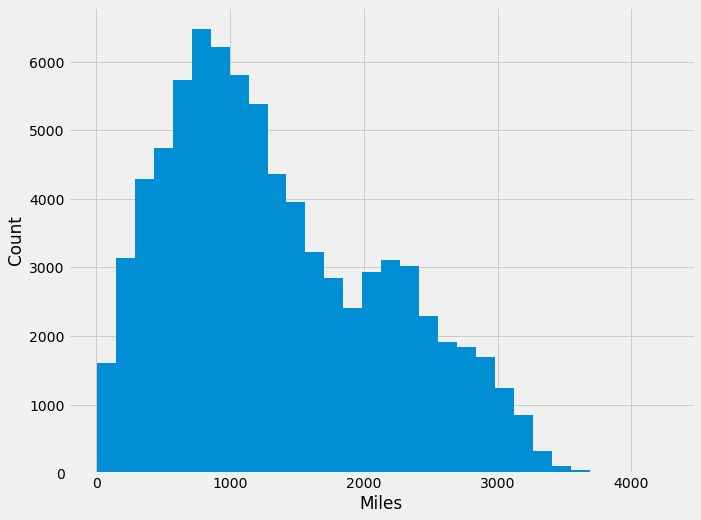

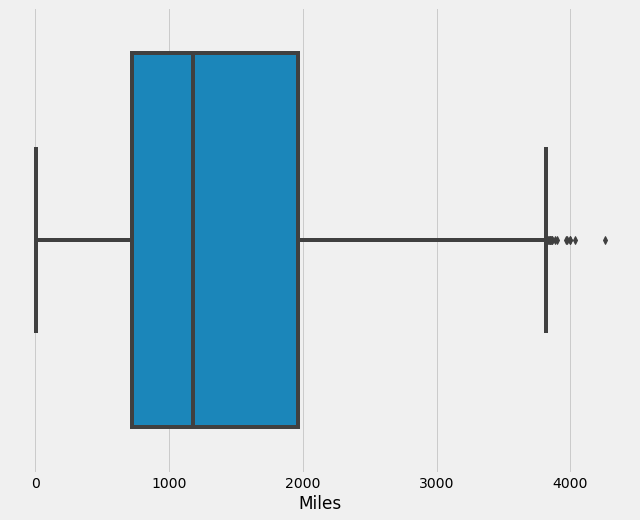

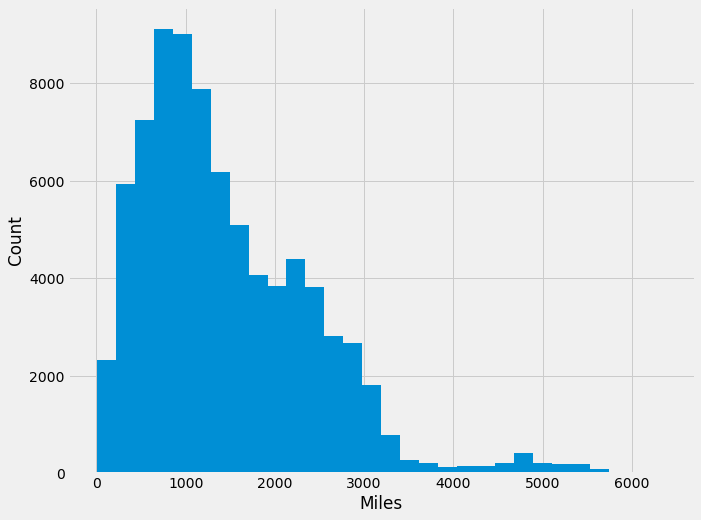

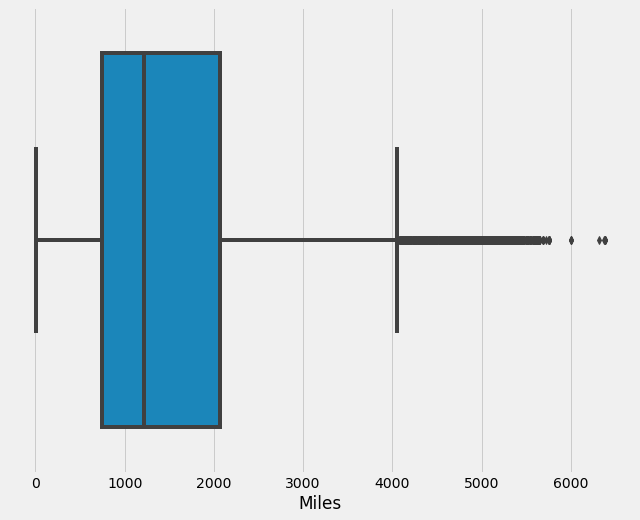

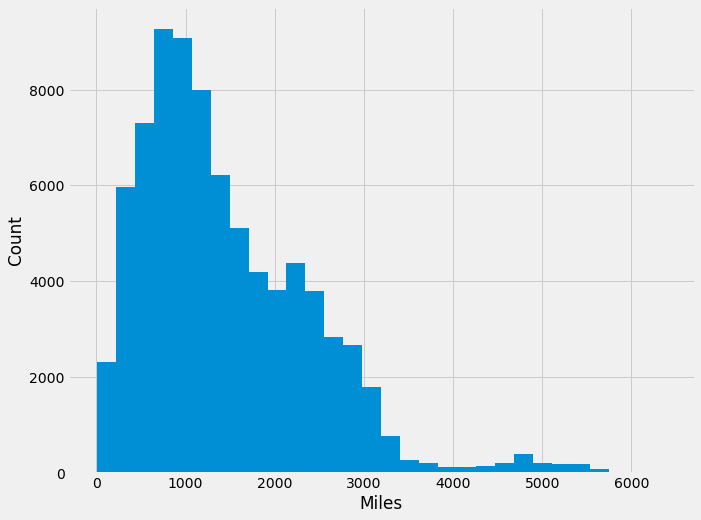

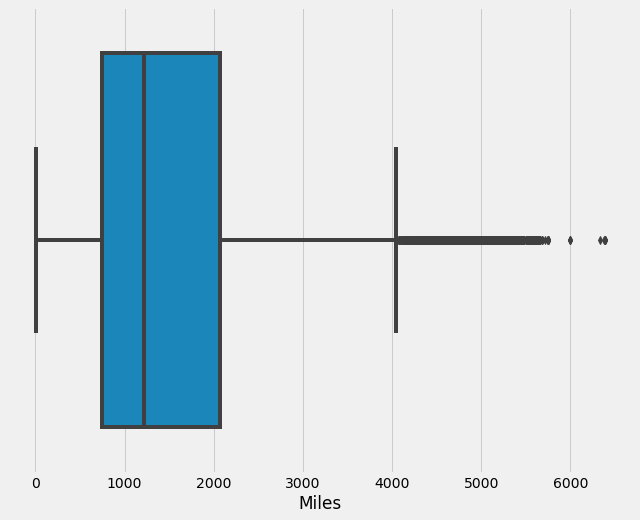

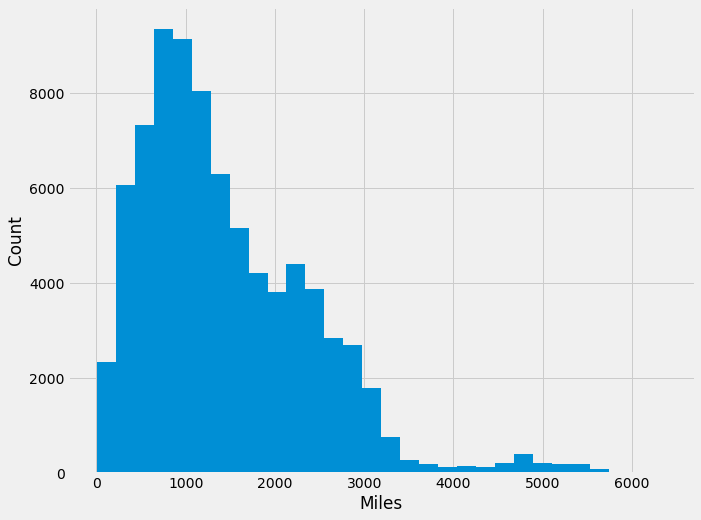

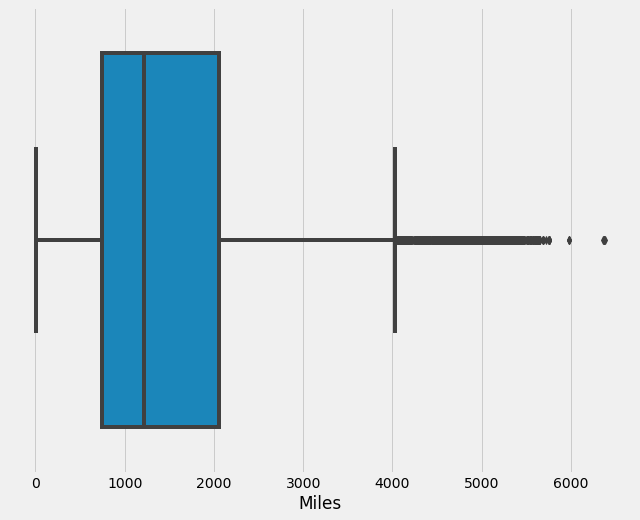

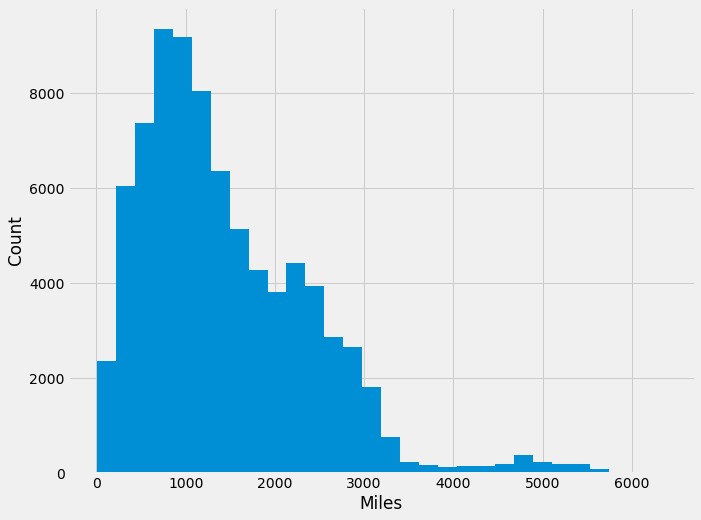

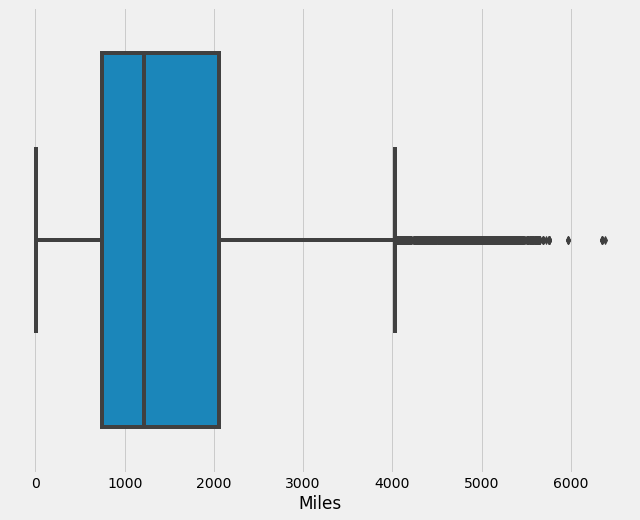

In [59]:
plt.hist(b_0922['miles'], bins=30)
plt.xlabel('Miles')
plt.ylabel('Count')
plt.show()

# Create a boxplot of a numeric variable
sns.boxplot(x=b_0922['miles'])
plt.xlabel('Miles')
plt.show()

plt.hist(b_1022['miles'], bins=30)
plt.xlabel('Miles')
plt.ylabel('Count')
plt.show()

# Create a boxplot of a numeric variable
sns.boxplot(x=b_1022['miles'])
plt.xlabel('Miles')
plt.show()

plt.hist(b_1122['miles'], bins=30)
plt.xlabel('Miles')
plt.ylabel('Count')
plt.show()

# Create a boxplot of a numeric variable
sns.boxplot(x=b_1122['miles'])
plt.xlabel('Miles')
plt.show()

plt.hist(b_1222['miles'], bins=30)
plt.xlabel('Miles')
plt.ylabel('Count')
plt.show()

# Create a boxplot of a numeric variable
sns.boxplot(x=b_1222['miles'])
plt.xlabel('Miles')
plt.show()

plt.hist(b_1322['miles'], bins=30)
plt.xlabel('Miles')
plt.ylabel('Count')
plt.show()

# Create a boxplot of a numeric variable
sns.boxplot(x=b_1322['miles'])
plt.xlabel('Miles')
plt.show()

In [60]:
#Across dataframes
def plot_histograms(df_list, col_name, label_list):
    fig, axs = plt.subplots(len(df_list), 1, figsize=(16, 8*len(df_list)), sharex=True)
    fig.suptitle(f"Histogram of {col_name} for Multiple Dataframes", fontsize=16)

    for i, df in enumerate(df_list):
        axs[i].hist(df[col_name], bins=20, alpha=0.5)
        axs[i].set_ylabel(label_list[i])
    
    plt.xlabel(col_name)
    plt.show()

In [61]:
#Across individual dataframe and all columns
def plot_histograms_df(df):
    fig, axs = plt.subplots(nrows=1, ncols=df.shape[1], figsize=(15, 5))
    for i, col in enumerate(df.columns):
        axs[i].hist(df[col], bins=30)
        axs[i].set_title(col)
    plt.show()

In [62]:
##Across individual dataframe and all columns vertically
def plot_histograms_vertically(df):
    num_cols = len(df.columns)
    fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(6, 4*num_cols))
    for i, col in enumerate(df.columns):
        ax = axes[i]
        ax.hist(df[col], bins=10)
        ax.set_title(col)
    plt.tight_layout()
    plt.show()

In [63]:
import matplotlib.pyplot as plt

def plot_boxplots(df):
    for col in df.columns:
        fig, ax = plt.subplots()
        df.boxplot(column=col, ax=ax)
        ax.set_title(col)
        plt.savefig(f"{col}.jpeg")

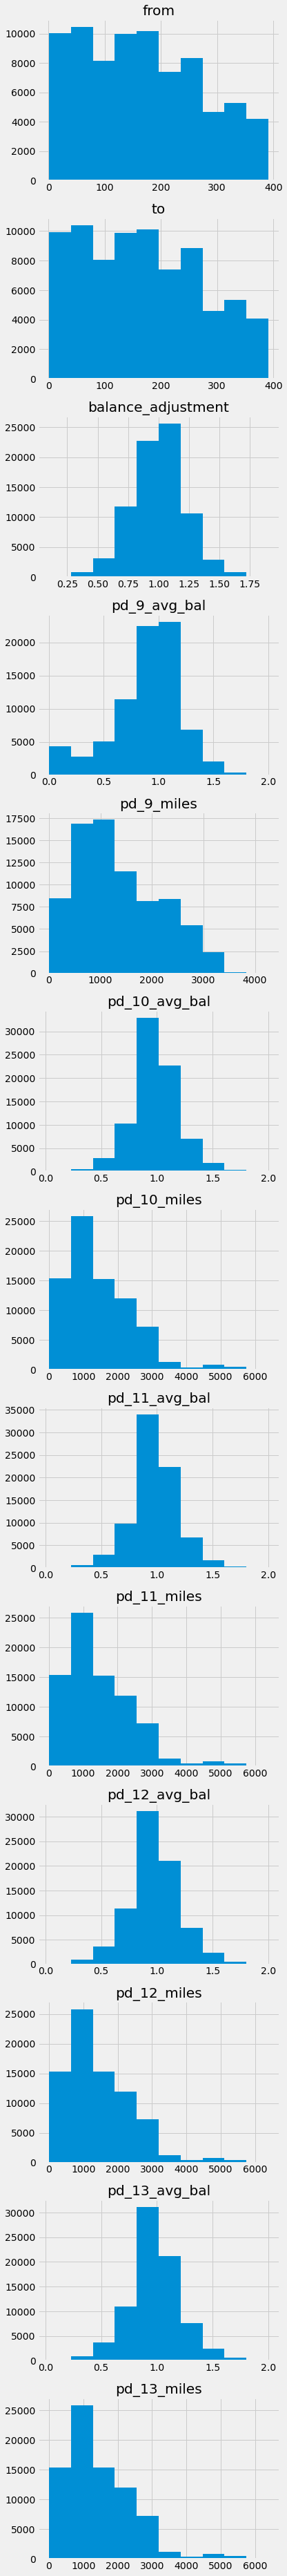

In [64]:
plot_histograms_vertically(b_lanes)

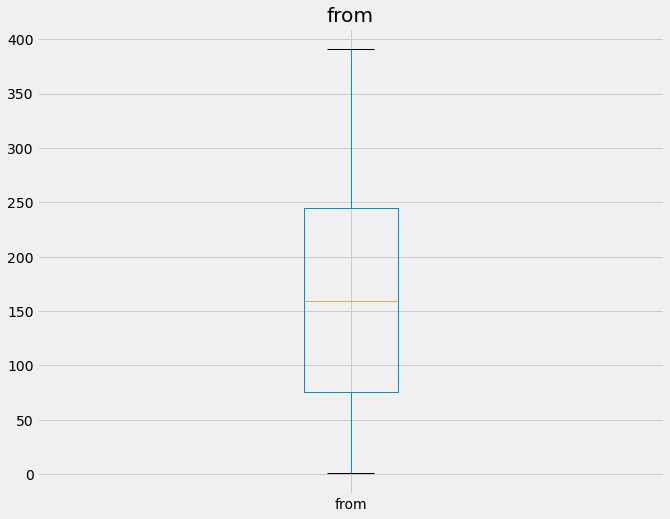

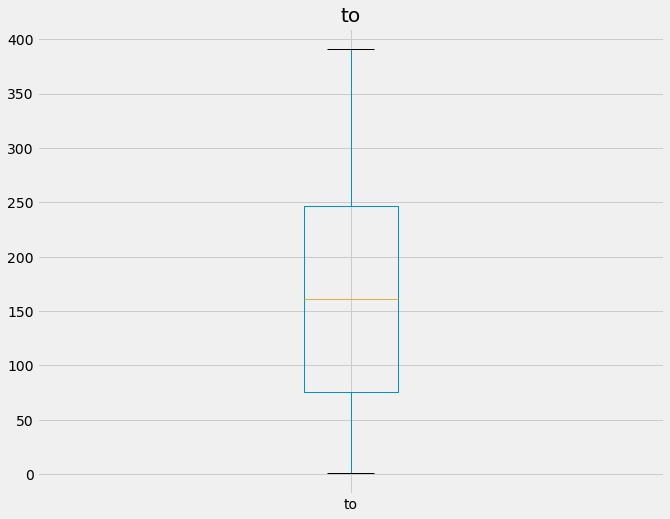

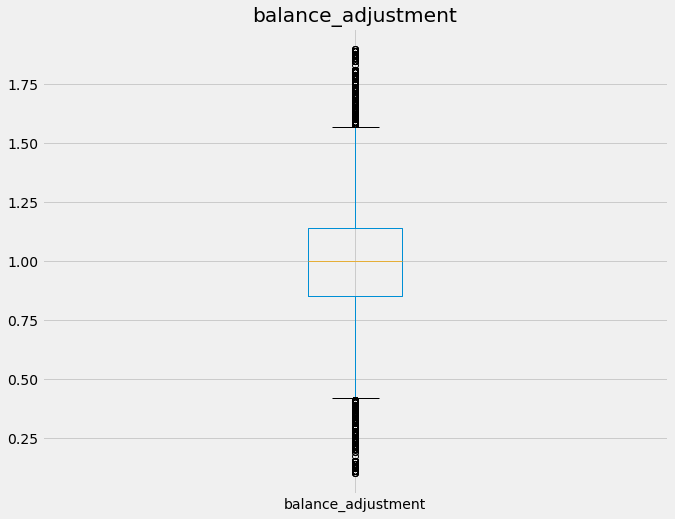

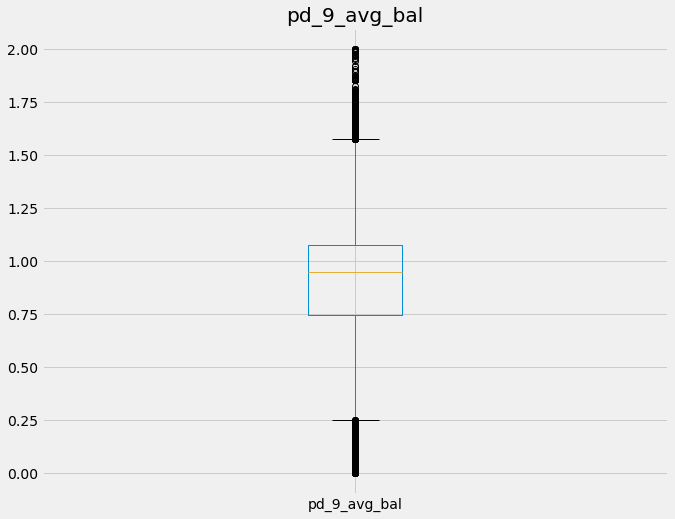

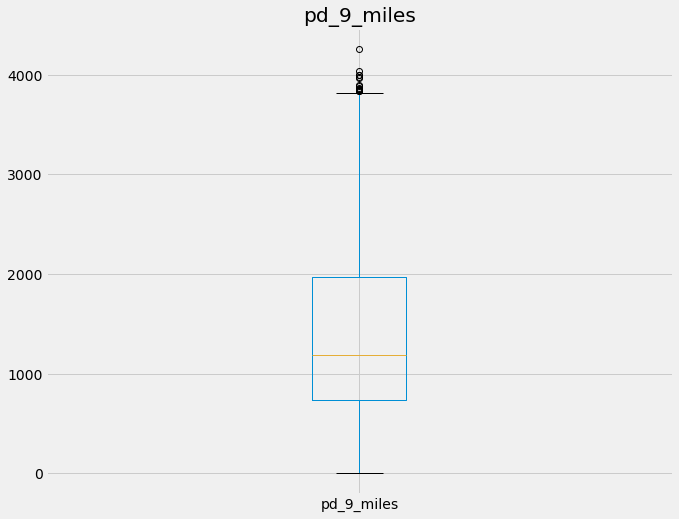

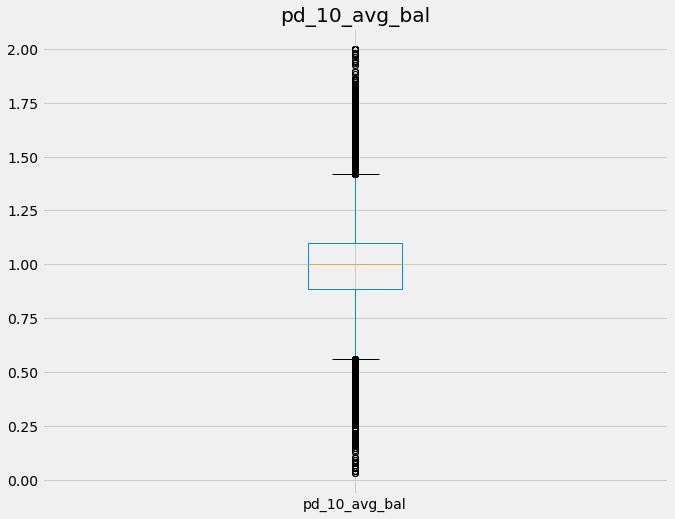

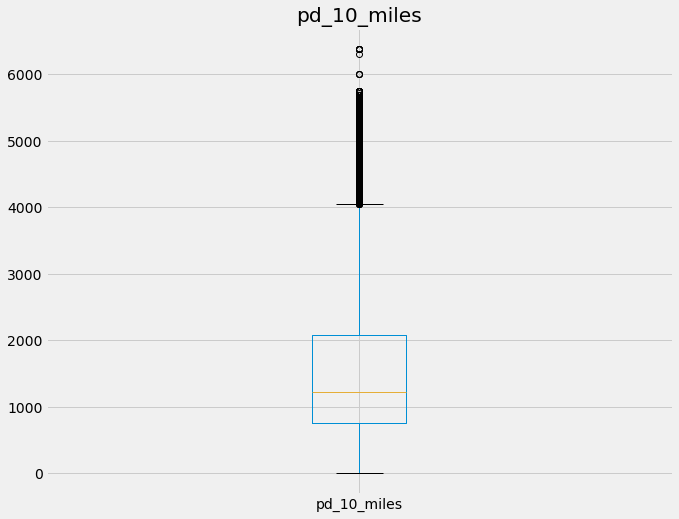

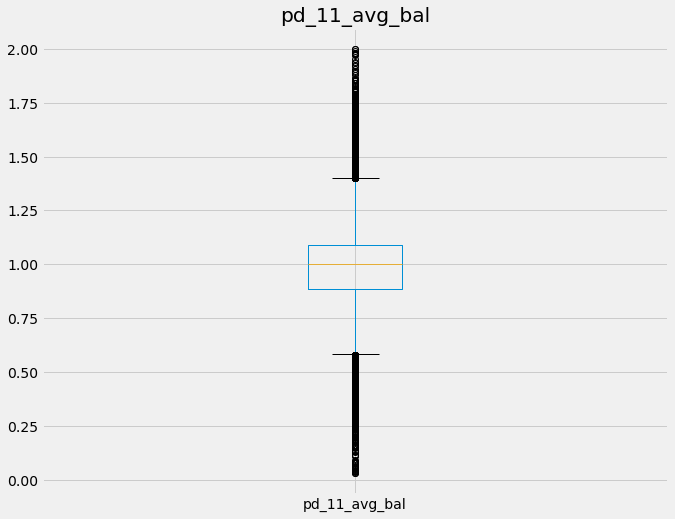

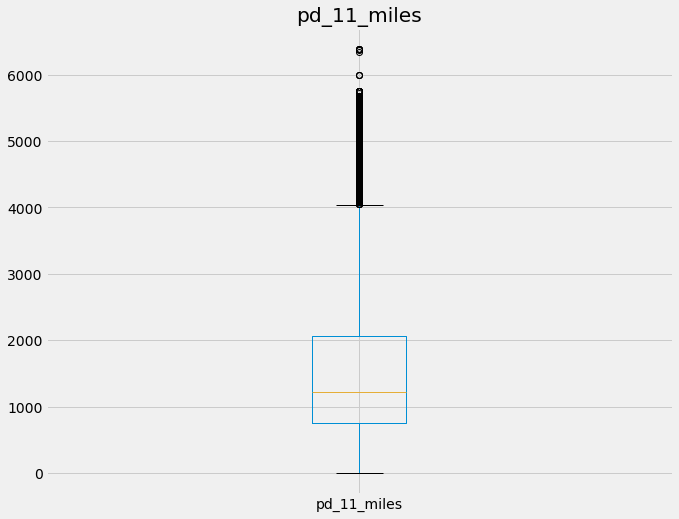

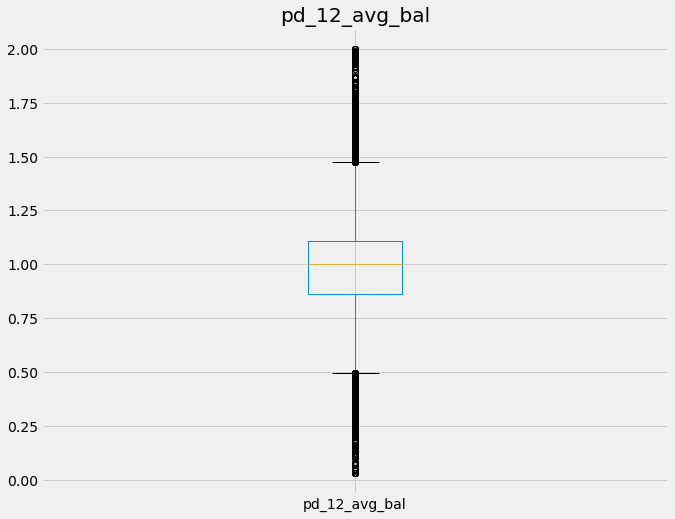

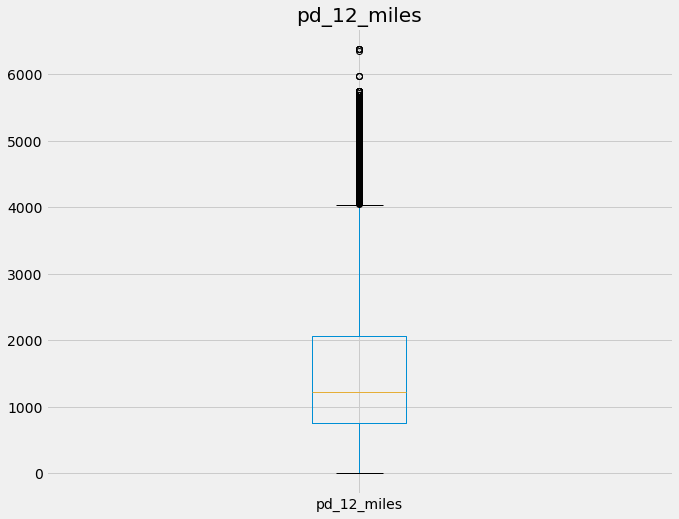

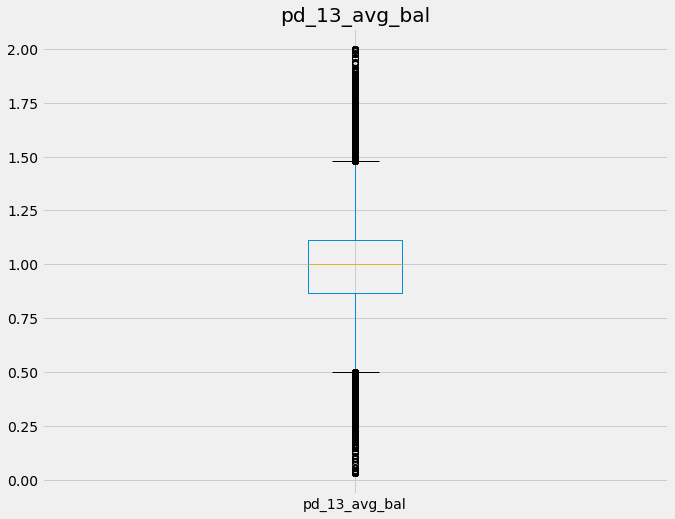

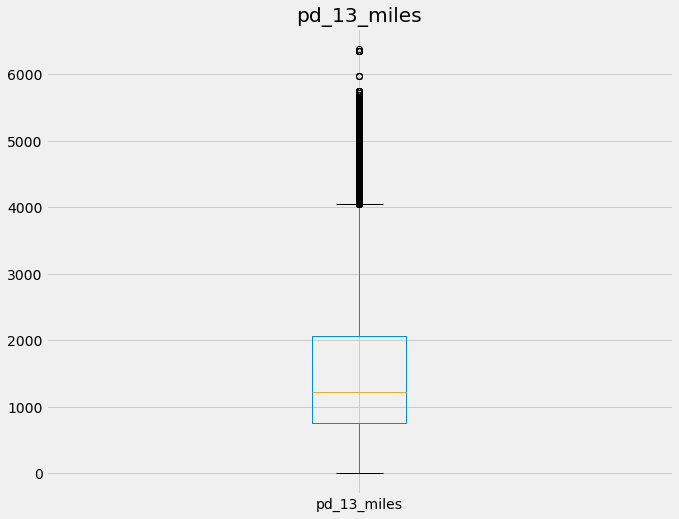

In [65]:
plot_boxplots(b_lanes)

In [66]:
col_name = 'miles'

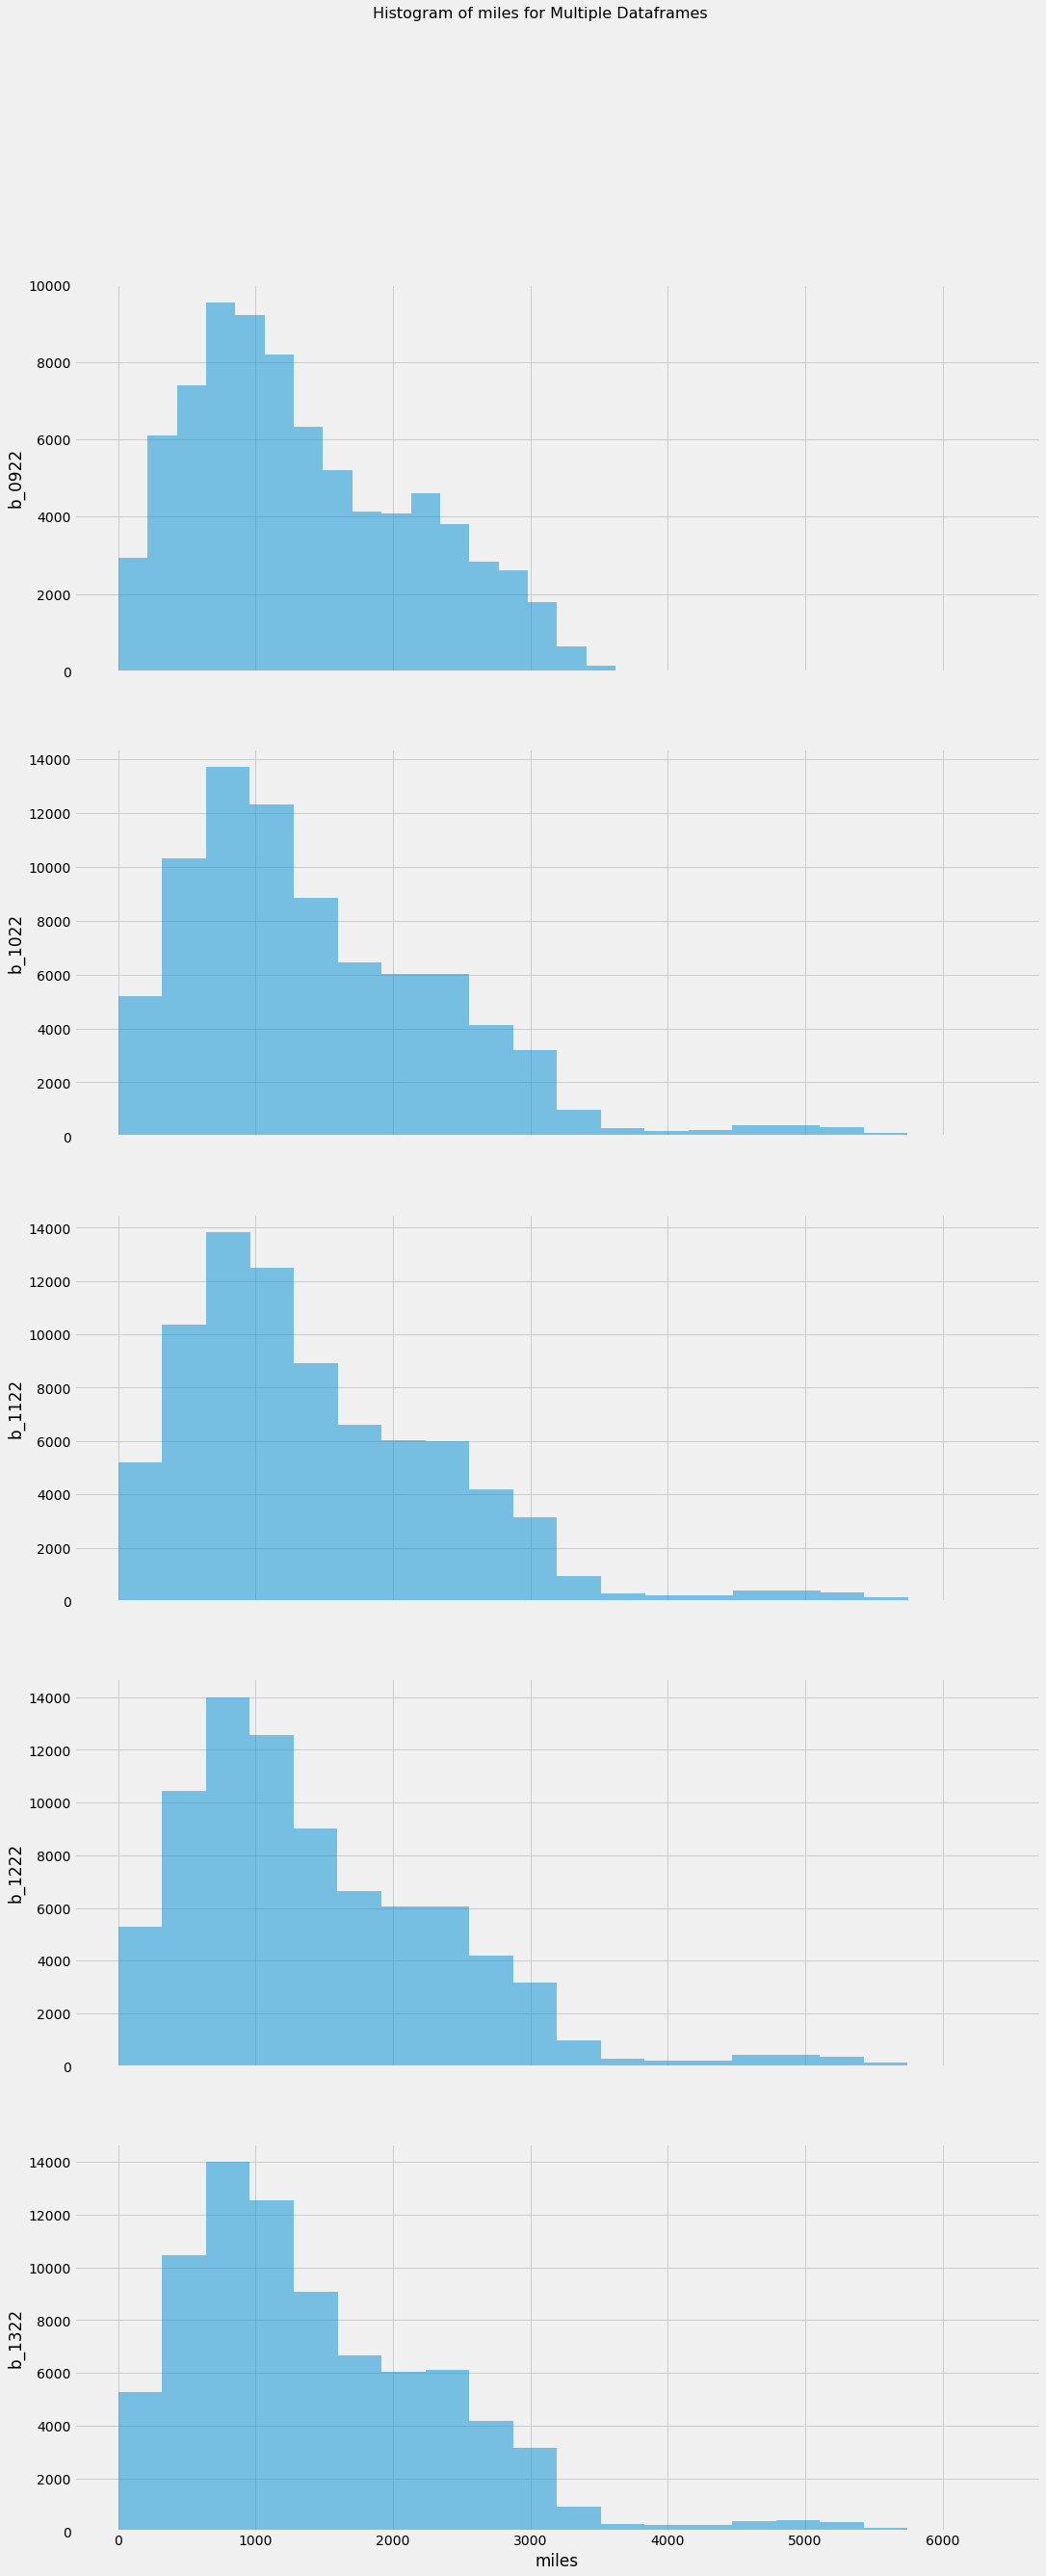

In [67]:
plot_histograms(df_list, col_name, df_list_label)

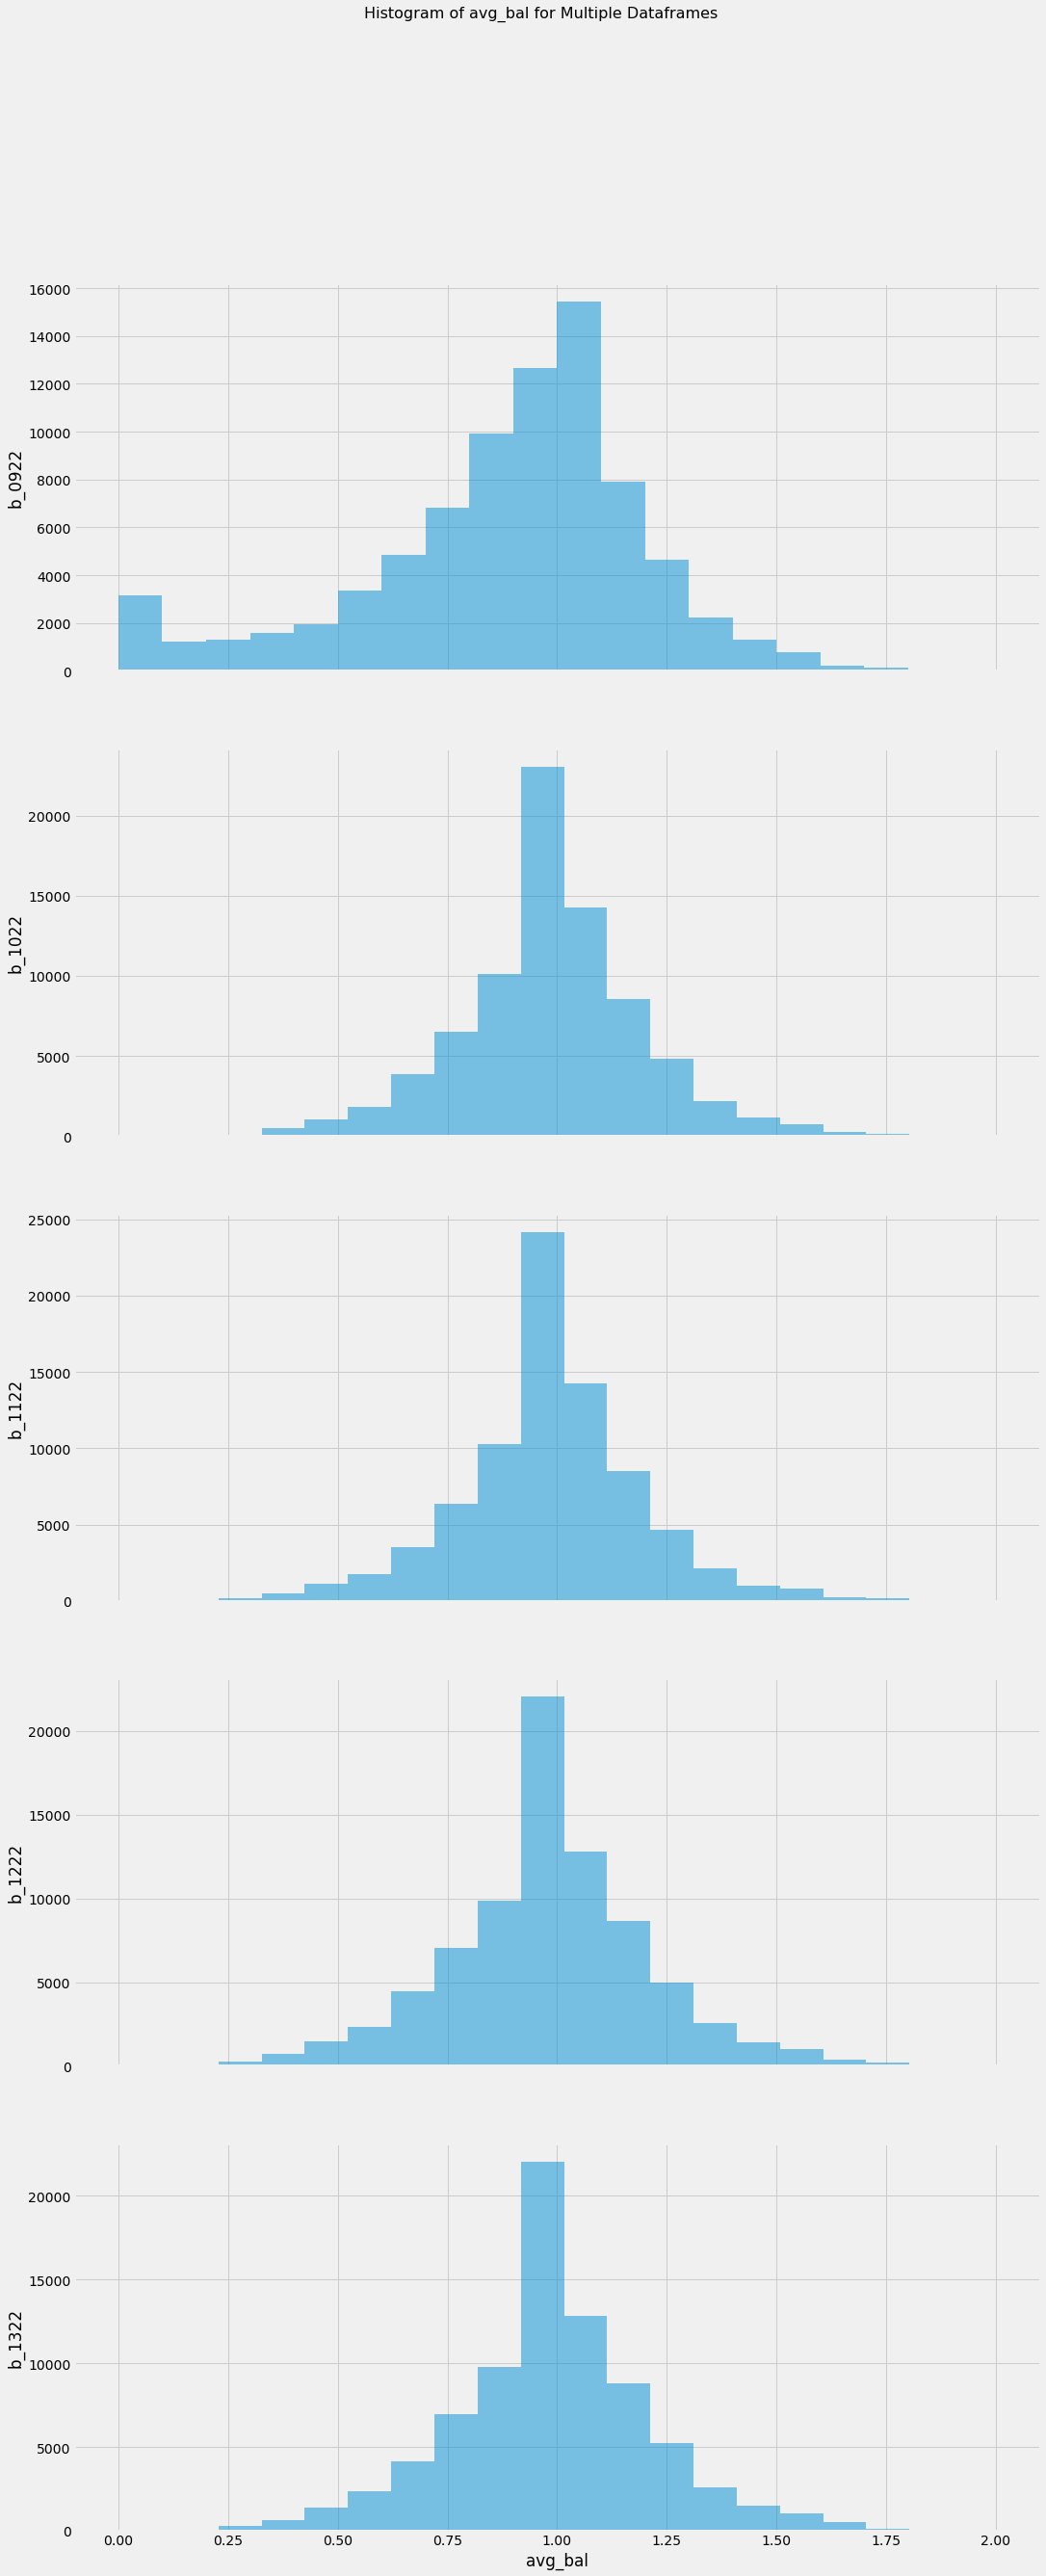

In [68]:
col_name = 'avg_bal'
plot_histograms(df_list, col_name, df_list_label)

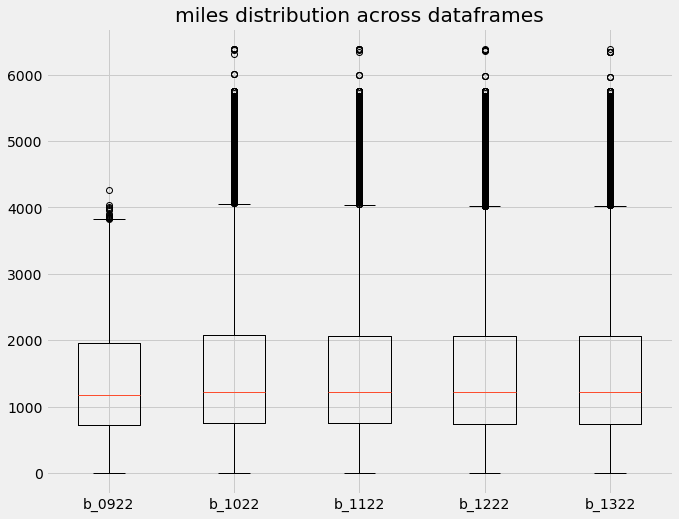

In [69]:
column_name = 'miles'
data=[df[column_name] for df in df_list]
df_list_names = ['b_0922', 'b_1022', 'b_1122', 'b_1222', 'b_1322']
plt.boxplot(data, labels= df_list_names)
plt.title(f"{column_name} distribution across dataframes")
plt.show()


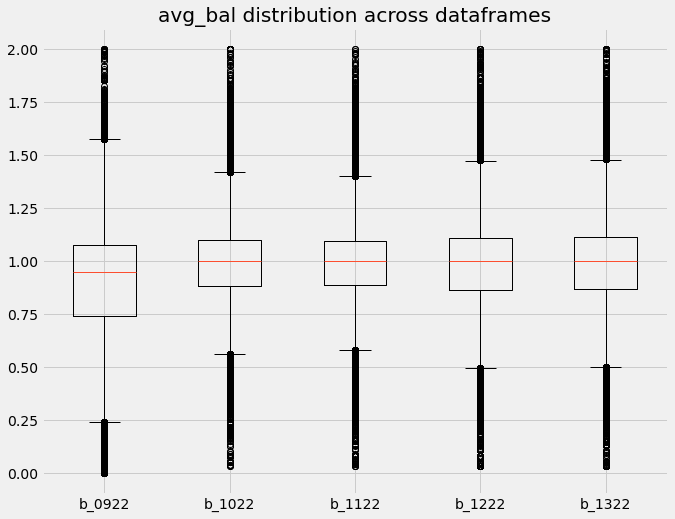

In [70]:
column_name = 'avg_bal'
data=[df[column_name] for df in df_list]
df_list_names = ['b_0922', 'b_1022', 'b_1122', 'b_1222', 'b_1322']
plt.boxplot(data, labels= df_list_names)
plt.title(f"{column_name} distribution across dataframes")
plt.show()

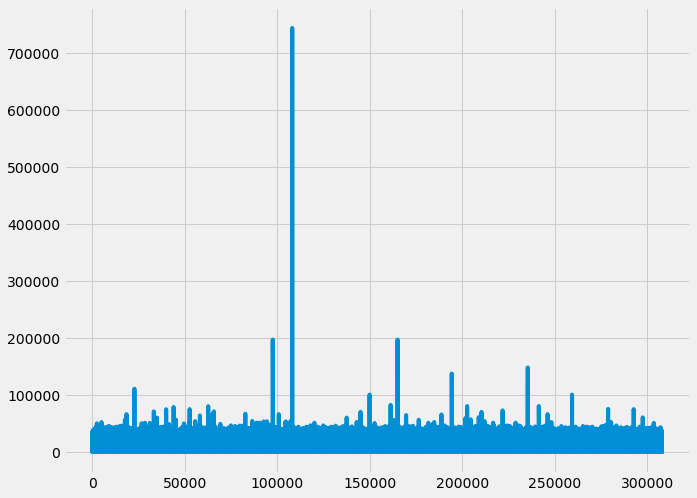

In [71]:
l_0922_sorted.weight_this_leg.plot()
plt.show()

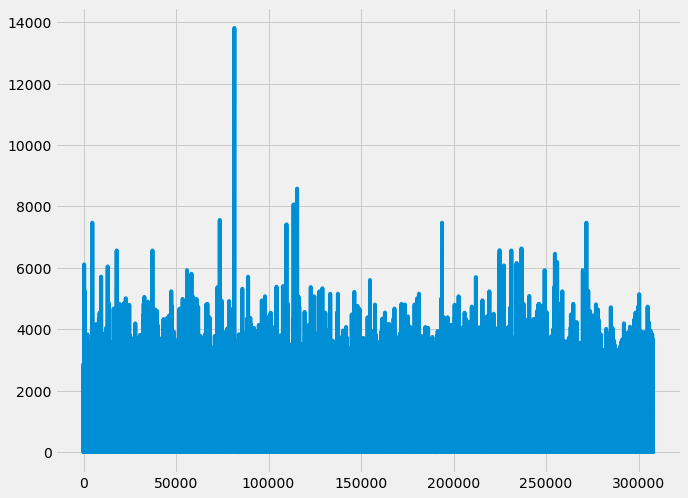

In [72]:
l_0922_sorted.ttl_cube.plot()
plt.show()

In [73]:
x=l_0922_sorted['weight_this_leg']
y=l_0922_sorted['ttl_cube']

In [74]:
def scatter_plot(x_data, y_data, x_label, y_label, title):
    fig, ax = plt.subplots()
    ax.scatter(x_data, y_data, s=10, color='blue', alpha=0.75)

    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

    plt.show()

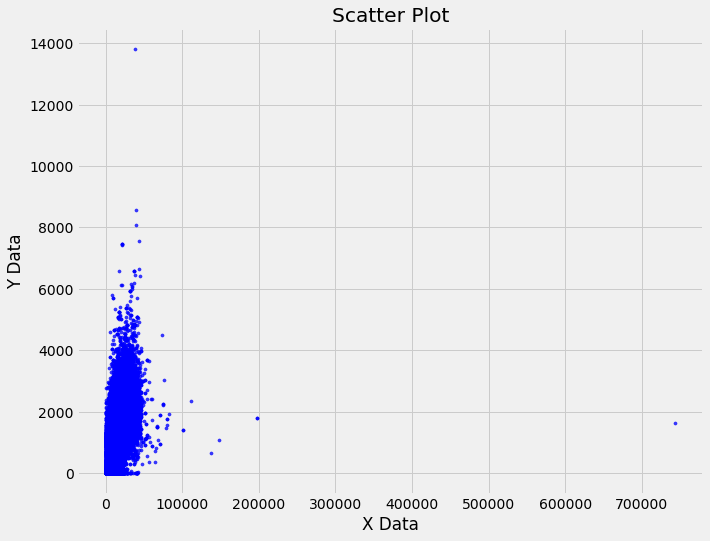

In [75]:
scatter_plot(x,y, 'X Data', 'Y Data', 'Scatter Plot')


# Clean Images

In [76]:
plt.rcParams["axes.facecolor"] = "none"
def plot_sns_histograms(df, figsize=(15, 15), bins=45, titles=None, filename=None, xticklabels_fontsize=16):
    """Creates histograms for each column in a pandas DataFrame."""
    num_cols = df.select_dtypes(include='number').columns.tolist()
    num_cols_count = len(num_cols)
    fig, axes = plt.subplots(num_cols_count, 1, figsize=figsize)
    fig.subplots_adjust(hspace=0.5)
    
    for i, col in enumerate(num_cols):
        ax = axes[i]
        sns.set_theme(style = 'whitegrid')
        #sns.set_style("white")
        sns.histplot(df[col], bins=bins, kde=True, ax=ax)
        if titles and i < len(titles):
            ax.set_title(titles[i], fontsize = 20)
        else: 
            ax.set_title(col)
        ax.set_xlabel(None)
        ax.set_ylabel('Frequency', fontsize = 16)
        ax.tick_params(axis='both', labelsize=xticklabels_fontsize)
    if filename:
        plt.savefig(filename, bbox_inches='tight', transparent=True) 
    plt.show()

In [77]:
def plot_sns_boxplots(df, title, column_names=None, figsize=(16, 8), filename=None, font_size=16):
    if column_names:
        df.columns = column_names
    fig, ax = plt.subplots(figsize=figsize)
    sns.set_theme(style ='whitegrid')
    #sns.set_style("white")
    sns.boxplot(data=df, orient='h')
    #sns.despine(trim = True, left=True, right=True)
    ax.set_title(title, fontsize = 20)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(font_size)
    ax.set_yticks(ax.get_yticks())
    ax.set_yticklabels(ax.get_yticklabels(), fontsize = font_size)
    plt.rcParams["axes.facecolor"] = "none"
    if filename:
        fig.savefig(filename, bbox_inches='tight', transparent=True)
    plt.show()

<AxesSubplot:>

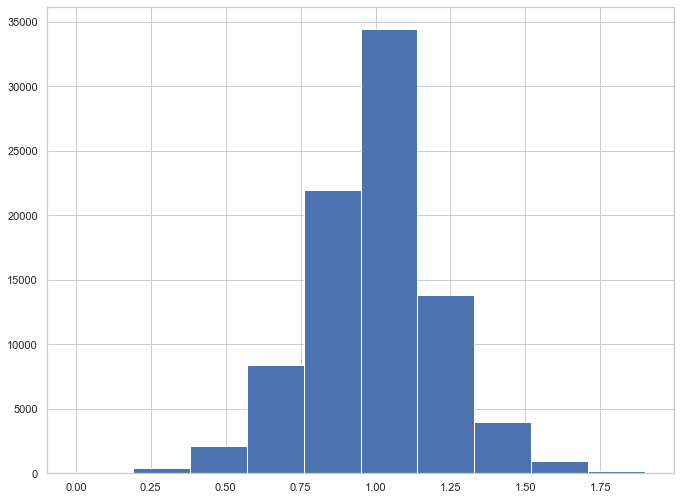

In [165]:
lane_df['balance_adjustment'].hist()

C:\Users\Adrian\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


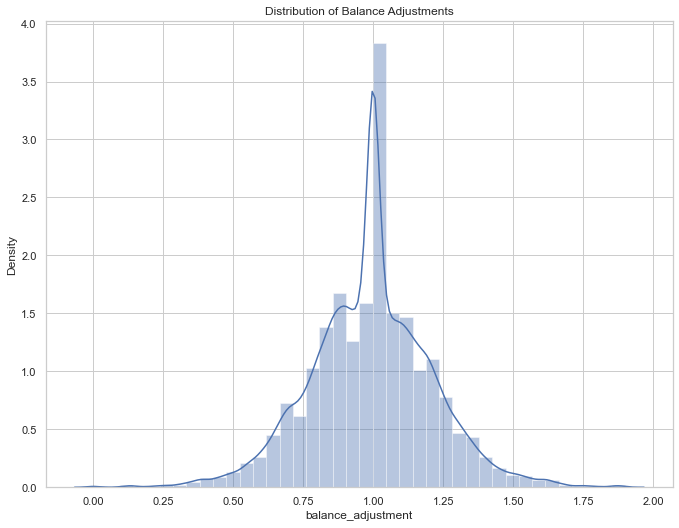

In [173]:
sns.distplot(lane_df['balance_adjustment'], bins = 40, kde = True)
plt.title('Distribution of Balance Adjustments')
plt.savefig("distplot.jpg")

In [78]:
column_names = ['Lane Bal Adjustments', 'Period 9', 'Period 10', 'Period 11', 'Period 12', 'Period 13']

In [79]:
column_names_miles = ['Period 9', 'Period 10', 'Period 11', 'Period 12', 'Period 13']

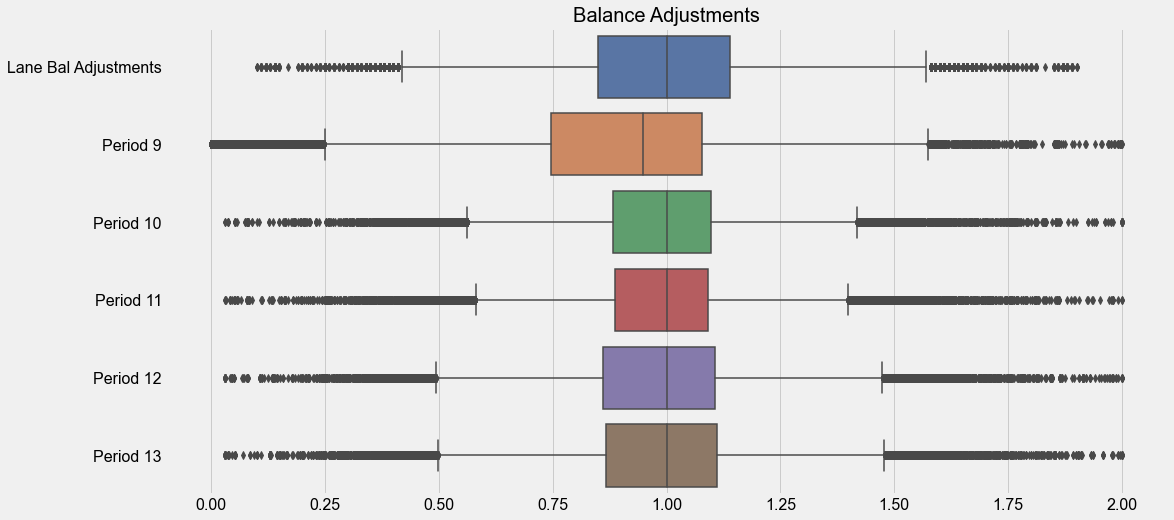

In [80]:
plot_sns_boxplots(b_lanes_bal_visual, 'Balance Adjustments', column_names = column_names, filename='Images\Bal_white.jpeg')

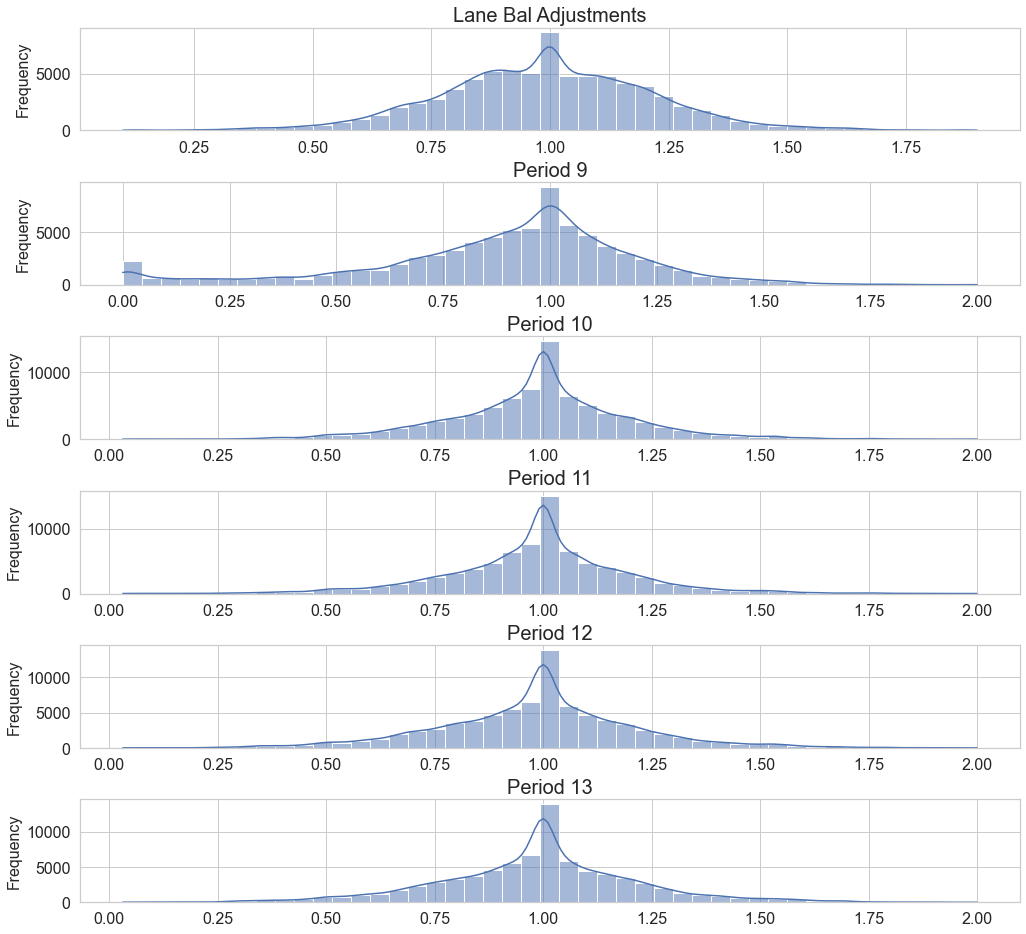

In [81]:
plot_sns_histograms(b_lanes_bal_visual, titles=column_names, filename = 'Histograms_balance_adjustments.jpeg')

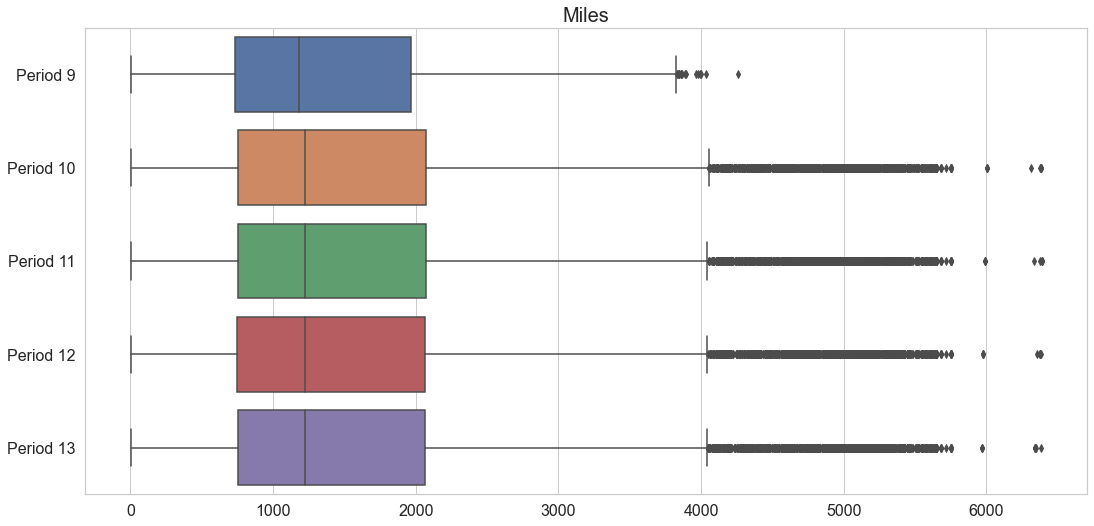

In [82]:
plot_sns_boxplots(b_lanes_miles_visual, 'Miles', column_names = column_names_miles, filename='miles.jpeg')

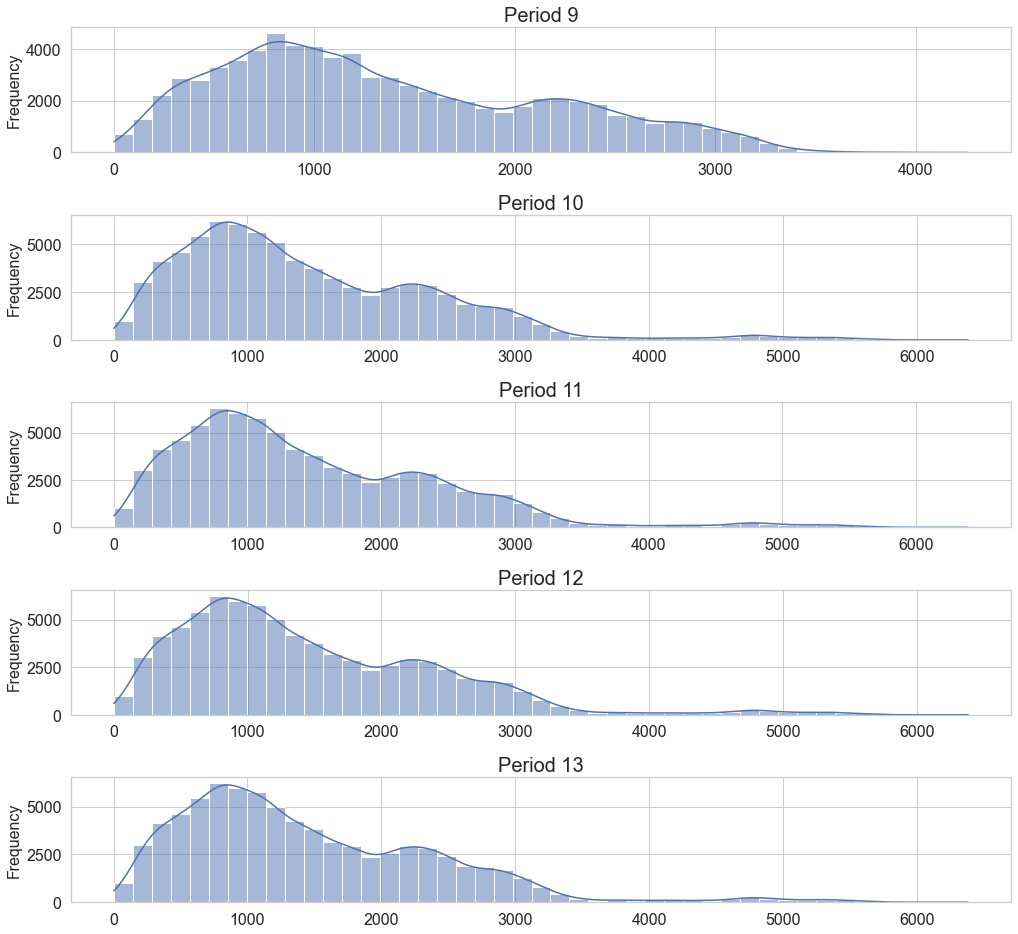

In [83]:
plot_sns_histograms(b_lanes_miles_visual, titles=column_names_miles, filename = 'Histograms_miles.jpeg')

In [84]:
b_lanes

,from,to,balance_adjustment,pd_9_avg_bal,pd_9_miles,pd_10_avg_bal,pd_10_miles,pd_11_avg_bal,pd_11_miles,pd_12_avg_bal,pd_12_miles,pd_13_avg_bal,pd_13_miles
0,1,3,1.30,1.543,101,1.581,101,1.618,101,1.657,101,1.658,101
1,1,4,1.73,1.609,69,1.636,69,1.681,69,1.741,69,1.733,69
2,1,5,0.66,0.500,145,0.501,145,0.456,145,0.623,145,0.464,145
3,1,6,0.78,1.000,325,1.000,325,0.378,325,0.319,325,0.329,325
4,1,7,0.50,0.392,166,0.427,166,0.436,166,0.365,166,0.363,166
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78630,391,362,1.01,1.271,668,1.298,666,1.011,655,1.011,655,1.011,655
78631,391,363,0.70,1.010,657,1.011,655,1.011,655,1.011,655,1.011,655
78632,391,364,1.01,1.271,668,1.298,666,1.011,655,1.011,655,1.011,655
78633,391,380,1.26,1.013,2205,1.013,2205,1.056,2893,1.060,2893,1.065,2893


In [85]:
b_lanes.describe()

,from,to,balance_adjustment,pd_9_avg_bal,pd_9_miles,pd_10_avg_bal,pd_10_miles,pd_11_avg_bal,pd_11_miles,pd_12_avg_bal,pd_12_miles,pd_13_avg_bal,pd_13_miles
count,78635.000000,78635.000000,78635.000000,78635.000000,78635.000000,78635.000000,78635.000000,78635.000000,78635.000000,78635.000000,78635.000000,78635.000000,78635.000000
mean,166.720671,167.403561,0.991071,0.887581,1358.851529,0.990392,1454.772201,0.988392,1454.537051,0.985426,1453.984600,0.989287,1452.828346
std,104.051029,103.838441,0.223685,0.321001,802.983063,0.207948,956.975235,0.206578,956.282953,0.228915,955.550266,0.229145,953.530812
min,1.000000,1.000000,0.100000,0.000000,2.000000,0.031000,2.000000,0.031000,2.000000,0.031000,2.000000,0.031000,2.000000
25%,76.000000,76.000000,0.850000,0.746000,730.000000,0.883000,751.000000,0.887000,751.000000,0.861000,750.000000,0.866000,750.500000
50%,159.000000,161.000000,1.000000,0.949000,1183.000000,1.000000,1220.000000,1.000000,1221.000000,1.000000,1222.000000,1.000000,1221.000000
75%,245.000000,247.000000,1.140000,1.077000,1969.000000,1.097000,2072.000000,1.091500,2069.000000,1.106000,2067.000000,1.111000,2068.000000
max,391.000000,391.000000,1.900000,2.000000,4260.000000,2.000000,6384.000000,2.000000,6389.000000,2.000000,6383.000000,2.000000,6384.000000


In [86]:
b_lanes.describe().to_excel('stats2.xlsx')

In [87]:
b_lanes.kurtosis().to_excel('kurt.xlsx')

In [88]:
b_lanes.skew().to_excel('skew.xlsx')

In [89]:
skewtest = stats.skewtest(b_lanes_bal_visual)

In [91]:
stats.kurtosistest(b_lanes_bal_visual)

KurtosistestResult(statistic=array([27.18816646, 37.01837014, 50.60311594, 53.69527565, 43.74189358,
       42.49792042]), pvalue=array([8.96430935e-163, 5.79925829e-300, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000]))

In [92]:
import pandas as pd
from scipy.stats import kurtosistest

# Run the kurtosis test on the dataset
kurtosis_test = kurtosistest(b_lanes_bal_visual)

# Create a pandas dataframe to store the test results
results_df = pd.DataFrame({
    'Test Statistic': [kurtosis_test[0]],
    'p-value': [kurtosis_test[1]]
})

# Print the table of test results
print(results_df)

                                      Test Statistic  \
0  [27.188166456856592, 37.01837013775613, 50.603...   

                                             p-value  
0  [8.964309346575337e-163, 5.7992582943335425e-3...  


In [93]:
import pandas as pd
from scipy.stats import normaltest

# Load your dataset into a pandas dataframe (replace 'filename.csv' with your filename)
df = b_lanes_bal_visual

# Run the normality test on the dataset
normality_test = normaltest(df)

# Create a pandas dataframe to store the test results
results_df_normal = pd.DataFrame({
    'Test Statistic': [normality_test[0]],
    'p-value': [normality_test[1]]
})

In [94]:
import pandas as pd
from scipy.stats import skewtest

# Load your dataset into a pandas dataframe (replace 'filename.csv' with your filename)
df = b_lanes_bal_visual

# Run the skewness test on the dataset
skewness_test = skewtest(df)

# Create a pandas dataframe to store the test results
results_df_skew = pd.DataFrame({
    'Test Statistic': [skewness_test[0]],
    'p-value': [skewness_test[1]]
})

In [95]:
import pandas as pd
from scipy.stats import kurtosistest

# Run the kurtosis test on the dataset
kurtosis_test = kurtosistest(b_lanes_bal_visual)

# Create a pandas dataframe to store the test results
results_df_kurtosis = pd.DataFrame({
    'Test Statistic': [kurtosis_test[0]],
    'p-value': [kurtosis_test[1]]
})


In [96]:
results_df_normal.to_excel('normal results.xlsx')
results_df_skew.to_excel('skew_results.xlsx')
results_df_kurtosis.to_excel('kurt_results.xlsx')

In [97]:
stats.normaltest(b_lanes_bal_visual)

NormaltestResult(statistic=array([ 749.50070014, 7816.47263568, 2562.34348346, 2911.57105576,
       1914.45168001, 1807.84277656]), pvalue=array([1.77007176e-163, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000]))

In [98]:
b_lanes_bal_visual

,Lane Bal Adjustments,Period 9,Period 10,Period 11,Period 12,Period 13
0,1.30,1.543,1.581,1.618,1.657,1.658
1,1.73,1.609,1.636,1.681,1.741,1.733
2,0.66,0.500,0.501,0.456,0.623,0.464
3,0.78,1.000,1.000,0.378,0.319,0.329
4,0.50,0.392,0.427,0.436,0.365,0.363
...,...,...,...,...,...,...
78630,1.01,1.271,1.298,1.011,1.011,1.011
78631,0.70,1.010,1.011,1.011,1.011,1.011
78632,1.01,1.271,1.298,1.011,1.011,1.011
78633,1.26,1.013,1.013,1.056,1.060,1.065


In [99]:
b_lanes.corr()

,from,to,balance_adjustment,pd_9_avg_bal,pd_9_miles,pd_10_avg_bal,pd_10_miles,pd_11_avg_bal,pd_11_miles,pd_12_avg_bal,pd_12_miles,pd_13_avg_bal,pd_13_miles
from,1.000000,-0.036637,-0.210931,-0.250252,0.119680,-0.198638,0.132103,-0.190436,0.131586,-0.192429,0.131321,-0.179491,0.129534
to,-0.036637,1.000000,0.196667,-0.108958,0.138830,0.142504,0.134118,0.113154,0.134312,0.109294,0.136005,0.108440,0.137359
balance_adjustment,-0.210931,0.196667,1.000000,0.506395,-0.030941,0.736297,-0.039716,0.747769,-0.039595,0.809755,-0.039242,0.762666,-0.039123
pd_9_avg_bal,-0.250252,-0.108958,0.506395,1.000000,-0.039137,0.626365,-0.036140,0.603464,-0.037859,0.588377,-0.036778,0.587046,-0.035860
pd_9_miles,0.119680,0.138830,-0.030941,-0.039137,1.000000,-0.018189,0.873493,-0.016088,0.867076,-0.030685,0.864184,-0.010786,0.864968
pd_10_avg_bal,-0.198638,0.142504,0.736297,0.626365,-0.018189,1.000000,-0.069076,0.951419,-0.069078,0.867582,-0.067204,0.830566,-0.066204
pd_10_miles,0.132103,0.134118,-0.039716,-0.036140,0.873493,-0.069076,1.000000,-0.069708,0.994888,-0.073981,0.992433,-0.060531,0.990635
pd_11_avg_bal,-0.190436,0.113154,0.747769,0.603464,-0.016088,0.951419,-0.069708,1.000000,-0.069331,0.899150,-0.067339,0.853777,-0.066374
pd_11_miles,0.131586,0.134312,-0.039595,-0.037859,0.867076,-0.069078,0.994888,-0.069331,1.000000,-0.073753,0.997620,-0.060359,0.995864
pd_12_avg_bal,-0.192429,0.109294,0.809755,0.588377,-0.030685,0.867582,-0.073981,0.899150,-0.073753,1.000000,-0.073538,0.905368,-0.075440


In [100]:
b_lanes.pd_9_avg_bal.std()

0.32100108287601786

In [101]:
b_lanes['pd_9_avg_bal'].quantile([.05,.15,.25,.5,.75,.95])

0.05    0.171
0.15    0.586
0.25    0.746
0.50    0.949
0.75    1.077
0.95    1.327
Name: pd_9_avg_bal, dtype: float64

In [102]:
b_lanes.describe(percentiles= [.05,.15,.25,.5,.75,.95]).to_excel('stats.xlsx')

In [103]:
b_lanes.describe(percentiles= [.05,.15,.25,.5,.75,.95])

,from,to,balance_adjustment,pd_9_avg_bal,pd_9_miles,pd_10_avg_bal,pd_10_miles,pd_11_avg_bal,pd_11_miles,pd_12_avg_bal,pd_12_miles,pd_13_avg_bal,pd_13_miles
count,78635.000000,78635.000000,78635.000000,78635.000000,78635.000000,78635.000000,78635.000000,78635.000000,78635.000000,78635.000000,78635.000000,78635.000000,78635.000000
mean,166.720671,167.403561,0.991071,0.887581,1358.851529,0.990392,1454.772201,0.988392,1454.537051,0.985426,1453.984600,0.989287,1452.828346
std,104.051029,103.838441,0.223685,0.321001,802.983063,0.207948,956.975235,0.206578,956.282953,0.228915,955.550266,0.229145,953.530812
min,1.000000,1.000000,0.100000,0.000000,2.000000,0.031000,2.000000,0.031000,2.000000,0.031000,2.000000,0.031000,2.000000
5%,16.000000,16.000000,0.630000,0.171000,275.000000,0.637000,282.000000,0.633000,282.000000,0.595000,282.000000,0.597000,283.000000
15%,46.000000,46.000000,0.770000,0.586000,528.000000,0.792000,541.000000,0.796000,541.000000,0.765000,541.000000,0.768000,542.000000
25%,76.000000,76.000000,0.850000,0.746000,730.000000,0.883000,751.000000,0.887000,751.000000,0.861000,750.000000,0.866000,750.500000
50%,159.000000,161.000000,1.000000,0.949000,1183.000000,1.000000,1220.000000,1.000000,1221.000000,1.000000,1222.000000,1.000000,1221.000000
75%,245.000000,247.000000,1.140000,1.077000,1969.000000,1.097000,2072.000000,1.091500,2069.000000,1.106000,2067.000000,1.111000,2068.000000
95%,353.000000,352.000000,1.350000,1.327000,2866.000000,1.328000,3078.000000,1.323000,3074.000000,1.366000,3070.300000,1.376000,3063.000000


In [104]:
b_lanes['pd_9_avg_bal'].quantile(.75)-b_lanes['pd_9_avg_bal'].quantile(.25)



0.33099999999999996

In [105]:
robust.scale.mad(b_lanes['pd_9_avg_bal'])

0.2372163549608962

In [106]:
stats.jarque_bera(b_lanes['pd_9_avg_bal'])

Jarque_beraResult(statistic=11021.251113338243, pvalue=0.0)

In [107]:
b_lanes['pd_9_avg_bal']

0        1.543
1        1.609
2        0.500
3        1.000
4        0.392
         ...  
78630    1.271
78631    1.010
78632    1.271
78633    1.013
78634    0.889
Name: pd_9_avg_bal, Length: 78635, dtype: float64

In [108]:
import numpy as np
from scipy.stats import jarque_bera

# Generate some normally distributed random data
data = b_lanes['pd_9_miles']

# Perform Jarque-Bera test
jb_test = jarque_bera(data)

# Print the test statistic and p-value
print("Jarque-Bera test statistic:", jb_test[0])
print("p-value:", jb_test[1])

Jarque-Bera test statistic: 5163.817847479533
p-value: 0.0


In [109]:
sm.stats.omni_normtest(b_lanes['pd_9_avg_bal'])

NormaltestResult(statistic=7816.472635676359, pvalue=0.0)

In [110]:
from scipy.stats import anderson

result = anderson(b_lanes['pd_9_avg_bal'])

In [111]:
result

AndersonResult(statistic=1478.1774142824725, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [112]:
from scipy.stats import kstest, norm

data = b_lanes['balance_adjustment'].values
stat, p = kstest(data, norm.cdf)

alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Sample does not look Gaussian (reject H0)


In [113]:
from scipy.stats import kstest, norm

data = b_lanes['pd_9_avg_bal'].values
stat, p = kstest(data, norm.cdf)

alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Sample does not look Gaussian (reject H0)


In [114]:
from scipy.stats import kstest, norm

data = b_lanes['pd_10_avg_bal'].values
stat, p = kstest(data, norm.cdf)

alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Sample does not look Gaussian (reject H0)


In [115]:
from scipy.stats import kstest, norm

data = b_lanes['pd_11_avg_bal'].values
stat, p = kstest(data, norm.cdf)

alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Sample does not look Gaussian (reject H0)


In [116]:
from scipy.stats import kstest, norm

data = b_lanes['pd_12_avg_bal'].values
stat, p = kstest(data, norm.cdf)

alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Sample does not look Gaussian (reject H0)


In [117]:
from scipy.stats import kstest, norm

data = b_lanes['pd_13_avg_bal'].values
stat, p = kstest(data, norm.cdf)

alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Sample does not look Gaussian (reject H0)


In [118]:
import matplotlib.pyplot as plt
import scipy.stats as stats

def plot_qqplots(df, filename, figsize=(12,8)):
    fig, ax = plt.subplots(2, 3, figsize=figsize)
    ax = ax.flatten()
    for i, col in enumerate(df.columns):
        stats.probplot(df[col], plot=ax[i])
        ax[i].set_title(col)
    plt.show()
    if filename:
        plt.savefig(filename, bbox_inches='tight') 
    plt.show()
    


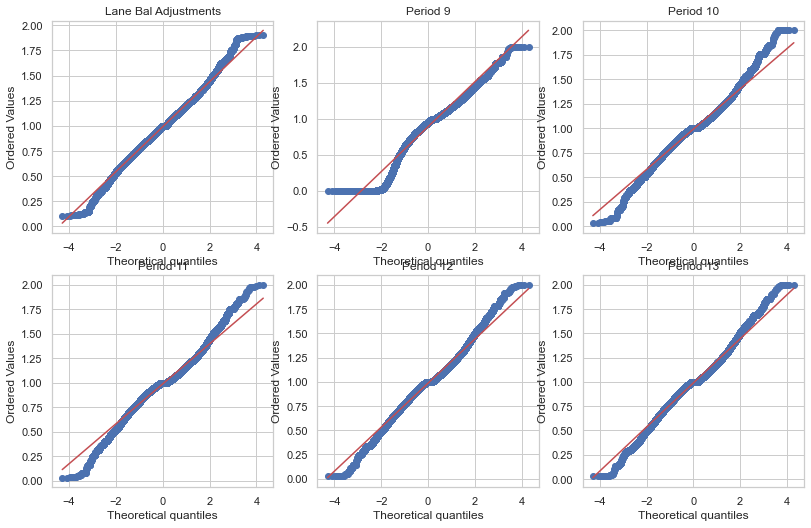

<Figure size 720x576 with 0 Axes>

In [119]:
plot_qqplots(b_lanes_bal_visual, 'qqplots.jpg')

In [120]:
skewtest

<function scipy.stats.stats.skewtest(a, axis=0, nan_policy='propagate', alternative='two-sided')>

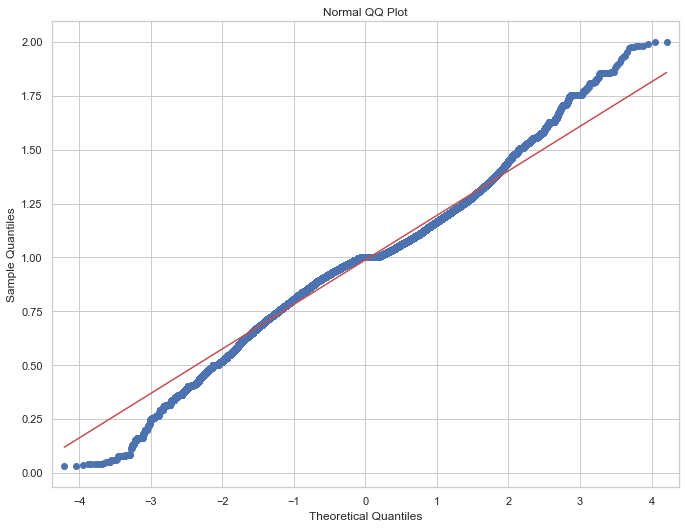

In [121]:
data = b_lanes['pd_11_avg_bal'].values

# Generate QQ plot
fig = sm.qqplot(data, line='s')

# Set plot title
plt.title('Normal QQ Plot')

# Show plot
plt.show()

In [122]:
import numpy as np
from scipy.stats import jarque_bera

# Generate some normally distributed random data

# Perform Jarque-Bera test
jb_test = jarque_bera(data)

# Print the test statistic and p-value
print("Jarque-Bera test statistic:", jb_test[0])
print("p-value:", jb_test[1])

Jarque-Bera test statistic: 8817.744733298992
p-value: 0.0


In [123]:
data=b_lanes['balance_adjustment'].values


In [124]:
data

array([1.3 , 1.73, 0.66, ..., 1.01, 1.26, 1.09])

In [125]:
b_lanes[b_lanes['pd_9_avg_bal'] < .5]


,from,to,balance_adjustment,pd_9_avg_bal,pd_9_miles,pd_10_avg_bal,pd_10_miles,pd_11_avg_bal,pd_11_miles,pd_12_avg_bal,pd_12_miles,pd_13_avg_bal,pd_13_miles
4,1,7,0.50,0.392,166,0.427,166,0.436,166,0.365,166,0.363,166
6,1,10,0.51,0.473,287,0.516,287,0.499,287,0.509,287,0.539,287
9,1,13,1.00,0.339,280,0.257,280,0.296,280,1.000,280,1.000,280
21,1,26,0.34,0.352,289,0.364,289,0.367,289,0.334,289,0.508,289
66,1,74,0.66,0.485,427,0.467,427,0.533,427,0.642,427,0.530,427
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78612,391,326,1.03,0.006,3128,1.002,3126,1.025,3088,1.026,3088,1.046,3088
78613,391,327,1.03,0.006,3128,1.002,3126,1.025,3088,1.026,3088,1.046,3088
78615,391,329,1.03,0.006,3128,1.002,3126,1.025,3088,1.026,3088,1.046,3088
78616,391,330,1.03,0.006,3128,1.002,3126,1.025,3088,1.026,3088,1.046,3088


In [126]:
b_lanes[b_lanes['pd_10_avg_bal'] < .5]


,from,to,balance_adjustment,pd_9_avg_bal,pd_9_miles,pd_10_avg_bal,pd_10_miles,pd_11_avg_bal,pd_11_miles,pd_12_avg_bal,pd_12_miles,pd_13_avg_bal,pd_13_miles
4,1,7,0.50,0.392,166,0.427,166,0.436,166,0.365,166,0.363,166
9,1,13,1.00,0.339,280,0.257,280,0.296,280,1.000,280,1.000,280
21,1,26,0.34,0.352,289,0.364,289,0.367,289,0.334,289,0.508,289
66,1,74,0.66,0.485,427,0.467,427,0.533,427,0.642,427,0.530,427
287,3,1,0.70,0.395,101,0.426,101,0.391,101,0.355,101,0.354,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78225,389,147,0.33,0.321,18,0.349,18,0.366,18,0.326,18,0.295,18
78229,389,154,0.35,0.316,12,0.347,12,0.351,12,0.315,12,0.325,12
78239,389,165,0.98,0.491,257,0.492,257,0.492,257,0.492,257,0.491,257
78583,391,291,0.77,0.258,41,0.466,41,0.353,41,1.150,49,1.148,49


In [127]:
b_lanes[b_lanes['pd_11_avg_bal'] < .5]


,from,to,balance_adjustment,pd_9_avg_bal,pd_9_miles,pd_10_avg_bal,pd_10_miles,pd_11_avg_bal,pd_11_miles,pd_12_avg_bal,pd_12_miles,pd_13_avg_bal,pd_13_miles
2,1,5,0.66,0.500,145,0.501,145,0.456,145,0.623,145,0.464,145
3,1,6,0.78,1.000,325,1.000,325,0.378,325,0.319,325,0.329,325
4,1,7,0.50,0.392,166,0.427,166,0.436,166,0.365,166,0.363,166
6,1,10,0.51,0.473,287,0.516,287,0.499,287,0.509,287,0.539,287
9,1,13,1.00,0.339,280,0.257,280,0.296,280,1.000,280,1.000,280
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78239,389,165,0.98,0.491,257,0.492,257,0.492,257,0.492,257,0.491,257
78546,391,234,0.97,0.683,96,0.772,96,0.462,96,1.529,24,1.538,24
78577,391,266,0.25,0.332,43,0.531,43,0.425,43,0.255,43,0.696,43
78583,391,291,0.77,0.258,41,0.466,41,0.353,41,1.150,49,1.148,49


In [128]:
b_lanes[b_lanes['pd_12_avg_bal'] < .5]


,from,to,balance_adjustment,pd_9_avg_bal,pd_9_miles,pd_10_avg_bal,pd_10_miles,pd_11_avg_bal,pd_11_miles,pd_12_avg_bal,pd_12_miles,pd_13_avg_bal,pd_13_miles
3,1,6,0.78,1.000,325,1.000,325,0.378,325,0.319,325,0.329,325
4,1,7,0.50,0.392,166,0.427,166,0.436,166,0.365,166,0.363,166
12,1,16,0.46,0.537,142,0.540,142,0.482,142,0.456,142,1.000,142
21,1,26,0.34,0.352,289,0.364,289,0.367,289,0.334,289,0.508,289
87,1,101,0.48,0.484,556,0.510,556,0.523,556,0.469,556,0.531,556
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78225,389,147,0.33,0.321,18,0.349,18,0.366,18,0.326,18,0.295,18
78229,389,154,0.35,0.316,12,0.347,12,0.351,12,0.315,12,0.325,12
78239,389,165,0.98,0.491,257,0.492,257,0.492,257,0.492,257,0.491,257
78266,389,194,0.97,1.403,143,0.968,143,0.967,143,0.411,143,0.516,143


In [129]:
b_lanes[b_lanes['pd_13_avg_bal'] < .5]


,from,to,balance_adjustment,pd_9_avg_bal,pd_9_miles,pd_10_avg_bal,pd_10_miles,pd_11_avg_bal,pd_11_miles,pd_12_avg_bal,pd_12_miles,pd_13_avg_bal,pd_13_miles
2,1,5,0.66,0.500,145,0.501,145,0.456,145,0.623,145,0.464,145
3,1,6,0.78,1.000,325,1.000,325,0.378,325,0.319,325,0.329,325
4,1,7,0.50,0.392,166,0.427,166,0.436,166,0.365,166,0.363,166
52,1,59,1.19,1.000,305,1.000,305,1.000,305,1.000,305,0.404,305
287,3,1,0.70,0.395,101,0.426,101,0.391,101,0.355,101,0.354,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78225,389,147,0.33,0.321,18,0.349,18,0.366,18,0.326,18,0.295,18
78229,389,154,0.35,0.316,12,0.347,12,0.351,12,0.315,12,0.325,12
78239,389,165,0.98,0.491,257,0.492,257,0.492,257,0.492,257,0.491,257
78330,389,291,0.90,0.994,760,0.994,735,0.994,803,0.995,926,0.498,1183


In [130]:
# Descriptive statistics for numeric columns
desc_stats = df.describe()

# Skewness for numeric columns
skewness = df.skew()

# Kurtosis for numeric columns
kurtosis = df.kurtosis()

# Correlation matrix for numeric columns
correlation = df.corr()

# Print results
print("Descriptive Statistics:")
print(desc_stats)

print("\nSkewness:")
print(skewness)

print("\nKurtosis:")
print(kurtosis)

print("\nCorrelation:")
print(correlation)

Descriptive Statistics:
       Lane Bal Adjustments      Period 9     Period 10     Period 11  \
count          78635.000000  78635.000000  78635.000000  78635.000000   
mean               0.991071      0.887581      0.990392      0.988392   
std                0.223685      0.321001      0.207948      0.206578   
min                0.100000      0.000000      0.031000      0.031000   
25%                0.850000      0.746000      0.883000      0.887000   
50%                1.000000      0.949000      1.000000      1.000000   
75%                1.140000      1.077000      1.097000      1.091500   
max                1.900000      2.000000      2.000000      2.000000   

          Period 12     Period 13  
count  78635.000000  78635.000000  
mean       0.985426      0.989287  
std        0.228915      0.229145  
min        0.031000      0.031000  
25%        0.861000      0.866000  
50%        1.000000      1.000000  
75%        1.106000      1.111000  
max        2.000000      2.000

In [133]:
q1 = df['pd_13_avg_bal'].quantile(.25)
q3 = df['pd_13_avg_bal'].quantile(.75)
IQR = q3-q1


KeyError: 'pd_13_avg_bal'

In [134]:
print(q1)
print(q3)
IQR

NameError: name 'q1' is not defined

# Time Series 

In [135]:
#time series list 3
for i, df in enumerate(df_list3):
    df['activity_date_out'] = pd.to_datetime(df['activity_date_out'], format='%Y%m%d')
    df.set_index('activity_date_out', inplace = True)

# Queries

## Period 9

In [136]:
l_0922_sorted[(l_0922_sorted['obt_id'] == 68) & (l_0922_sorted['destination_terminal_id']==69)]

,activity_date_out,obt_id,terminal_id,manifest_number,destination_terminal_id,ibt_id,weight_this_leg,power_unit_number,trailer_number,loads,trip_number,ttl_cube
633,20220831.0,68.0,68.0,24586.0,69.0,172.0,0.0,77334,290332,0.5,6294599.0,0.00
10905,20220823.0,68.0,68.0,23830.0,69.0,69.0,0.0,78140,286457,0.5,6172603.0,0.00
11113,20220818.0,68.0,68.0,23455.0,69.0,69.0,14363.0,77334,902296,0.5,6111152.0,649.97
14074,20220824.0,68.0,96.0,10270.0,69.0,69.0,11970.0,77984,294116,0.5,6196283.0,1077.50
30869,20220831.0,68.0,68.0,24545.0,69.0,172.0,17294.0,77334,287122,0.5,6294599.0,709.90
56079,20220907.0,68.0,64.0,38758.0,69.0,69.0,9866.0,66670,271029,0.5,6380410.0,1034.40
58710,20220825.0,68.0,68.0,24095.0,69.0,172.0,0.0,77334,299342,0.5,6213174.0,0.00
80902,20220818.0,68.0,184.0,13171.0,69.0,69.0,11095.0,77334,297115,0.5,6111152.0,1365.48
90762,20220824.0,68.0,68.0,23944.0,69.0,69.0,19575.0,77984,294242,0.5,6196283.0,874.74
91750,20220814.0,68.0,68.0,23087.0,69.0,69.0,0.0,79273,296532,0.5,6053523.0,0.00


In [137]:
b_0922[(b_0922['from'] == 68) & (b_0922['to']==69) | (b_0922['from'] == 69) & (b_0922['to']==68)]

,from,to,miles,avg_bal,miles_#_1,bal_#_1,via_#_1,miles_#_2,bal_#_2,via_#_2,...,bal_#_4,via_#_4,miles_#_5,bal_#_5,via_#_5,miles_#_6,bal_#_6,via_#_6,miles_#_7,bal_#_7
17761,68,69,232,1.337,163.0,1.277,172.0,69.0,1.479,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18051,69,68,232,0.561,69.0,0.430,172.0,163.0,0.616,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
lane_df[(lane_df['origin_terminal'] == 68) & (lane_df['destination_terminal'] == 69) | (lane_df['origin_terminal'] == 69) & (lane_df['destination_terminal'] == 68)]

,origin_terminal,destination_terminal,load_plan,trailer_route,direct_miles,trailer_route_miles,standard_service_days,balance_adjustment
18492,68,69,068-172-069,068-172-069,116,232.0,1,1.11
18789,69,68,069-172-068,069-172-068,116,232.0,1,0.89


In [139]:
ter_df[(ter_df['terminal_#']==68) | (ter_df['terminal_#']==69)]

,terminal_#,terminal_alpha,terminal_name,address,city,state,zip,region,hub,break,canadian_gateway,lat,long
62,68,GDR,Grand Rapids,4600 Clyde Park Avenue,Wyoming,MI,49509,MW,NaN,NaN,NaN,42.880201,-85.682980
63,69,FLM,Flint,3318 E. Robert T. Longway,Flint,MI,48506,MW,NaN,NaN,NaN,43.025073,-83.643344


In [140]:
den_df[(den_df['terminal_#'] == 68) | (den_df['terminal_#'] == 69)]

,origin_terminal,terminal_#,shipments,weight,average_density
62,From GRAND RAPIDS MI,68,11539,17752972,14.7
63,From FLINT MI,69,5601,8341598,13.3


## Period 12

In [141]:
l_1222[(l_1222['obt_id'] == 68) & (l_1222['destination_terminal_id']==69)]

,obt_id,terminal_id,manifest_number,destination_terminal_id,ibt_id,weight_this_leg,power_unit_number,trailer_number,loads,trip_number,ttl_cube
activity_date_out,,,,,,,,,,,
2022-11-20,68.0,68.0,31300.0,69.0,69.0,0.0,77245,298700,0.5,7434417.0,0.00
2022-11-11,68.0,68.0,30632.0,69.0,172.0,22616.0,77334,295032,0.5,7312698.0,995.25
2022-11-11,68.0,68.0,30650.0,69.0,172.0,0.0,77334,285729,0.5,7312698.0,0.00
2022-11-20,68.0,68.0,31301.0,69.0,69.0,0.0,77245,298194,0.5,7434417.0,0.00
2022-11-22,68.0,64.0,57387.0,69.0,69.0,15828.0,91427,902434,0.5,7466636.0,606.92
2022-11-17,68.0,64.0,56382.0,69.0,69.0,5202.0,78706,293665,0.5,7409049.0,880.79
2022-12-02,68.0,96.0,38634.0,69.0,172.0,12548.0,76807,290433,0.5,7569417.0,884.82
2022-11-17,68.0,68.0,31090.0,69.0,69.0,0.0,77144,902751,0.5,7393874.0,0.00
2022-11-10,68.0,28.0,39271.0,69.0,69.0,9640.0,67519,902789,0.5,7297942.0,735.88


In [142]:
b_1222[(b_1222['from'] == 68) & (b_1222['to']==69) | (b_1222['from'] == 69) & (b_1222['to']==68)]

,from,to,miles,%_backhaul,%_headhaul,%_balanced,avg_bal,unnamed:_7,miles_#_1,bal_#_1,...,bal_#_9,via_#_9,miles_#_10,bal_#_10,via_#_10,miles_#_11,bal_#_11,via_#_11,miles_#_12,bal_#_12
17933,68,69,232,0,30,70,1.077,NaN,163.0,1.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18225,69,68,232,100,0,0,0.856,NaN,69.0,0.662,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [143]:
lane_df[lane_df['origin_terminal'] == 68]

,origin_terminal,destination_terminal,load_plan,trailer_route,direct_miles,trailer_route_miles,standard_service_days,balance_adjustment
18430,68,1,068-087-001,068-087-001,758,812.0,2,1.00
18431,68,3,068-055-003,068-055-003,852,866.0,2,1.13
18432,68,4,068-055-004,068-055-025-004,692,740.0,2,1.19
18433,68,5,068-092-005,068-092-005,602,602.0,2,0.99
18434,68,6,068-092-006,068-092-006,756,749.0,2,0.81
...,...,...,...,...,...,...,...,...
18722,68,363,068-096-140-354-363,068-096-138-140-354-363,1383,1460.0,4,1.14
18723,68,364,068-096-140-354-364,068-096-138-140-354-364,1554,1615.0,4,1.14
18724,68,380,068-092-179-380,068-092-055-179-380,823,966.0,2,1.00
18725,68,389,068-089-389,068-064-089-389,1,1098.0,2,1.28


In [144]:
lane_df[(lane_df['origin_terminal'] == 45) & (lane_df['destination_terminal'] == 40) & (lane_df['origin_terminal'] == 69) & (lane_df['destination_terminal'] == 33)]

,origin_terminal,destination_terminal,load_plan,trailer_route,direct_miles,trailer_route_miles,standard_service_days,balance_adjustment


In [145]:
lane_df[(lane_df['origin_terminal'] == 68) & (lane_df['destination_terminal'] == 69) | (lane_df['origin_terminal'] == 69) & (lane_df['destination_terminal'] == 68)]

,origin_terminal,destination_terminal,load_plan,trailer_route,direct_miles,trailer_route_miles,standard_service_days,balance_adjustment
18492,68,69,068-172-069,068-172-069,116,232.0,1,1.11
18789,69,68,069-172-068,069-172-068,116,232.0,1,0.89


In [146]:
den_df[(den_df['terminal_#'] == 68) | (den_df['terminal_#'] == 69)]

,origin_terminal,terminal_#,shipments,weight,average_density
62,From GRAND RAPIDS MI,68,11539,17752972,14.7
63,From FLINT MI,69,5601,8341598,13.3


In [147]:
ter_df[(ter_df['terminal_#']==68) | (ter_df['terminal_#']==69)]

,terminal_#,terminal_alpha,terminal_name,address,city,state,zip,region,hub,break,canadian_gateway,lat,long
62,68,GDR,Grand Rapids,4600 Clyde Park Avenue,Wyoming,MI,49509,MW,NaN,NaN,NaN,42.880201,-85.682980
63,69,FLM,Flint,3318 E. Robert T. Longway,Flint,MI,48506,MW,NaN,NaN,NaN,43.025073,-83.643344


In [148]:
lane_df.merge(b_0922, left_on ='origin_terminal', right_on = 'from')

,origin_terminal,destination_terminal,load_plan,trailer_route,direct_miles,trailer_route_miles,standard_service_days,balance_adjustment,from,to,...,bal_#_4,via_#_4,miles_#_5,bal_#_5,via_#_5,miles_#_6,bal_#_6,via_#_6,miles_#_7,bal_#_7
0,1,3,001-003,001-003,101,101.0,1,1.30,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,3,001-003,001-003,101,101.0,1,1.30,1,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,001-003,001-003,101,101.0,1,1.30,1,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,3,001-003,001-003,101,101.0,1,1.30,1,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,3,001-003,001-003,101,101.0,1,1.30,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23149023,391,389,391-295-089-389,391-295-297-089-389,0,1432.0,3,1.09,391,362,...,1.00,352.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
23149024,391,389,391-295-089-389,391-295-297-089-389,0,1432.0,3,1.09,391,363,...,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23149025,391,389,391-295-089-389,391-295-297-089-389,0,1432.0,3,1.09,391,364,...,1.00,352.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
23149026,391,389,391-295-089-389,391-295-297-089-389,0,1432.0,3,1.09,391,380,...,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Looking for zeros in column weight_this_leg takes awhile

In [149]:
results = []
for obt_id in l_0922_sorted['obt_id'].unique():
    for dest_id in l_0922_sorted['destination_terminal_id'].unique():
        # apply the query to the subset of the dataframe
        query_result = l_0922_sorted[(l_0922_sorted['obt_id'] == obt_id) & (l_0922_sorted['destination_terminal_id'] == dest_id) & (l_0922_sorted['weight_this_leg'] == 0)]
        # append the result to the list
        results.append(query_result)

In [150]:
results_df = pd.concat(results)

In [151]:
results_df

,activity_date_out,obt_id,terminal_id,manifest_number,destination_terminal_id,ibt_id,weight_this_leg,power_unit_number,trailer_number,loads,trip_number,ttl_cube
183688,20220907.0,295.0,89.0,68536.0,96.0,299.0,0.0,/MISC,ESTU501009,1.0,6386679.0,0.0
6827,20220903.0,295.0,295.0,95957.0,218.0,218.0,0.0,/POWER,/BOBTAIL,1.0,6356642.0,0.0
10587,20220816.0,295.0,295.0,91267.0,218.0,218.0,0.0,78028,271761,0.5,6072394.0,0.0
11733,20220816.0,295.0,295.0,91266.0,218.0,218.0,0.0,78028,294576,0.5,6072394.0,0.0
12954,20220826.0,295.0,295.0,94120.0,218.0,218.0,0.0,/78803,/BOBTAIL,1.0,6234540.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
286782,20220830.0,197.0,197.0,3803.0,187.0,187.0,0.0,/SAIL,CARA012422,1.0,6288102.0,0.0
301427,20220901.0,197.0,197.0,3804.0,187.0,187.0,0.0,/SAIL,CARA013122,1.0,6323280.0,0.0
226197,20220906.0,2.0,2.0,3562.0,130.0,130.0,0.0,SPRT5,514738,1.0,6359684.0,0.0
291905,20220817.0,2.0,6.0,39995.0,27.0,6.0,0.0,/ONEWAY,270967,0.5,6102616.0,0.0


In [152]:
results = []
for obt_id in l_0922_sorted['obt_id'].unique():
    # apply the query to the subset of the dataframe
    query_result = l_0922_sorted[(l_0922_sorted['obt_id'] == obt_id) & (l_0922_sorted['weight_this_leg'] == 0)]
    # append the result to the list
    results.append(query_result)

In [153]:
results_df_zero = pd.concat(results)

In [154]:
results_df_zero

,activity_date_out,obt_id,terminal_id,manifest_number,destination_terminal_id,ibt_id,weight_this_leg,power_unit_number,trailer_number,loads,trip_number,ttl_cube
228,20220817.0,295.0,295.0,91877.0,391.0,391.0,0.0,69826,ESTU500849,1.0,6107208.0,0.0
1267,20220813.0,295.0,295.0,91052.0,391.0,391.0,0.0,67694,/BOBTAIL,1.0,6052611.0,0.0
2918,20220830.0,295.0,295.0,94753.0,391.0,391.0,0.0,66995,299506,0.5,6275478.0,0.0
6827,20220903.0,295.0,295.0,95957.0,218.0,218.0,0.0,/POWER,/BOBTAIL,1.0,6356642.0,0.0
7709,20220831.0,295.0,295.0,95109.0,299.0,299.0,0.0,78759,521399,1.0,6301894.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
286782,20220830.0,197.0,197.0,3803.0,187.0,187.0,0.0,/SAIL,CARA012422,1.0,6288102.0,0.0
301427,20220901.0,197.0,197.0,3804.0,187.0,187.0,0.0,/SAIL,CARA013122,1.0,6323280.0,0.0
226197,20220906.0,2.0,2.0,3562.0,130.0,130.0,0.0,SPRT5,514738,1.0,6359684.0,0.0
291905,20220817.0,2.0,6.0,39995.0,27.0,6.0,0.0,/ONEWAY,270967,0.5,6102616.0,0.0


In [155]:
import pandas as pd

def apply_query(df):
    # create an empty list to store the results
    results = []

    # loop through the unique values of obt_id and destination_terminal_id
    for obt_id in df['obt_id'].unique():
        # apply the query to the subset of the dataframe
        query_result = df[(df['obt_id'] == obt_id) & (df['weight_this_leg'] == 0)]
        # append the result to the list
        results.append(query_result)

    # concatenate the results list into a single dataframe
    result_df = pd.concat(results)
    
    # drop duplicates to keep only unique rows
    result_df.drop_duplicates(inplace=True)
    
    # return the resulting dataframe
    return result_df


In [156]:
import pandas as pd

def apply_query_not_zero(df):
    # create an empty list to store the results
    results = []

    # loop through the unique values of obt_id and destination_terminal_id
    for obt_id in df['obt_id'].unique():
        # apply the query to the subset of the dataframe
        query_result = df[(df['obt_id'] == obt_id) & (df['weight_this_leg'] != 0)]
        # append the result to the list
        results.append(query_result)

    # concatenate the results list into a single dataframe
    result_df = pd.concat(results)
    
    # drop duplicates to keep only unique rows
    result_df.drop_duplicates(inplace=True)
    
    # return the resulting dataframe
    return result_df


In [157]:
l_0922_0 = apply_query(l_0922_sorted)

In [158]:
l_1022_0 = apply_query(l_1022)

In [159]:
l_1122_0 = apply_query(l_1122)

In [160]:
l_1222_0 = apply_query(l_1222)

In [161]:
l_1322_0 = apply_query(l_1322)

In [162]:
l_0912 =pd.concat([l_0922_0, l_1022_0, l_1122_0, l_1222_0, l_1322_0])

In [163]:
apply_query_not_zero(l_0922_sorted)

,activity_date_out,obt_id,terminal_id,manifest_number,destination_terminal_id,ibt_id,weight_this_leg,power_unit_number,trailer_number,loads,trip_number,ttl_cube
0,20220821.0,295.0,292.0,15461.0,141.0,141.0,18009.0,/RAIL,ESTU501010,1.0,6155260.0,2518.05
83,20220823.0,295.0,295.0,93084.0,225.0,227.0,10725.0,60654,293623,0.5,6192873.0,1051.70
145,20220818.0,295.0,210.0,51633.0,297.0,946.0,11363.0,69773,526513,1.0,6131439.0,2428.44
390,20220826.0,295.0,295.0,94046.0,291.0,291.0,5720.0,77363,299893,0.5,6234863.0,966.64
458,20220818.0,295.0,391.0,60476.0,55.0,96.0,23462.0,/ONEWAY,525521,1.0,6126140.0,2818.48
...,...,...,...,...,...,...,...,...,...,...,...,...
289765,20220825.0,307.0,307.0,702.0,301.0,301.0,1013.0,/ONEWAY,SZTG9999,1.0,6224286.0,195.13
298122,20220906.0,307.0,307.0,718.0,301.0,301.0,2046.0,/ONEWAY,SZTG9999,1.0,6369956.0,218.55
41927,20220907.0,196.0,196.0,1837.0,187.0,187.0,15.0,/SAIL,CARA050322,1.0,6387856.0,2.59
61111,20220829.0,999.0,220.0,26878.0,297.0,299.0,4043.0,/POWER,291578,0.5,6259488.0,1763.41


In [164]:
l_0912.describe()

,activity_date_out,obt_id,terminal_id,manifest_number,destination_terminal_id,ibt_id,weight_this_leg,loads,trip_number,ttl_cube
count,4.608100e+04,221968.000000,221968.000000,221968.000000,221968.000000,221968.000000,221968.0,221968.000000,2.219680e+05,221968.000000
mean,2.022085e+07,182.739539,117.578782,51384.834602,112.263272,178.306355,0.0,0.600904,6.998025e+06,5.464220
std,3.866444e+01,239.241002,86.748664,28211.970235,81.468399,238.830332,0.0,0.200675,5.519731e+05,78.759798
min,2.022081e+07,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.500000,6.047666e+06,0.000000
25%,2.022082e+07,46.000000,45.000000,28011.750000,42.000000,45.000000,0.0,0.500000,6.513414e+06,0.000000
50%,2.022083e+07,101.000000,92.000000,53298.000000,93.000000,96.000000,0.0,0.500000,7.009545e+06,0.000000
75%,2.022090e+07,211.000000,179.000000,75840.000000,164.000000,184.000000,0.0,0.500000,7.467169e+06,0.000000
max,2.022091e+07,999.000000,981.000000,99999.000000,841.000000,999.000000,0.0,1.000000,7.953767e+06,2567.310000


In [167]:
lane_df[lane_df['balance_adjustment'] == 1]

,origin_terminal,destination_terminal,load_plan,trailer_route,direct_miles,trailer_route_miles,standard_service_days,balance_adjustment
9,1,13,001-013,001-013,280,280.0,1,1.0
16,1,20,001-028-020,001-028-020,648,811.0,3,1.0
19,1,23,001-014-023,001-014-023,322,405.0,1,1.0
24,1,28,001-087-028,001-087-028,811,842.0,2,1.0
29,1,33,001-033,001-033,298,298.0,1,1.0
...,...,...,...,...,...,...,...,...
86181,391,95,391-295-096-095,391-295-096-095,2137,2150.0,6,1.0
86192,391,110,391-295-024-110,391-295-028-092-024-029-110,2606,2748.0,6,1.0
86227,391,146,391-291-141-049-146,391-291-089-141-049-146,0,2914.0,9,1.0
86244,391,164,391-295-164,391-295-164,1571,1589.0,5,1.0


In [168]:
lane_df[lane_df['balance_adjustment'] <= .5]

,origin_terminal,destination_terminal,load_plan,trailer_route,direct_miles,trailer_route_miles,standard_service_days,balance_adjustment
4,1,7,001-007,001-007,166,166.0,1,0.50
12,1,16,001-016,001-016,142,142.0,1,0.46
22,1,26,001-026,001-026,289,289.0,1,0.34
90,1,101,001-010-101,001-010-101,553,556.0,2,0.48
91,1,103,001-103,001-103,112,112.0,1,0.50
...,...,...,...,...,...,...,...,...
85927,389,89,389-089,389-089,5,5.0,0,0.12
85975,389,147,389-089-147,389-089-147,0,18.0,1,0.33
85979,389,154,389-089-154,389-089-154,0,12.0,0,0.35
86016,389,193,389-193,389-193,30,30.0,0,0.12


In [169]:
lane_df[lane_df['balance_adjustment'] >= 1.5]

,origin_terminal,destination_terminal,load_plan,trailer_route,direct_miles,trailer_route_miles,standard_service_days,balance_adjustment
1,1,4,001-004,001-004,69,69.0,1,1.73
65,1,71,001-027-071,001-027-071,220,316.0,1,1.51
315,3,17,003-017,003-017,244,244.0,1,1.56
339,3,43,003-017-043,003-017-043,701,728.0,2,1.53
341,3,45,003-010-045,003-010-045,607,715.0,2,1.52
...,...,...,...,...,...,...,...,...
86074,389,265,389-089-225-251-265,389-089-225-251-265,1648,1668.0,4,1.75
86077,389,269,389-089-224-269,389-089-183-224-269,868,1089.0,3,1.59
86230,391,149,391-295-164-139-149,391-295-164-137-139-149,1289,2419.0,6,1.58
86313,391,245,391-295-232-245,391-295-213-222-232-245,1235,1549.0,5,1.61


In [170]:
lane_df.describe()

,origin_terminal,destination_terminal,direct_miles,trailer_route_miles,standard_service_days,balance_adjustment
count,86391.000000,86391.000000,86391.000000,82970.000000,86391.000000,86391.000000
mean,168.621477,168.958699,1326.695153,1563.496975,3.537278,0.991027
std,102.770700,102.805805,917.299860,874.848446,1.953718,0.217640
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,80.000000,80.000000,627.000000,857.000000,2.000000,0.860000
50%,162.000000,162.000000,1196.000000,1444.000000,3.000000,1.000000
75%,247.000000,248.000000,1975.000000,2229.000000,5.000000,1.120000
max,391.000000,391.000000,9900.000000,10037.000000,9.000000,1.900000


In [171]:
lane_df.corr()

,origin_terminal,destination_terminal,direct_miles,trailer_route_miles,standard_service_days,balance_adjustment
origin_terminal,1.000000,-0.027256,0.229890,0.262682,0.286072,-0.204995
destination_terminal,-0.027256,1.000000,0.231552,0.265769,0.321580,0.191001
direct_miles,0.229890,0.231552,1.000000,0.768018,0.805638,-0.018037
trailer_route_miles,0.262682,0.265769,0.768018,1.000000,0.656941,-0.046859
standard_service_days,0.286072,0.321580,0.805638,0.656941,1.000000,-0.001687
balance_adjustment,-0.204995,0.191001,-0.018037,-0.046859,-0.001687,1.000000


# Meeting 3/19/2023

## Isolate to only 3 terminal paths

In [642]:
# 11 charcters is how long the load plan are
lane_df['load_plan'][8][0:11]

'001-010-012'

In [644]:
df_11chars = lane_df[(lane_df['load_plan'].str.len() == 11) & (lane_df['trailer_route'].str.len() == 11)]

## isolate 3 paths and 2 paths

In [645]:
df = lane_df[(lane_df['load_plan'].str.len() == 11) & (lane_df['trailer_route'].str.len() == 11) | (lane_df['load_plan'].str.len() == 7) & (lane_df['trailer_route'].str.len() == 7 )]

In [646]:
df

,origin_terminal,destination_terminal,load_plan,trailer_route,direct_miles,trailer_route_miles,standard_service_days,balance_adjustment
0,1,3,001-003,001-003,101,101.0,1,1.30
1,1,4,001-004,001-004,69,69.0,1,1.73
2,1,5,001-005,001-005,145,145.0,1,0.66
3,1,6,001-006,001-006,325,325.0,1,0.78
4,1,7,001-007,001-007,166,166.0,1,0.50
...,...,...,...,...,...,...,...,...
86340,391,292,391-295-292,391-295-292,118,126.0,2,0.94
86341,391,294,391-295-294,391-295-294,206,229.0,2,1.24
86342,391,295,391-295,391-295,9,9.0,2,1.22
86344,391,297,391-295-297,391-295-297,333,331.0,2,1.32


In [647]:
df.to_csv('df.csv')

In [648]:
df_11chars

,origin_terminal,destination_terminal,load_plan,trailer_route,direct_miles,trailer_route_miles,standard_service_days,balance_adjustment
11,1,15,001-027-015,001-027-015,291,410.0,1,1.21
16,1,20,001-028-020,001-028-020,648,811.0,3,1.00
18,1,22,001-014-022,001-014-022,353,433.0,1,0.73
19,1,23,001-014-023,001-014-023,322,405.0,1,1.00
21,1,25,001-027-025,001-027-025,347,522.0,1,1.17
...,...,...,...,...,...,...,...,...
86339,391,291,391-295-291,391-295-291,41,49.0,2,0.77
86340,391,292,391-295-292,391-295-292,118,126.0,2,0.94
86341,391,294,391-295-294,391-295-294,206,229.0,2,1.24
86344,391,297,391-295-297,391-295-297,333,331.0,2,1.32


## Focus on Balance adjustment under .5 and greater than .175

<AxesSubplot:>

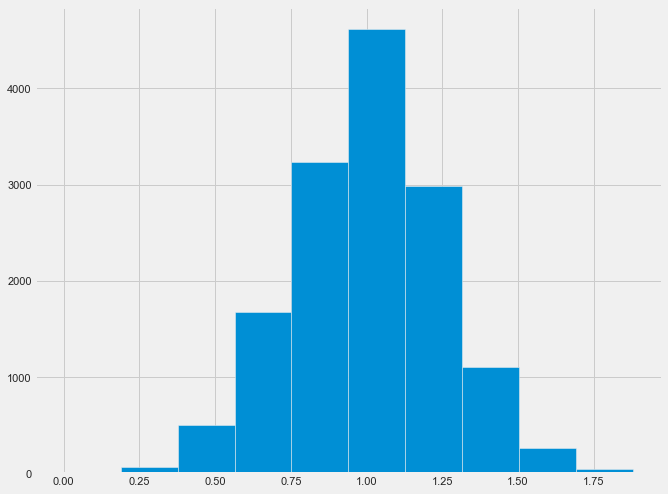

In [649]:
df_11chars['balance_adjustment'].hist()

In [650]:
tri = df_11chars

In [651]:
tri_excel = tri.to_excel('tri.xlsx')

In [652]:
tri.describe()

,origin_terminal,destination_terminal,direct_miles,trailer_route_miles,standard_service_days,balance_adjustment
count,14507.000000,14507.000000,14507.000000,14489.000000,14507.000000,14507.000000
mean,117.739919,118.294065,707.475357,768.866036,2.068794,1.000178
std,81.442164,82.738632,544.718001,551.663918,1.177579,0.244447
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,53.000000,369.000000,425.000000,1.000000,0.840000
50%,104.000000,104.000000,578.000000,630.000000,2.000000,1.000000
75%,166.000000,170.000000,820.000000,868.000000,2.000000,1.160000
max,391.000000,391.000000,3034.000000,3129.000000,9.000000,1.880000


## Search for Values

In [653]:
tri_values=tri[(tri['balance_adjustment']<=.5) | (tri['balance_adjustment']>=1.75)]

# New Dataframe Tri_values specific balance adjustments less than or equal to .5 and greater than or equal to 1.75

<AxesSubplot:>

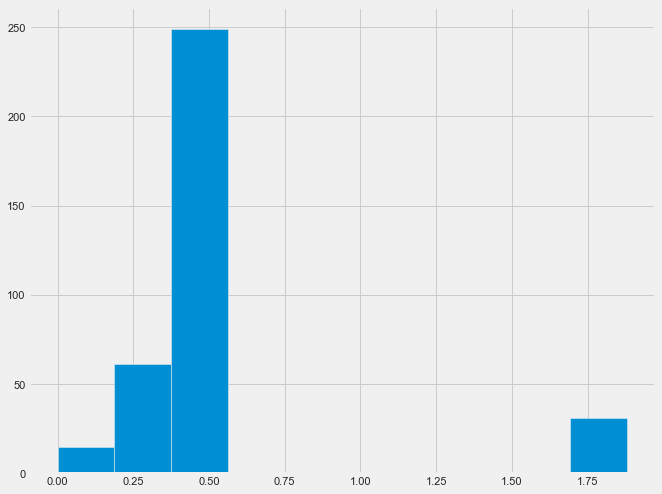

In [654]:
tri_values['balance_adjustment'].hist()

# Import Results

In [655]:
results = pd.read_csv('results.csv')

In [656]:
results

,Origin,Via,Destination,Direct_Miles,Alt_Leg1,Alt_Leg2,Alt_Miles,BAdj,BAdj_Leg1,BAdj_Leg2,alt_dir_ratio,Alt_BAdj
0,1,4,5,145,69,91,160,0.66,1.73,0.62,1.103448,1.098688
1,1,8,5,145,100,105,205,0.66,1.42,0.74,1.413793,1.071707
2,1,8,7,166,100,94,194,0.50,1.42,0.75,1.168675,1.095361
3,1,103,7,166,112,127,239,0.50,0.50,1.32,1.439759,0.935732
4,1,3,10,287,101,324,425,0.51,1.30,0.55,1.480836,0.728235
...,...,...,...,...,...,...,...,...,...,...,...,...
512958,389,194,335,478,138,443,581,0.69,0.97,1.00,1.215481,0.992874
512959,389,195,335,478,274,410,684,0.69,1.35,1.00,1.430962,1.140205
512960,391,291,266,36,41,2,43,0.25,0.77,1.00,1.194444,0.780698
512961,391,295,266,36,9,41,50,0.25,1.22,1.00,1.388889,1.039600


# Generate a list of Terminals

In [657]:
arr1=tri_values['origin_terminal'].unique()

In [658]:
arr2=tri_values['destination_terminal'].unique()

In [659]:
arr3 = np.concatenate((arr1, arr2))

In [660]:
arr4 = np.unique(arr3)

In [661]:
term_list = arr4.tolist()

In [665]:
term_list

[1,
 3,
 4,
 5,
 8,
 10,
 12,
 13,
 14,
 16,
 17,
 18,
 19,
 21,
 23,
 25,
 26,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 51,
 52,
 54,
 55,
 58,
 59,
 60,
 61,
 62,
 63,
 65,
 69,
 70,
 71,
 73,
 75,
 78,
 80,
 85,
 86,
 88,
 89,
 92,
 93,
 95,
 96,
 97,
 101,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 111,
 116,
 117,
 118,
 119,
 121,
 122,
 123,
 125,
 127,
 128,
 129,
 130,
 131,
 133,
 134,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 147,
 148,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 162,
 164,
 165,
 167,
 169,
 170,
 171,
 173,
 174,
 175,
 177,
 179,
 180,
 181,
 182,
 183,
 184,
 186,
 187,
 188,
 190,
 191,
 193,
 196,
 197,
 201,
 202,
 209,
 210,
 212,
 214,
 215,
 217,
 218,
 219,
 220,
 222,
 223,
 224,
 227,
 228,
 229,
 232,
 233,
 234,
 235,
 237,
 238,
 243,
 245,
 246,
 247,
 248,
 251,
 252,
 254,
 255,
 256,
 257,
 258,
 260,
 261,
 264,
 266,
 267,
 268,
 269,
 291,
 292,
 295,
 296,
 

### Select Terminals on terminal List

In [666]:
sel_terms = ter_df[ter_df['terminal_#'].isin(term_list)]

In [667]:
sel_terms

,terminal_#,terminal_alpha,terminal_name,address,city,state,zip,region,hub,break,canadian_gateway,lat,long
0,1,RIC,Richmond,1200 Commerce Road,Richmond,VA,23224,SE,Yes,NaN,NaN,37.513080,-77.431309
1,3,NFK,Norfolk,129 Robert Hall Court,Chesapeake,VA,23324,SE,NaN,NaN,NaN,36.784348,-76.261702
2,4,STF,Stafford,20 Venture Drive,Stafford,VA,22554,NE,NaN,NaN,NaN,38.413625,-77.419563
3,5,WIN,Winchester,906 Baker Lane,Winchester,VA,22603,NE,NaN,NaN,NaN,39.192774,-78.141394
6,8,WAY,Waynesboro,2090 South Delphine Avenue,Lyndhurst,VA,22952,SE,NaN,NaN,NaN,38.033229,-78.921913
...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,352,CAL,Calgary (AGT PCX),"5545 52nd Ave SE Calgary , AB T2C 3X4",Calgary,AB,T2C3X4,CN,NaN,NaN,NaN,51.007371,-113.952968
274,354,WNP,Winnipeg (AGT PCX),"68 Bergen Cutoff Road Rosser, MB R0H1E0",Winnipeg,MB,R0H1E0,CN,NaN,NaN,NaN,49.939528,-97.246686
285,380,FRA,Franklin,20 Forge Parkway,Franklin,MA,2038,L2L,NaN,NaN,NaN,42.082026,-71.439346
286,389,2DL,Dallas 2,11410 Mathis Ave Ste 102,Dallas,TX,75212,L2L,NaN,NaN,NaN,32.781171,-96.885524


### Create a dict and map values from sel_terms and tri_values and append 3 unique Lat and Longs

In [668]:
#lat orign mapping
mapping_dict = dict(zip(sel_terms['terminal_#'], sel_terms['lat']))
tri_values['ori_lat'] = tri_values['origin_terminal'].map(mapping_dict)

C:\Users\Adrian\AppData\Local\Temp\ipykernel_50572\1566498825.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tri_values['ori_lat'] = tri_values['origin_terminal'].map(mapping_dict)


In [669]:
tri_values.head()

,origin_terminal,destination_terminal,load_plan,trailer_route,direct_miles,trailer_route_miles,standard_service_days,balance_adjustment,ori_lat
90,1,101,001-010-101,001-010-101,553,556.0,2,0.48,37.513080
323,3,26,003-001-026,003-001-026,318,390.0,1,0.43,36.784348
389,3,101,003-010-101,003-010-101,578,593.0,2,0.50,36.784348
611,4,16,004-001-016,004-001-016,209,211.0,1,0.39,38.413625
613,4,18,004-014-018,004-014-018,349,369.0,1,0.49,38.413625


In [679]:
#long orign mapping
mapping_dict = dict(zip(sel_terms['terminal_#'], sel_terms['long']))
tri_values['ori_long'] = tri_values['origin_terminal'].map(mapping_dict)

In [680]:
#lat dest mapping
mapping_dict = dict(zip(sel_terms['terminal_#'], sel_terms['lat']))
tri_values['dest_lat'] = tri_values['destination_terminal'].map(mapping_dict)

In [681]:
#long dest mapping
mapping_dict = dict(zip(sel_terms['terminal_#'], sel_terms['long']))
tri_values['dest_long'] = tri_values['destination_terminal'].map(mapping_dict)

In [682]:
lane_df['load_plan'][8][4:7]

'010'

In [683]:
tri_values['midpoint'] = tri_values['load_plan'].str[4:7]

In [684]:
tri_values['midpoint']= tri_values['midpoint'].astype(int)

In [685]:
#midpoint mapping lat
mapping_dict = dict(zip(sel_terms['terminal_#'], sel_terms['lat']))
tri_values['mid_lat'] = tri_values['midpoint'].map(mapping_dict)

In [686]:
#midpoint mapping long
mapping_dict = dict(zip(sel_terms['terminal_#'], sel_terms['long']))
tri_values['mid_long'] = tri_values['midpoint'].map(mapping_dict)

In [687]:
tri_values.describe()

,origin_terminal,midpoint,destination_terminal,direct_miles,trailer_route_miles,standard_service_days,balance_adjustment,ori_lat,ori_long,dest_lat,dest_long,mid_lat,mid_long
count,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,349.000000,349.000000,344.000000,344.000000,261.000000,261.000000
mean,149.747191,134.839888,153.851124,409.485955,479.258427,1.884831,0.534045,38.191392,-90.745476,38.106554,-88.933256,39.097913,-89.934693
std,98.076878,79.690915,96.864696,264.868816,275.494895,1.347170,0.404673,7.459060,19.052896,9.057658,23.209338,5.281100,14.210545
min,1.000000,1.000000,1.000000,0.000000,12.000000,0.000000,0.000000,0.000000,-122.894609,0.000000,-151.241806,28.004772,-122.523952
25%,58.000000,55.000000,84.000000,225.000000,295.750000,1.000000,0.390000,34.098255,-104.806061,34.225994,-97.555093,34.000914,-96.885524
50%,150.500000,140.000000,147.000000,356.000000,424.000000,2.000000,0.460000,39.535638,-88.617457,39.752027,-87.694896,39.756542,-86.529882
75%,227.000000,202.000000,227.250000,550.500000,632.750000,2.000000,0.490000,42.741605,-78.921913,42.082026,-80.011648,42.167023,-80.418958
max,391.000000,297.000000,391.000000,1439.000000,2614.000000,9.000000,1.880000,51.007371,0.000000,64.837776,0.000000,47.888958,-70.186891


In [688]:
tri_values

,origin_terminal,midpoint,destination_terminal,load_plan,trailer_route,direct_miles,trailer_route_miles,standard_service_days,balance_adjustment,ori_lat,ori_long,dest_lat,dest_long,mid_lat,mid_long
90,1,10,101,001-010-101,001-010-101,553,556.0,2,0.48,37.513080,-77.431309,33.715378,-84.596307,35.348271,-80.836929
323,3,1,26,003-001-026,003-001-026,318,390.0,1,0.43,36.784348,-76.261702,40.496453,-75.802014,37.513080,-77.431309
389,3,10,101,003-010-101,003-010-101,578,593.0,2,0.50,36.784348,-76.261702,33.715378,-84.596307,35.348271,-80.836929
611,4,1,16,004-001-016,004-001-016,209,211.0,1,0.39,38.413625,-77.419563,35.700033,-77.915925,37.513080,-77.431309
613,4,14,18,004-014-018,004-014-018,349,369.0,1,0.49,38.413625,-77.419563,35.705158,-81.187849,36.970672,-80.848271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85598,380,179,51,380-179-051,380-179-051,283,300.0,1,0.47,42.082026,-71.439346,41.414350,-75.703846,42.167023,-72.540729
85632,380,179,88,380-179-088,380-179-088,100,118.0,1,0.38,42.082026,-71.439346,41.584863,-72.720828,42.167023,-72.540729
85975,389,89,147,389-089-147,389-089-147,0,18.0,1,0.33,32.781171,-96.885524,0.000000,0.000000,32.781171,-96.885524
85979,389,89,154,389-089-154,389-089-154,0,12.0,0,0.35,32.781171,-96.885524,32.797216,-96.923897,32.781171,-96.885524


In [689]:
print ("Rows     : " ,tri_values.shape[0])
print ("Columns  : " ,tri_values.shape[1])
print ("\nFeatures : \n" ,tri_values.columns.tolist())
print ("\nMissing values :  ", tri_values.isnull().sum().values.sum())
print ("\nUnique values :  \n",tri_values.nunique())

print("\nFirst 5 Rows :  \n",tri_values.head())

print("\nLast 5 Rows :  \n",tri_values.tail())
print("\nDuplicated  : ",tri_values.duplicated())

Rows     :  356
Columns  :  15

Features : 
 ['origin_terminal', 'midpoint', 'destination_terminal', 'load_plan', 'trailer_route', 'direct_miles', 'trailer_route_miles', 'standard_service_days', 'balance_adjustment', 'ori_lat', 'ori_long', 'dest_lat', 'dest_long', 'mid_lat', 'mid_long']

Missing values :   228

Unique values :  
 origin_terminal          123
midpoint                  60
destination_terminal     130
load_plan                356
trailer_route            356
direct_miles             262
trailer_route_miles      269
standard_service_days      8
balance_adjustment        46
ori_lat                  115
ori_long                 115
dest_lat                 120
dest_long                120
mid_lat                   43
mid_long                  43
dtype: int64

First 5 Rows :  
      origin_terminal  midpoint  destination_terminal    load_plan  \
90                 1        10                   101  001-010-101   
323                3         1                    26  003-001-0

In [690]:
tri_values=tri_values.dropna()

# Split Dataframes

In [692]:
tri_values = tri_values.reindex(columns = ['origin_terminal', 'midpoint','destination_terminal', 'load_plan', 'trailer_route', 'direct_miles', 'trailer_route_miles', 'standard_service_days', 'balance_adjustment', 'ori_lat', 'ori_long', 'dest_lat', 'dest_long', 'mid_lat', 'mid_long'])

In [693]:
origin = tri_values[['origin_terminal', 'ori_lat', 'ori_long', 'load_plan', 'trailer_route', 'direct_miles', 'trailer_route_miles', 'standard_service_days', 'balance_adjustment']]

In [694]:
midpoint = tri_values[['midpoint','mid_lat', 'mid_long', 'load_plan', 'trailer_route', 'direct_miles', 'trailer_route_miles', 'standard_service_days', 'balance_adjustment']]

In [695]:
dest = tri_values[['destination_terminal', 'dest_lat', 'dest_long','load_plan', 'trailer_route', 'direct_miles', 'trailer_route_miles', 'standard_service_days', 'balance_adjustment']]

In [696]:
origin

,origin_terminal,ori_lat,ori_long,load_plan,trailer_route,direct_miles,trailer_route_miles,standard_service_days,balance_adjustment
90,1,37.513080,-77.431309,001-010-101,001-010-101,553,556.0,2,0.48
323,3,36.784348,-76.261702,003-001-026,003-001-026,318,390.0,1,0.43
389,3,36.784348,-76.261702,003-010-101,003-010-101,578,593.0,2,0.50
611,4,38.413625,-77.419563,004-001-016,004-001-016,209,211.0,1,0.39
613,4,38.413625,-77.419563,004-014-018,004-014-018,349,369.0,1,0.49
...,...,...,...,...,...,...,...,...,...
82574,354,49.939528,-97.246686,354-140-173,354-140-173,899,444.0,3,1.87
85598,380,42.082026,-71.439346,380-179-051,380-179-051,283,300.0,1,0.47
85632,380,42.082026,-71.439346,380-179-088,380-179-088,100,118.0,1,0.38
85975,389,32.781171,-96.885524,389-089-147,389-089-147,0,18.0,1,0.33


In [697]:
dest

,destination_terminal,dest_lat,dest_long,load_plan,trailer_route,direct_miles,trailer_route_miles,standard_service_days,balance_adjustment
90,101,33.715378,-84.596307,001-010-101,001-010-101,553,556.0,2,0.48
323,26,40.496453,-75.802014,003-001-026,003-001-026,318,390.0,1,0.43
389,101,33.715378,-84.596307,003-010-101,003-010-101,578,593.0,2,0.50
611,16,35.700033,-77.915925,004-001-016,004-001-016,209,211.0,1,0.39
613,18,35.705158,-81.187849,004-014-018,004-014-018,349,369.0,1,0.49
...,...,...,...,...,...,...,...,...,...
82574,173,46.808079,-100.715504,354-140-173,354-140-173,899,444.0,3,1.87
85598,51,41.414350,-75.703846,380-179-051,380-179-051,283,300.0,1,0.47
85632,88,41.584863,-72.720828,380-179-088,380-179-088,100,118.0,1,0.38
85975,147,0.000000,0.000000,389-089-147,389-089-147,0,18.0,1,0.33


In [698]:
midpoint

,midpoint,mid_lat,mid_long,load_plan,trailer_route,direct_miles,trailer_route_miles,standard_service_days,balance_adjustment
90,10,35.348271,-80.836929,001-010-101,001-010-101,553,556.0,2,0.48
323,1,37.513080,-77.431309,003-001-026,003-001-026,318,390.0,1,0.43
389,10,35.348271,-80.836929,003-010-101,003-010-101,578,593.0,2,0.50
611,1,37.513080,-77.431309,004-001-016,004-001-016,209,211.0,1,0.39
613,14,36.970672,-80.848271,004-014-018,004-014-018,349,369.0,1,0.49
...,...,...,...,...,...,...,...,...,...
82574,140,46.891208,-96.848625,354-140-173,354-140-173,899,444.0,3,1.87
85598,179,42.167023,-72.540729,380-179-051,380-179-051,283,300.0,1,0.47
85632,179,42.167023,-72.540729,380-179-088,380-179-088,100,118.0,1,0.38
85975,89,32.781171,-96.885524,389-089-147,389-089-147,0,18.0,1,0.33


# Reorganize Dataframe to one Dataframe for visualization in Tableau

In [699]:
lst = list(range(1, 766))  # generate list from 1 to 755
new_lst1 = lst[::3]  # skip every 2nd and 3rd element (step of 4)
print(new_lst1)

[1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58, 61, 64, 67, 70, 73, 76, 79, 82, 85, 88, 91, 94, 97, 100, 103, 106, 109, 112, 115, 118, 121, 124, 127, 130, 133, 136, 139, 142, 145, 148, 151, 154, 157, 160, 163, 166, 169, 172, 175, 178, 181, 184, 187, 190, 193, 196, 199, 202, 205, 208, 211, 214, 217, 220, 223, 226, 229, 232, 235, 238, 241, 244, 247, 250, 253, 256, 259, 262, 265, 268, 271, 274, 277, 280, 283, 286, 289, 292, 295, 298, 301, 304, 307, 310, 313, 316, 319, 322, 325, 328, 331, 334, 337, 340, 343, 346, 349, 352, 355, 358, 361, 364, 367, 370, 373, 376, 379, 382, 385, 388, 391, 394, 397, 400, 403, 406, 409, 412, 415, 418, 421, 424, 427, 430, 433, 436, 439, 442, 445, 448, 451, 454, 457, 460, 463, 466, 469, 472, 475, 478, 481, 484, 487, 490, 493, 496, 499, 502, 505, 508, 511, 514, 517, 520, 523, 526, 529, 532, 535, 538, 541, 544, 547, 550, 553, 556, 559, 562, 565, 568, 571, 574, 577, 580, 583, 586, 589, 592, 595, 598, 601, 604, 607, 610, 613, 616, 619, 

In [700]:
lst = list(range(1, 766))
new_lst3 = lst[2::3]
print(new_lst3)

[3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99, 102, 105, 108, 111, 114, 117, 120, 123, 126, 129, 132, 135, 138, 141, 144, 147, 150, 153, 156, 159, 162, 165, 168, 171, 174, 177, 180, 183, 186, 189, 192, 195, 198, 201, 204, 207, 210, 213, 216, 219, 222, 225, 228, 231, 234, 237, 240, 243, 246, 249, 252, 255, 258, 261, 264, 267, 270, 273, 276, 279, 282, 285, 288, 291, 294, 297, 300, 303, 306, 309, 312, 315, 318, 321, 324, 327, 330, 333, 336, 339, 342, 345, 348, 351, 354, 357, 360, 363, 366, 369, 372, 375, 378, 381, 384, 387, 390, 393, 396, 399, 402, 405, 408, 411, 414, 417, 420, 423, 426, 429, 432, 435, 438, 441, 444, 447, 450, 453, 456, 459, 462, 465, 468, 471, 474, 477, 480, 483, 486, 489, 492, 495, 498, 501, 504, 507, 510, 513, 516, 519, 522, 525, 528, 531, 534, 537, 540, 543, 546, 549, 552, 555, 558, 561, 564, 567, 570, 573, 576, 579, 582, 585, 588, 591, 594, 597, 600, 603, 606, 609, 612, 615, 618, 621, 

In [701]:
lst = list(range(1, 766))
new_lst2 = lst[1::3]
print(new_lst2)

[2, 5, 8, 11, 14, 17, 20, 23, 26, 29, 32, 35, 38, 41, 44, 47, 50, 53, 56, 59, 62, 65, 68, 71, 74, 77, 80, 83, 86, 89, 92, 95, 98, 101, 104, 107, 110, 113, 116, 119, 122, 125, 128, 131, 134, 137, 140, 143, 146, 149, 152, 155, 158, 161, 164, 167, 170, 173, 176, 179, 182, 185, 188, 191, 194, 197, 200, 203, 206, 209, 212, 215, 218, 221, 224, 227, 230, 233, 236, 239, 242, 245, 248, 251, 254, 257, 260, 263, 266, 269, 272, 275, 278, 281, 284, 287, 290, 293, 296, 299, 302, 305, 308, 311, 314, 317, 320, 323, 326, 329, 332, 335, 338, 341, 344, 347, 350, 353, 356, 359, 362, 365, 368, 371, 374, 377, 380, 383, 386, 389, 392, 395, 398, 401, 404, 407, 410, 413, 416, 419, 422, 425, 428, 431, 434, 437, 440, 443, 446, 449, 452, 455, 458, 461, 464, 467, 470, 473, 476, 479, 482, 485, 488, 491, 494, 497, 500, 503, 506, 509, 512, 515, 518, 521, 524, 527, 530, 533, 536, 539, 542, 545, 548, 551, 554, 557, 560, 563, 566, 569, 572, 575, 578, 581, 584, 587, 590, 593, 596, 599, 602, 605, 608, 611, 614, 617, 620, 

In [702]:
#dummy check value should be equal 255 as there is 765 row total in Origin Midpoint and Dest Dataframes
print(len(new_lst1))
print(len(new_lst2))
print(len(new_lst3))

255
255
255


# create new columns

In [703]:
origin['id'] = new_lst1

C:\Users\Adrian\AppData\Local\Temp\ipykernel_50572\475028064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  origin['id'] = new_lst1


In [704]:
dest['id'] = new_lst3

C:\Users\Adrian\AppData\Local\Temp\ipykernel_50572\1179742152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dest['id'] = new_lst3


In [705]:
midpoint['id']=new_lst2

C:\Users\Adrian\AppData\Local\Temp\ipykernel_50572\2924995297.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  midpoint['id']=new_lst2


In [706]:
dest_sorted = dest.sort_values(by='id')

In [707]:
dest = dest.rename(columns = {'dest_lat': 'lat', 'dest_long':'long', 'destination_terminal':'terminal'})
origin = origin.rename(columns = {'ori_lat': 'lat', 'ori_long':'long', 'origin_terminal':'terminal'})
midpoint = midpoint.rename(columns = {'mid_lat': 'lat', 'mid_long':'long', 'midpoint':'terminal'})

In [708]:
dest

,terminal,lat,long,load_plan,trailer_route,direct_miles,trailer_route_miles,standard_service_days,balance_adjustment,id
90,101,33.715378,-84.596307,001-010-101,001-010-101,553,556.0,2,0.48,3
323,26,40.496453,-75.802014,003-001-026,003-001-026,318,390.0,1,0.43,6
389,101,33.715378,-84.596307,003-010-101,003-010-101,578,593.0,2,0.50,9
611,16,35.700033,-77.915925,004-001-016,004-001-016,209,211.0,1,0.39,12
613,18,35.705158,-81.187849,004-014-018,004-014-018,349,369.0,1,0.49,15
...,...,...,...,...,...,...,...,...,...,...
82574,173,46.808079,-100.715504,354-140-173,354-140-173,899,444.0,3,1.87,753
85598,51,41.414350,-75.703846,380-179-051,380-179-051,283,300.0,1,0.47,756
85632,88,41.584863,-72.720828,380-179-088,380-179-088,100,118.0,1,0.38,759
85975,147,0.000000,0.000000,389-089-147,389-089-147,0,18.0,1,0.33,762


In [709]:
origin

,terminal,lat,long,load_plan,trailer_route,direct_miles,trailer_route_miles,standard_service_days,balance_adjustment,id
90,1,37.513080,-77.431309,001-010-101,001-010-101,553,556.0,2,0.48,1
323,3,36.784348,-76.261702,003-001-026,003-001-026,318,390.0,1,0.43,4
389,3,36.784348,-76.261702,003-010-101,003-010-101,578,593.0,2,0.50,7
611,4,38.413625,-77.419563,004-001-016,004-001-016,209,211.0,1,0.39,10
613,4,38.413625,-77.419563,004-014-018,004-014-018,349,369.0,1,0.49,13
...,...,...,...,...,...,...,...,...,...,...
82574,354,49.939528,-97.246686,354-140-173,354-140-173,899,444.0,3,1.87,751
85598,380,42.082026,-71.439346,380-179-051,380-179-051,283,300.0,1,0.47,754
85632,380,42.082026,-71.439346,380-179-088,380-179-088,100,118.0,1,0.38,757
85975,389,32.781171,-96.885524,389-089-147,389-089-147,0,18.0,1,0.33,760


In [710]:
midpoint

,terminal,lat,long,load_plan,trailer_route,direct_miles,trailer_route_miles,standard_service_days,balance_adjustment,id
90,10,35.348271,-80.836929,001-010-101,001-010-101,553,556.0,2,0.48,2
323,1,37.513080,-77.431309,003-001-026,003-001-026,318,390.0,1,0.43,5
389,10,35.348271,-80.836929,003-010-101,003-010-101,578,593.0,2,0.50,8
611,1,37.513080,-77.431309,004-001-016,004-001-016,209,211.0,1,0.39,11
613,14,36.970672,-80.848271,004-014-018,004-014-018,349,369.0,1,0.49,14
...,...,...,...,...,...,...,...,...,...,...
82574,140,46.891208,-96.848625,354-140-173,354-140-173,899,444.0,3,1.87,752
85598,179,42.167023,-72.540729,380-179-051,380-179-051,283,300.0,1,0.47,755
85632,179,42.167023,-72.540729,380-179-088,380-179-088,100,118.0,1,0.38,758
85975,89,32.781171,-96.885524,389-089-147,389-089-147,0,18.0,1,0.33,761


In [715]:
frames = [origin, midpoint, dest]

In [716]:
paths = pd.concat(frames, ignore_index = True, sort = False)

In [717]:
#sort by Id check terminal values equal load plan
paths=paths.sort_values(by=['id']).reset_index(drop = True)

In [718]:
paths

,terminal,lat,long,load_plan,trailer_route,direct_miles,trailer_route_miles,standard_service_days,balance_adjustment,id
0,1,37.513080,-77.431309,001-010-101,001-010-101,553,556.0,2,0.48,1
1,10,35.348271,-80.836929,001-010-101,001-010-101,553,556.0,2,0.48,2
2,101,33.715378,-84.596307,001-010-101,001-010-101,553,556.0,2,0.48,3
3,3,36.784348,-76.261702,003-001-026,003-001-026,318,390.0,1,0.43,4
4,1,37.513080,-77.431309,003-001-026,003-001-026,318,390.0,1,0.43,5
...,...,...,...,...,...,...,...,...,...,...
760,89,32.781171,-96.885524,389-089-147,389-089-147,0,18.0,1,0.33,761
761,147,0.000000,0.000000,389-089-147,389-089-147,0,18.0,1,0.33,762
762,389,32.781171,-96.885524,389-089-154,389-089-154,0,12.0,0,0.35,763
763,89,32.781171,-96.885524,389-089-154,389-089-154,0,12.0,0,0.35,764


## New Column Path

In [719]:
lst = [1, 2, 3] * 255


In [720]:
print(lst)

[1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 

In [721]:
paths['path']=lst

In [722]:
paths2 = paths[paths.duplicated(subset=['terminal','lat', 'long'])]

In [723]:
paths

,terminal,lat,long,load_plan,trailer_route,direct_miles,trailer_route_miles,standard_service_days,balance_adjustment,id,path
0,1,37.513080,-77.431309,001-010-101,001-010-101,553,556.0,2,0.48,1,1
1,10,35.348271,-80.836929,001-010-101,001-010-101,553,556.0,2,0.48,2,2
2,101,33.715378,-84.596307,001-010-101,001-010-101,553,556.0,2,0.48,3,3
3,3,36.784348,-76.261702,003-001-026,003-001-026,318,390.0,1,0.43,4,1
4,1,37.513080,-77.431309,003-001-026,003-001-026,318,390.0,1,0.43,5,2
...,...,...,...,...,...,...,...,...,...,...,...
760,89,32.781171,-96.885524,389-089-147,389-089-147,0,18.0,1,0.33,761,2
761,147,0.000000,0.000000,389-089-147,389-089-147,0,18.0,1,0.33,762,3
762,389,32.781171,-96.885524,389-089-154,389-089-154,0,12.0,0,0.35,763,1
763,89,32.781171,-96.885524,389-089-154,389-089-154,0,12.0,0,0.35,764,2


In [724]:
paths2

,terminal,lat,long,load_plan,trailer_route,direct_miles,trailer_route_miles,standard_service_days,balance_adjustment,id,path
4,1,37.513080,-77.431309,003-001-026,003-001-026,318,390.0,1,0.43,5,2
6,3,36.784348,-76.261702,003-010-101,003-010-101,578,593.0,2,0.50,7,1
7,10,35.348271,-80.836929,003-010-101,003-010-101,578,593.0,2,0.50,8,2
8,101,33.715378,-84.596307,003-010-101,003-010-101,578,593.0,2,0.50,9,3
10,1,37.513080,-77.431309,004-001-016,004-001-016,209,211.0,1,0.39,11,2
...,...,...,...,...,...,...,...,...,...,...,...
760,89,32.781171,-96.885524,389-089-147,389-089-147,0,18.0,1,0.33,761,2
761,147,0.000000,0.000000,389-089-147,389-089-147,0,18.0,1,0.33,762,3
762,389,32.781171,-96.885524,389-089-154,389-089-154,0,12.0,0,0.35,763,1
763,89,32.781171,-96.885524,389-089-154,389-089-154,0,12.0,0,0.35,764,2


## Final Column Path ID

In [ ]:
lists = []
for i in range(255):
    i=i+1
    lists.append([i, i, i])

In [ ]:
flat_list = []
for sublist in lists:
    for item in sublist:
        flat_list.append(item)

In [ ]:
len(flat_list)

In [ ]:
paths['path_id'] = flat_list

In [ ]:
paths

#### Data Cleaning find lat's with zero and drop 

In [ ]:
paths[(paths['lat'] == 0)]

In [ ]:
paths = paths.drop([275,408,500,509,518,530,761])

#### Excel file used in Tableau

In [ ]:
paths.to_excel("paths.xlsx")

In [ ]:
paths

# Plotting on Geopandas

In [ ]:
import geopandas as gpd
import folium

In [ ]:
gdf = gpd.GeoDataFrame(paths, geometry=gpd.points_from_xy(paths.long, paths.lat))

In [ ]:
gdf

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'North America'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()

In [ ]:
# Create a geometry list from the GeoDataFrame
geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in gdf.geometry]



In [ ]:
gdf

In [ ]:
# Iterate through list and add a marker for each volcano, color-coded by its type.
i = 0
for coordinates in geo_df_list:
    # Place the markers with the popup labels and data
    map.add_child(
        folium.Marker(
            location=coordinates
        )
        
    )

## To generate Map type Map and run

In [ ]:
import gurobipy as gp
from gurobipy import GRB

In [ ]:
paths

In [ ]:
dist =  paths['direct_miles']
bal = paths['balance_adjustment']
empty = paths[paths['balance_adjustment']<1]
full = paths[paths['balance_adjustment']>1]
descions = paths['load_plan']


In [ ]:
# Create the Gurobi model object
m = gp.Model()

# Define the decision variables
x = m.addVars(full, empty, vtype=gp.GRB.INTEGER, name='x')

# Define the objective function
m.setObjective(gp.quicksum(bal[i][j]*x[i,j] for i in range(3) for j in range(4)), gp.GRB.MINIMIZE)


# Solve the optimization problem
m.optimize()

# Print the solution
print('Optimal solution:')
for i in range(3):
    for j in range(4):
        if x[i,j].x > 0:
            print(f'x[{i},{j}] = {x[i,j].x}')
print(f'Optimal objective value: {m.objVal}')

In [ ]:
full = headhaul["balance_adjustment"]
empty = backhaul['balance_adjustment']

In [ ]:
empty

In [ ]:
full

# Linear Regression

In [419]:
b_l_model = b_l_lanes

In [420]:
b_l_model

,from,to,balance_adjustment,pd_9_avg_bal,pd_9_miles,pd_10_avg_bal,pd_10_miles,pd_11_avg_bal,pd_11_miles,pd_12_avg_bal,...,activity_date_out,terminal_id,manifest_number,ibt_id,weight_this_leg,power_unit_number,trailer_number,loads,trip_number,ttl_cube
0,1,3,1.30,1.543,101,1.581,101,1.618,101,1.657,...,20220908.0,26.0,4428.0,3.0,17497.0,78690,512275,1.0,6397404.0,1055.07
1,1,3,1.30,1.543,101,1.581,101,1.618,101,1.657,...,20220908.0,24.0,55311.0,3.0,12568.0,68377,286103,0.5,6401067.0,1242.13
2,1,3,1.30,1.543,101,1.581,101,1.618,101,1.657,...,20220830.0,1.0,84641.0,3.0,8308.0,76715,292400,0.5,6274973.0,800.75
3,1,3,1.30,1.543,101,1.581,101,1.618,101,1.657,...,20220826.0,26.0,3529.0,3.0,11506.0,68448,527913,1.0,6234505.0,735.74
4,1,3,1.30,1.543,101,1.581,101,1.618,101,1.657,...,20220906.0,1.0,85762.0,3.0,6904.0,68448,284851,0.5,6374338.0,767.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252191,391,297,1.32,1.109,334,1.111,334,1.022,334,1.165,...,20220831.0,391.0,60795.0,295.0,11744.0,66513,298626,0.5,6302381.0,2047.37
252192,391,297,1.32,1.109,334,1.111,334,1.022,334,1.165,...,20220826.0,391.0,60609.0,295.0,9607.0,/78216,295922,0.5,6248952.0,1201.52
252193,391,297,1.32,1.109,334,1.111,334,1.022,334,1.165,...,20220831.0,391.0,60763.0,295.0,8661.0,66513,290519,0.5,6302381.0,1133.71
252194,391,297,1.32,1.109,334,1.111,334,1.022,334,1.165,...,20220823.0,391.0,60603.0,295.0,15326.0,67806,297210,0.5,6175467.0,1747.56


In [407]:
y = b_l_lanes[['balance_adjustment']]

In [408]:
x = b_l_lanes[['pd_9_avg_bal', 'pd_9_miles', 'pd_10_avg_bal', 'pd_10_miles', 'pd_11_avg_bal', 'pd_11_miles', 'pd_12_avg_bal', 'pd_12_miles', 'pd_13_avg_bal', 'pd_13_miles', 'weight_this_leg', 'loads', 'ttl_cube']]

In [460]:
feature_cols = ['pd_9_avg_bal', 'pd_9_miles', 'pd_10_avg_bal', 'pd_10_miles', 'pd_11_avg_bal', 'pd_11_miles', 'pd_12_avg_bal', 'pd_12_miles', 'pd_13_avg_bal', 'pd_13_miles', 'weight_this_leg', 'loads', 'ttl_cube']

In [400]:
def train_test_rmse(df, feature_cols, response):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [405]:
x

,balance_adjustment
0,1.30
1,1.30
2,1.30
3,1.30
4,1.30
...,...
252191,1.32
252192,1.32
252193,1.32
252194,1.32


In [406]:
y

,pd_9_avg_bal,pd_9_miles,pd_10_avg_bal,pd_10_miles,pd_11_avg_bal,pd_11_miles,pd_12_avg_bal,pd_12_miles,pd_13_avg_bal,pd_13_miles,weight_this_leg,loads,ttl_cube
0,1.543,101,1.581,101,1.618,101,1.657,101,1.658,101,17497.0,1.0,1055.07
1,1.543,101,1.581,101,1.618,101,1.657,101,1.658,101,12568.0,0.5,1242.13
2,1.543,101,1.581,101,1.618,101,1.657,101,1.658,101,8308.0,0.5,800.75
3,1.543,101,1.581,101,1.618,101,1.657,101,1.658,101,11506.0,1.0,735.74
4,1.543,101,1.581,101,1.618,101,1.657,101,1.658,101,6904.0,0.5,767.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...
252191,1.109,334,1.111,334,1.022,334,1.165,334,1.150,334,11744.0,0.5,2047.37
252192,1.109,334,1.111,334,1.022,334,1.165,334,1.150,334,9607.0,0.5,1201.52
252193,1.109,334,1.111,334,1.022,334,1.165,334,1.150,334,8661.0,0.5,1133.71
252194,1.109,334,1.111,334,1.022,334,1.165,334,1.150,334,15326.0,0.5,1747.56


In [409]:
X2 = sm.add_constant(x)  #Adds our y intercept
est = sm.OLS(y, X2)  # adds our OLS model
est2 = est.fit() # fits our model
print(est2.summary()) #Tada!

                            OLS Regression Results                            
Dep. Variable:     balance_adjustment   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                 5.416e+04
Date:                Sun, 26 Mar 2023   Prob (F-statistic):               0.00
Time:                        23:06:49   Log-Likelihood:                 89126.
No. Observations:              252196   AIC:                        -1.782e+05
Df Residuals:                  252182   BIC:                        -1.781e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1926      0.002    1

# Desicion Trees

In [410]:
x

,pd_9_avg_bal,pd_9_miles,pd_10_avg_bal,pd_10_miles,pd_11_avg_bal,pd_11_miles,pd_12_avg_bal,pd_12_miles,pd_13_avg_bal,pd_13_miles,weight_this_leg,loads,ttl_cube
0,1.543,101,1.581,101,1.618,101,1.657,101,1.658,101,17497.0,1.0,1055.07
1,1.543,101,1.581,101,1.618,101,1.657,101,1.658,101,12568.0,0.5,1242.13
2,1.543,101,1.581,101,1.618,101,1.657,101,1.658,101,8308.0,0.5,800.75
3,1.543,101,1.581,101,1.618,101,1.657,101,1.658,101,11506.0,1.0,735.74
4,1.543,101,1.581,101,1.618,101,1.657,101,1.658,101,6904.0,0.5,767.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...
252191,1.109,334,1.111,334,1.022,334,1.165,334,1.150,334,11744.0,0.5,2047.37
252192,1.109,334,1.111,334,1.022,334,1.165,334,1.150,334,9607.0,0.5,1201.52
252193,1.109,334,1.111,334,1.022,334,1.165,334,1.150,334,8661.0,0.5,1133.71
252194,1.109,334,1.111,334,1.022,334,1.165,334,1.150,334,15326.0,0.5,1747.56


In [411]:
y

,balance_adjustment
0,1.30
1,1.30
2,1.30
3,1.30
4,1.30
...,...
252191,1.32
252192,1.32
252193,1.32
252194,1.32


In [471]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [421]:
b_l_model['prediction']=b_l_model.balance_adjustment.mean()

In [422]:
b_l_model

,from,to,balance_adjustment,pd_9_avg_bal,pd_9_miles,pd_10_avg_bal,pd_10_miles,pd_11_avg_bal,pd_11_miles,pd_12_avg_bal,...,terminal_id,manifest_number,ibt_id,weight_this_leg,power_unit_number,trailer_number,loads,trip_number,ttl_cube,prediction
0,1,3,1.30,1.543,101,1.581,101,1.618,101,1.657,...,26.0,4428.0,3.0,17497.0,78690,512275,1.0,6397404.0,1055.07,0.997862
1,1,3,1.30,1.543,101,1.581,101,1.618,101,1.657,...,24.0,55311.0,3.0,12568.0,68377,286103,0.5,6401067.0,1242.13,0.997862
2,1,3,1.30,1.543,101,1.581,101,1.618,101,1.657,...,1.0,84641.0,3.0,8308.0,76715,292400,0.5,6274973.0,800.75,0.997862
3,1,3,1.30,1.543,101,1.581,101,1.618,101,1.657,...,26.0,3529.0,3.0,11506.0,68448,527913,1.0,6234505.0,735.74,0.997862
4,1,3,1.30,1.543,101,1.581,101,1.618,101,1.657,...,1.0,85762.0,3.0,6904.0,68448,284851,0.5,6374338.0,767.99,0.997862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252191,391,297,1.32,1.109,334,1.111,334,1.022,334,1.165,...,391.0,60795.0,295.0,11744.0,66513,298626,0.5,6302381.0,2047.37,0.997862
252192,391,297,1.32,1.109,334,1.111,334,1.022,334,1.165,...,391.0,60609.0,295.0,9607.0,/78216,295922,0.5,6248952.0,1201.52,0.997862
252193,391,297,1.32,1.109,334,1.111,334,1.022,334,1.165,...,391.0,60763.0,295.0,8661.0,66513,290519,0.5,6302381.0,1133.71,0.997862
252194,391,297,1.32,1.109,334,1.111,334,1.022,334,1.165,...,391.0,60603.0,295.0,15326.0,67806,297210,0.5,6175467.0,1747.56,0.997862


In [487]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
treereg = DecisionTreeRegressor(max_depth=5, random_state=1)
treereg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=1)

In [488]:
y_pred = treereg.predict(X_test)

In [489]:
treereg.score(X_train,y_train)

0.7689452056878006

In [490]:
r2_score = r2_score(y_test, y_pred)
print("R-squared:", r2_score)

R-squared: 0.765623346805142


In [491]:
# Calculate RMSE for those predictions.
from sklearn import metrics
import numpy as np

np.sqrt(metrics.mean_squared_error(b_l_model.balance_adjustment, b_l_model.prediction))

1012.7638190319727

In [428]:
bal_range = np.arange(b_l_model.balance_adjustment.min(), b_l_model.balance_adjustment.max())


In [433]:
def bal_split(balance_adjustment):
    lower = b_l_model[b_l_model.balance_adjustment < balance_adjustment].ttl_cube.mean()
    higher = b_l_model[b_l_model.balance_adjustment >= balance_adjustment].ttl_cube.mean()
    b_l_model['prediction'] = np.where(b_l_model.balance_adjustment < b_l_lanes.ttl_cube, lower, higher)
    return np.sqrt(metrics.mean_squared_error(b_l_model.ttl_cube, b_l_model.prediction))

In [ ]:
## Decision Tree Regression

In [475]:
from sklearn.tree import DecisionTreeRegressor

# List of values to try for max_depth:
max_depth_range = range(1, 21)

# List to store the average RMSE for each value of max_depth:
RMSE_scores = []

# Use 10-fold cross-validation with each value of max_depth.
from sklearn.model_selection import cross_val_score
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

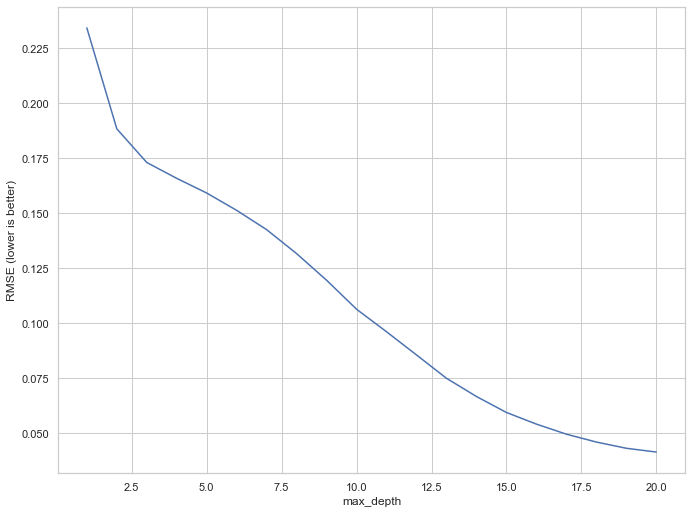

In [477]:
plt.plot(max_depth_range, RMSE_scores);
plt.xlabel('max_depth');
plt.ylabel('RMSE (lower is better)');

In [ ]:
# Show the best RMSE and the corresponding max_depth.
sorted(zip(RMSE_scores, max_depth_range))[0]

In [449]:
treereg = DecisionTreeRegressor(max_depth=4, random_state=1)
treereg.fit(x, y)


DecisionTreeRegressor(max_depth=4, random_state=1)

In [450]:
treereg.predict(x)

array([1.41019402, 1.41019402, 1.41019402, ..., 1.15628455, 1.15628455,
       1.15628455])

In [451]:
treereg.score(x,y)

0.7482490669655175

In [ ]:
from sklearn.model_selection import GridSearchCV
n=range(1,10)
params={'max_depth': n}
gs = GridSearchCV(DecisionTreeRegressor(),
                  param_grid=params,
                  cv=10)
gs.fit(x, y)
gs.best_params_

{'max_depth': 4}

In [461]:
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_}).sort_values(by='importance', ascending=False)

,feature,importance
6,pd_12_avg_bal,0.946351
8,pd_13_avg_bal,0.032195
2,pd_10_avg_bal,0.007675
0,pd_9_avg_bal,0.004470
1,pd_9_miles,0.003924
7,pd_12_miles,0.003386
4,pd_11_avg_bal,0.001997
3,pd_10_miles,0.000000
5,pd_11_miles,0.000000
9,pd_13_miles,0.000000


In [463]:
# Create a Graphviz file.
from sklearn.tree import export_graphviz
export_graphviz(treereg, out_file='./Images/tree_vehicles.dot', feature_names=feature_cols)

# At the command line, run this to convert to PNG:
#   dot -Tpng tree_vehicles.dot -o tree_vehicles.png

# Or, you can drag the image below to your desktop or Powerpoint!

In [464]:
pred = gs.predict(x)
pred

array([1.41019402, 1.41019402, 1.41019402, ..., 1.15628455, 1.15628455,
       1.15628455])

In [465]:
pred_best = gs.best_estimator_.predict(x)
pred_best

array([1.41019402, 1.41019402, 1.41019402, ..., 1.15628455, 1.15628455,
       1.15628455])

In [466]:
gs.score(x,y)

0.7482490669655173

In [467]:
x

,pd_9_avg_bal,pd_9_miles,pd_10_avg_bal,pd_10_miles,pd_11_avg_bal,pd_11_miles,pd_12_avg_bal,pd_12_miles,pd_13_avg_bal,pd_13_miles,weight_this_leg,loads,ttl_cube
0,1.543,101,1.581,101,1.618,101,1.657,101,1.658,101,17497.0,1.0,1055.07
1,1.543,101,1.581,101,1.618,101,1.657,101,1.658,101,12568.0,0.5,1242.13
2,1.543,101,1.581,101,1.618,101,1.657,101,1.658,101,8308.0,0.5,800.75
3,1.543,101,1.581,101,1.618,101,1.657,101,1.658,101,11506.0,1.0,735.74
4,1.543,101,1.581,101,1.618,101,1.657,101,1.658,101,6904.0,0.5,767.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...
252191,1.109,334,1.111,334,1.022,334,1.165,334,1.150,334,11744.0,0.5,2047.37
252192,1.109,334,1.111,334,1.022,334,1.165,334,1.150,334,9607.0,0.5,1201.52
252193,1.109,334,1.111,334,1.022,334,1.165,334,1.150,334,8661.0,0.5,1133.71
252194,1.109,334,1.111,334,1.022,334,1.165,334,1.150,334,15326.0,0.5,1747.56


In [492]:
from gurobipy import *

In [493]:
ter_df

,terminal_#,terminal_alpha,terminal_name,address,city,state,zip,region,hub,break,canadian_gateway,lat,long
0,1,RIC,Richmond,1200 Commerce Road,Richmond,VA,23224,SE,Yes,NaN,NaN,37.513080,-77.431309
1,3,NFK,Norfolk,129 Robert Hall Court,Chesapeake,VA,23324,SE,NaN,NaN,NaN,36.784348,-76.261702
2,4,STF,Stafford,20 Venture Drive,Stafford,VA,22554,NE,NaN,NaN,NaN,38.413625,-77.419563
3,5,WIN,Winchester,906 Baker Lane,Winchester,VA,22603,NE,NaN,NaN,NaN,39.192774,-78.141394
4,6,EDI,Edison,310 Hollywood Avenue,South Plainfield,NJ,7080,NE,NaN,NaN,NaN,40.563131,-74.412193
...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,363,RGN,Regina (AGT PCX),1990 Inland Drive Regina SK S0G 5K0,Regina,SK,S0G5K0,CN,NaN,NaN,NaN,50.513993,-104.608565
284,364,SKT,Saskatoon (AGT PCX),"2462 Dudley Street Saskatoon, Saskatchewan S7M5S9",Saskatoon,SK,S7M5S9,CN,NaN,NaN,NaN,52.111711,-106.712339
285,380,FRA,Franklin,20 Forge Parkway,Franklin,MA,2038,L2L,NaN,NaN,NaN,42.082026,-71.439346
286,389,2DL,Dallas 2,11410 Mathis Ave Ste 102,Dallas,TX,75212,L2L,NaN,NaN,NaN,32.781171,-96.885524


In [496]:
nodes = ter_df['terminal_#']
edges = [(i,j) for i in nodes for j in nodes]


In [499]:
lane_df[lane_df['load_plan'][7]]

KeyError: '001-011'

In [502]:
two = lane_df[(lane_df['load_plan'].str.len() == 7) & (lane_df['trailer_route'].str.len() == 7)]

In [504]:
two

,origin_terminal,destination_terminal,load_plan,trailer_route,direct_miles,trailer_route_miles,standard_service_days,balance_adjustment
0,1,3,001-003,001-003,101,101.0,1,1.30
1,1,4,001-004,001-004,69,69.0,1,1.73
2,1,5,001-005,001-005,145,145.0,1,0.66
3,1,6,001-006,001-006,325,325.0,1,0.78
4,1,7,001-007,001-007,166,166.0,1,0.50
...,...,...,...,...,...,...,...,...
85845,387,1,387-001,387-001,0,0.0,0,1.00
85846,387,13,387-013,387-013,0,0.0,0,1.00
85927,389,89,389-089,389-089,5,5.0,0,0.12
86016,389,193,389-193,389-193,30,30.0,0,0.12


In [506]:
two['combined'] = two.apply(lambda row: f"({row['origin_terminal']},{row['destination_terminal']})", axis=1)


C:\Users\Adrian\AppData\Local\Temp\ipykernel_50572\2086783567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  two['combined'] = two.apply(lambda row: f"({row['origin_terminal']},{row['destination_terminal']})", axis=1)


In [507]:
two

,origin_terminal,destination_terminal,load_plan,trailer_route,direct_miles,trailer_route_miles,standard_service_days,balance_adjustment,combined
0,1,3,001-003,001-003,101,101.0,1,1.30,"(1,3)"
1,1,4,001-004,001-004,69,69.0,1,1.73,"(1,4)"
2,1,5,001-005,001-005,145,145.0,1,0.66,"(1,5)"
3,1,6,001-006,001-006,325,325.0,1,0.78,"(1,6)"
4,1,7,001-007,001-007,166,166.0,1,0.50,"(1,7)"
...,...,...,...,...,...,...,...,...,...
85845,387,1,387-001,387-001,0,0.0,0,1.00,"(387,1)"
85846,387,13,387-013,387-013,0,0.0,0,1.00,"(387,13)"
85927,389,89,389-089,389-089,5,5.0,0,0.12,"(389,89)"
86016,389,193,389-193,389-193,30,30.0,0,0.12,"(389,193)"


In [522]:
def vals(number):
    return[(num, num) for num in numbers]

In [523]:
w=two['combined']

In [528]:

\ w_list = list(w)

In [531]:
miles = two[['combined', 'direct_miles']]

In [532]:
miles

,combined,direct_miles
0,"(1,3)",101
1,"(1,4)",69
2,"(1,5)",145
3,"(1,6)",325
4,"(1,7)",166
...,...,...
85845,"(387,1)",0
85846,"(387,13)",0
85927,"(389,89)",5
86016,"(389,193)",30


In [535]:
m = Model()
nodes = ter_df['terminal_#']
edges = [(i,j) for i in nodes for j in nodes]
vars = model.addVars(

Set parameter Username
Academic license - for non-commercial use only - expires 2023-12-13
